In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:01, 683.39it/s]
100%|██████████| 700/700 [00:07<00:00, 95.03it/s] 
8280it [00:00, 239098.63it/s]
7920it [00:00, 233421.32it/s]
720it [00:00, 810.14it/s]
100%|██████████| 720/720 [00:07<00:00, 92.84it/s] 
8280it [00:00, 248948.67it/s]
720it [00:00, 806.06it/s]
100%|██████████| 720/720 [00:07<00:00, 91.68it/s] 
8280it [00:00, 76644.81it/s]
700it [00:00, 802.87it/s]
100%|██████████| 700/700 [00:07<00:00, 96.70it/s] 
8280it [00:00, 254276.55it/s]
509it [00:00, 1160.80it/s]
100%|██████████| 509/509 [00:02<00:00, 191.95it/s]
3664it [00:00, 245816.08it/s]
700it [00:00, 853.74it/s]
100%|██████████| 700/700 [00:07<00:00, 96.81it/s] 
8280it [00:00, 254209.55it/s]
700it [00:00, 749.75it/s]
100%|██████████| 700/700 [00:07<00:00, 97.34it/s] 
8280it [00:00, 246902.68it/s]
710it [00:01, 402.97it/s]
100%|██████████| 710/710 [00:07<00:00, 95.57it/s] 
8280it [00:00, 246151.93it/s]
710it [00:01, 404.17it/s]
100%|██████████| 710/710 [00:07<00:00, 95.48it/s] 
8280it [00:00, 243408.80it/s]
710it [

In [8]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.24675


100%|██████████| 248/248 [00:19<00:00, 12.51it/s]


Mean val loss: 0.083527


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082193


100%|██████████| 248/248 [00:19<00:00, 12.44it/s]


Mean val loss: 0.074614


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.076892


100%|██████████| 248/248 [00:19<00:00, 12.46it/s]


Mean val loss: 0.056014


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.074938


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.055532


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.074376


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.076633
EarlyStopping counter: 1 out of 10
Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073338


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.063065
EarlyStopping counter: 2 out of 10
Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0722


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.053574


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.07171


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.056338
EarlyStopping counter: 1 out of 10
Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071368


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.056234
EarlyStopping counter: 2 out of 10
Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070481


100%|██████████| 248/248 [00:19<00:00, 12.42it/s]


Mean val loss: 0.053054


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070951


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.054479
EarlyStopping counter: 1 out of 10
Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069967


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.057848
EarlyStopping counter: 2 out of 10
Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069381


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.069655
EarlyStopping counter: 3 out of 10
Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068396


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.052784


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069279


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.044493


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068216


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.055056
EarlyStopping counter: 1 out of 10
Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067404


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.061889
EarlyStopping counter: 2 out of 10
Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068507


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.044608
EarlyStopping counter: 3 out of 10
Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067296


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.045756
EarlyStopping counter: 4 out of 10
Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066673


100%|██████████| 248/248 [00:19<00:00, 12.40it/s]


Mean val loss: 0.041256


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066822


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.046494
EarlyStopping counter: 1 out of 10
Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066182


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.043815
EarlyStopping counter: 2 out of 10
Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066252


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.045656
EarlyStopping counter: 3 out of 10
Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066986


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.043058
EarlyStopping counter: 4 out of 10
Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066404


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.046068
EarlyStopping counter: 5 out of 10
Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065151


100%|██████████| 248/248 [00:19<00:00, 12.42it/s]


Mean val loss: 0.039942


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066439


100%|██████████| 248/248 [00:20<00:00, 12.40it/s]


Mean val loss: 0.039815


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065854


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.048596
EarlyStopping counter: 1 out of 10
Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065346


100%|██████████| 248/248 [00:20<00:00, 12.39it/s]


Mean val loss: 0.038541


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065158


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.041399
EarlyStopping counter: 1 out of 10
Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065171


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.042598
EarlyStopping counter: 2 out of 10
Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065282
Epoch    31: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.040841
EarlyStopping counter: 3 out of 10
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064638


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.042603
EarlyStopping counter: 4 out of 10
Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06421


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.04422
EarlyStopping counter: 5 out of 10
Epoch 34...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064668


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.038589
EarlyStopping counter: 6 out of 10
Epoch 35...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063987


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.040186
EarlyStopping counter: 7 out of 10
Epoch 36...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064019


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.041748
EarlyStopping counter: 8 out of 10
Epoch 37...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063532


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.040479
EarlyStopping counter: 9 out of 10
Epoch 38...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063


100%|██████████| 248/248 [00:20<00:00, 12.37it/s]


Mean val loss: 0.037499


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 39...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063797


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039144
EarlyStopping counter: 1 out of 10
Epoch 40...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063959


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037809
EarlyStopping counter: 2 out of 10
Epoch 41...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063521


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039015
EarlyStopping counter: 3 out of 10
Epoch 42...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063479


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.037503


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 43...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06444


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.041406
EarlyStopping counter: 1 out of 10
Epoch 44...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063885
Epoch    44: reducing learning rate of group 0 to 2.5000e-05.


100%|██████████| 248/248 [00:20<00:00, 12.39it/s]


Mean val loss: 0.036895


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 45...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0636


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03771
EarlyStopping counter: 1 out of 10
Epoch 46...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063232


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039443
EarlyStopping counter: 2 out of 10
Epoch 47...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063523


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039251
EarlyStopping counter: 3 out of 10
Epoch 48...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062661


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0391
EarlyStopping counter: 4 out of 10
Epoch 49...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063441


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036685


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 50...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063378


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037131
EarlyStopping counter: 1 out of 10
Epoch 51...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063774


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.040201
EarlyStopping counter: 2 out of 10
Epoch 52...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063333


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037192
EarlyStopping counter: 3 out of 10
Epoch 53...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062821


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037089
EarlyStopping counter: 4 out of 10
Epoch 54...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063702
Epoch    54: reducing learning rate of group 0 to 1.2500e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037011
EarlyStopping counter: 5 out of 10
Epoch 55...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063004


100%|██████████| 248/248 [00:20<00:00, 12.40it/s]


Mean val loss: 0.036577


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 56...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062769


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03716
EarlyStopping counter: 1 out of 10
Epoch 57...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062588


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036784
EarlyStopping counter: 2 out of 10
Epoch 58...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062465


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037466
EarlyStopping counter: 3 out of 10
Epoch 59...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062453


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037621
EarlyStopping counter: 4 out of 10
Epoch 60...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062093


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039036
EarlyStopping counter: 5 out of 10
Epoch 61...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062593


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036473


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062865


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039108
EarlyStopping counter: 1 out of 10
Epoch 63...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062215


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037202
EarlyStopping counter: 2 out of 10
Epoch 64...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062964


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03653
EarlyStopping counter: 3 out of 10
Epoch 65...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06264


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036812
EarlyStopping counter: 4 out of 10
Epoch 66...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062172
Epoch    66: reducing learning rate of group 0 to 6.2500e-06.


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036342


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 67...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062392


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037429
EarlyStopping counter: 1 out of 10
Epoch 68...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063186


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036527
EarlyStopping counter: 2 out of 10
Epoch 69...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062222


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03645
EarlyStopping counter: 3 out of 10
Epoch 70...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063025


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037322
EarlyStopping counter: 4 out of 10
Epoch 71...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062755


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036748
EarlyStopping counter: 5 out of 10
Epoch 72...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063131
Epoch    72: reducing learning rate of group 0 to 3.1250e-06.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036356
EarlyStopping counter: 6 out of 10
Epoch 73...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062243


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036198


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 74...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062358


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036345
EarlyStopping counter: 1 out of 10
Epoch 75...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063011


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036467
EarlyStopping counter: 2 out of 10
Epoch 76...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06199


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036388
EarlyStopping counter: 3 out of 10
Epoch 77...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062432


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036239
EarlyStopping counter: 4 out of 10
Epoch 78...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062542


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036248
EarlyStopping counter: 5 out of 10
Epoch 79...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.061734


100%|██████████| 248/248 [00:19<00:00, 15.06it/s]


Mean val loss: 0.036193


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 80...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062829


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037128
EarlyStopping counter: 1 out of 10
Epoch 81...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062131


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036313
EarlyStopping counter: 2 out of 10
Epoch 82...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062943


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03645
EarlyStopping counter: 3 out of 10
Epoch 83...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062522


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036267
EarlyStopping counter: 4 out of 10
Epoch 84...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062318


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036681
EarlyStopping counter: 5 out of 10
Epoch 85...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062338
Epoch    85: reducing learning rate of group 0 to 1.5625e-06.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036248
EarlyStopping counter: 6 out of 10
Epoch 86...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062103


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03632
EarlyStopping counter: 7 out of 10
Epoch 87...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062404


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036429
EarlyStopping counter: 8 out of 10
Epoch 88...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062593


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036371
EarlyStopping counter: 9 out of 10
Epoch 89...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.061943


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036678
EarlyStopping counter: 10 out of 10


100%|██████████| 259/259 [02:31<00:00,  1.89it/s]


## Dump experiment results

In [15]:
import pickle
import json

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [17]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [18]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [19]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

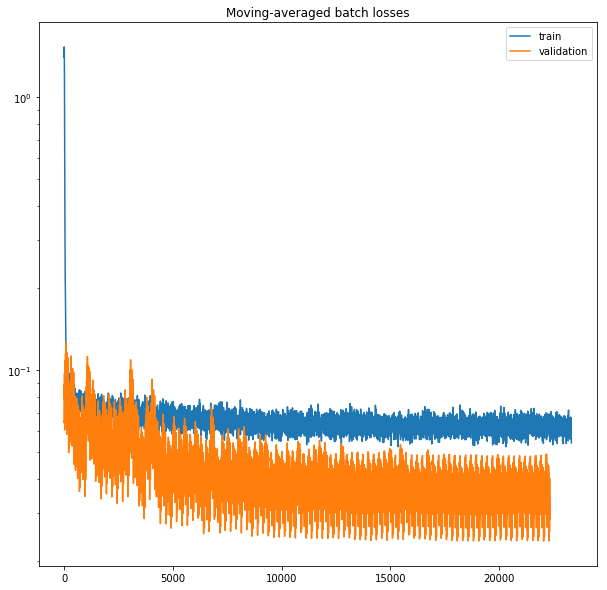

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

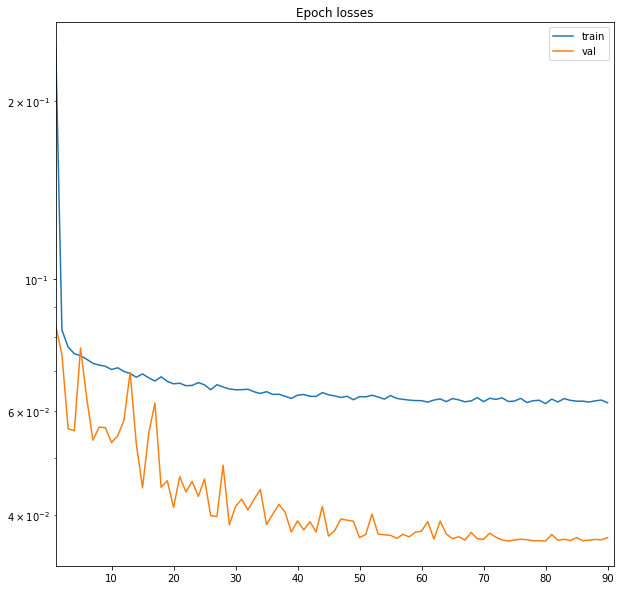

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [23]:
import os

In [24]:
import torch

In [25]:
from visualization_utils import output_to_binary, plot_sample

In [26]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

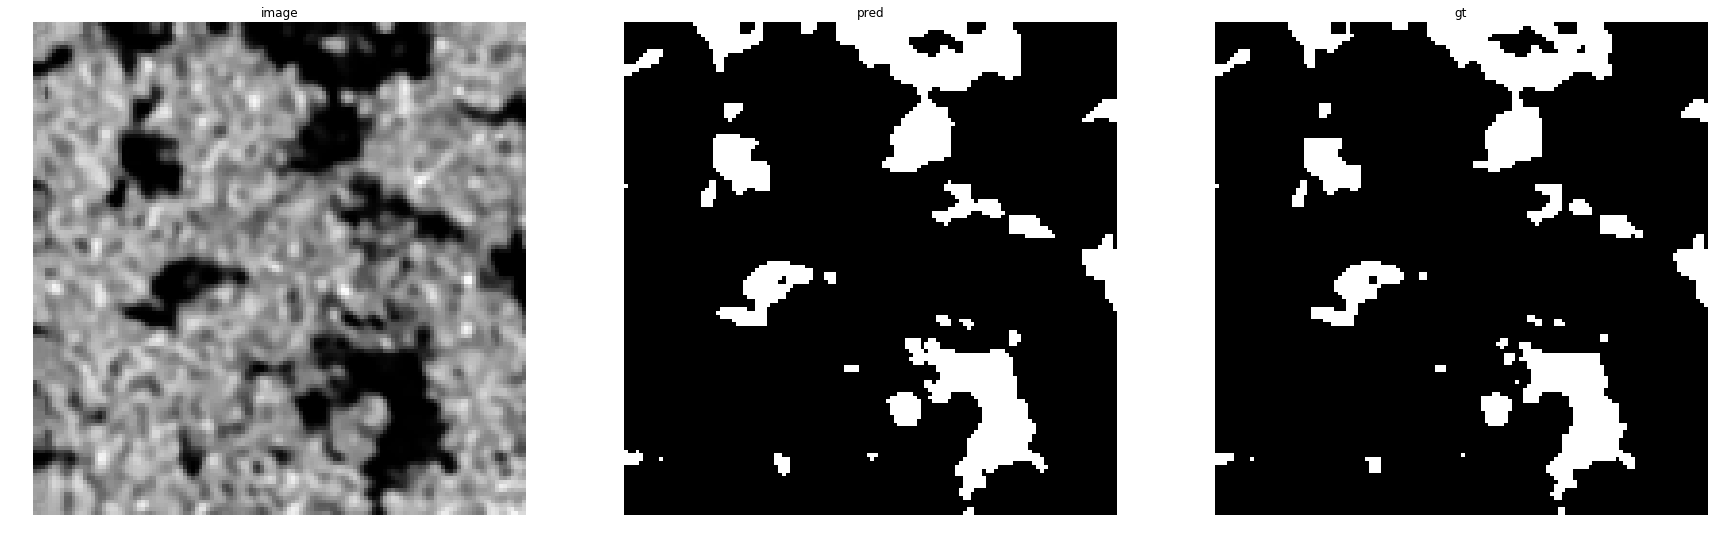

accuracy    : 0.9842529296875
precision   : 0.8936082474226804
recall      : 1.0
f1          : 0.9438153310104529
pr_auc      : 0.9982344899294713
iou         : 0.8936082474226804


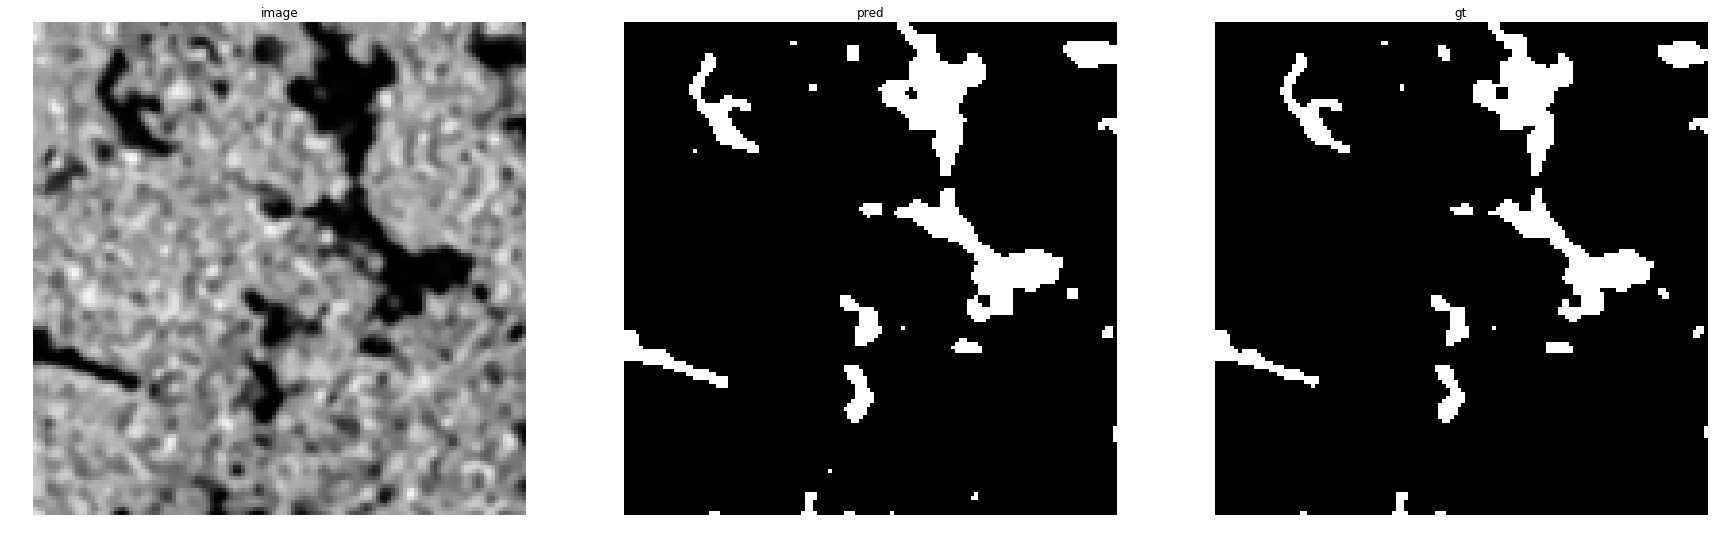

accuracy    : 0.99053955078125
precision   : 0.8974017321785477
recall      : 0.9992581602373887
f1          : 0.9455949455949456
pr_auc      : 0.9979543113451402
iou         : 0.8968042609853528


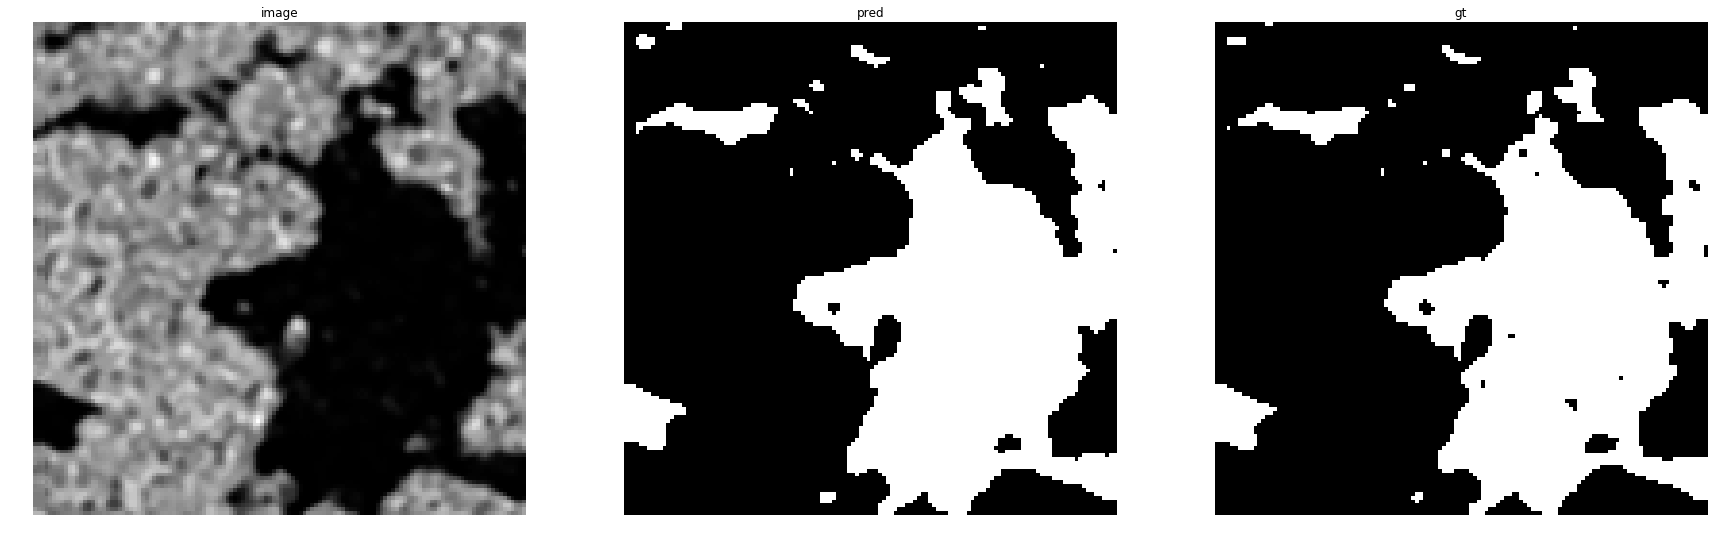

accuracy    : 0.9840087890625
precision   : 0.9545296771954183
recall      : 1.0
f1          : 0.9767359261232462
pr_auc      : 0.9997421798974354
iou         : 0.9545296771954183


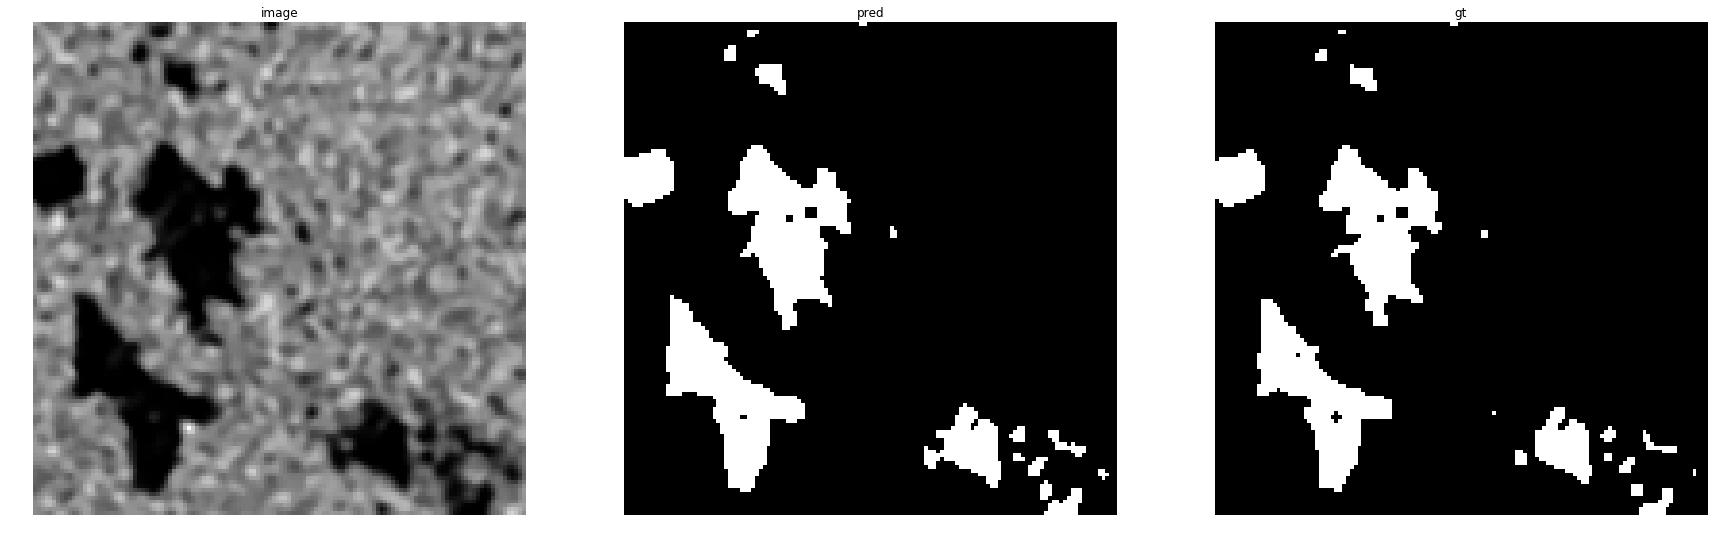

accuracy    : 0.98846435546875
precision   : 0.9068384539147671
recall      : 0.9994538503549972
f1          : 0.9508963367108341
pr_auc      : 0.9991602244729717
iou         : 0.9063893016344725


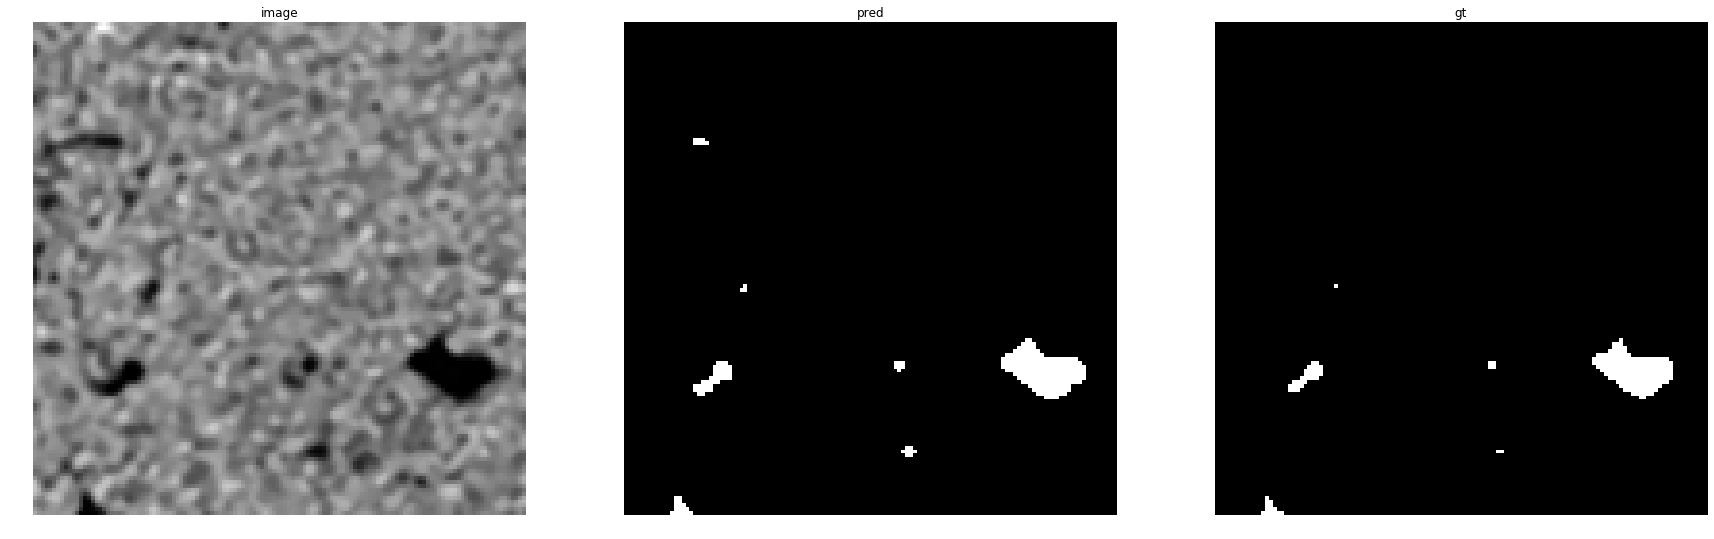

accuracy    : 0.99700927734375
precision   : 0.8256227758007118
recall      : 1.0
f1          : 0.9044834307992202
pr_auc      : 0.9981221183527562
iou         : 0.8256227758007118


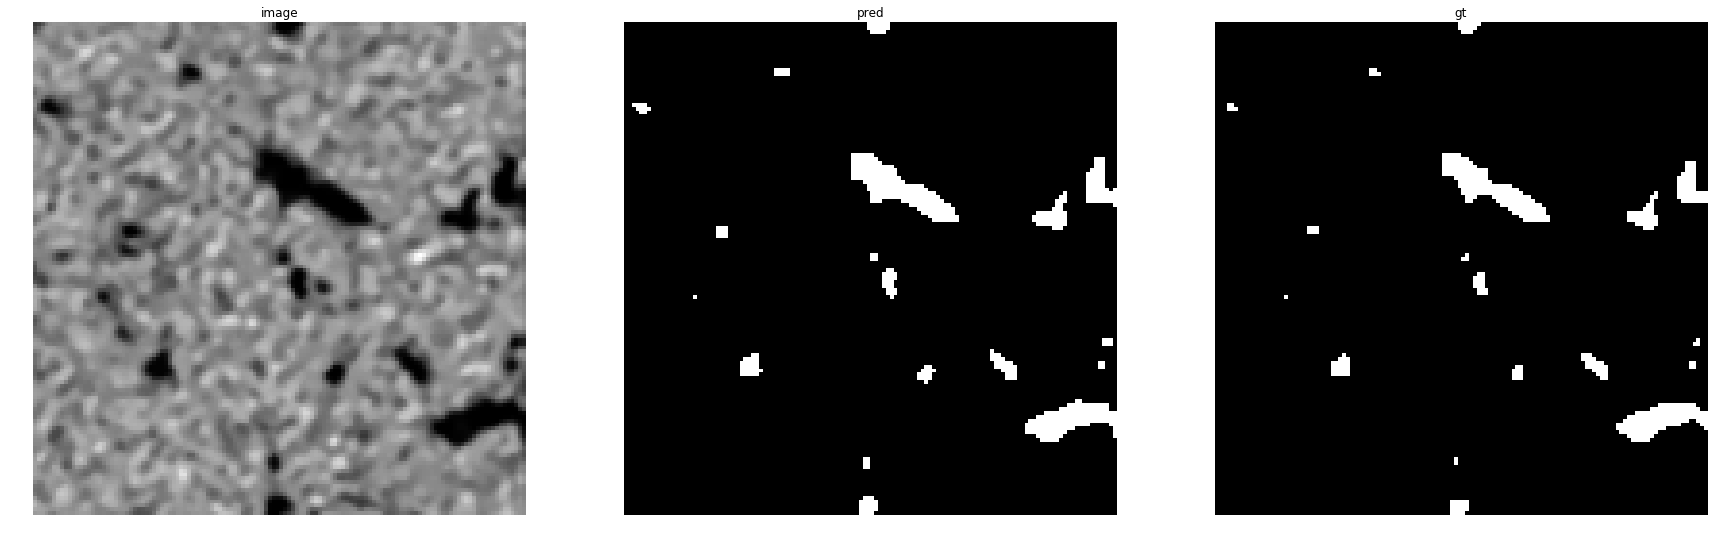

accuracy    : 0.99493408203125
precision   : 0.8713178294573644
recall      : 1.0
f1          : 0.9312344656172328
pr_auc      : 0.9979521002908058
iou         : 0.8713178294573644


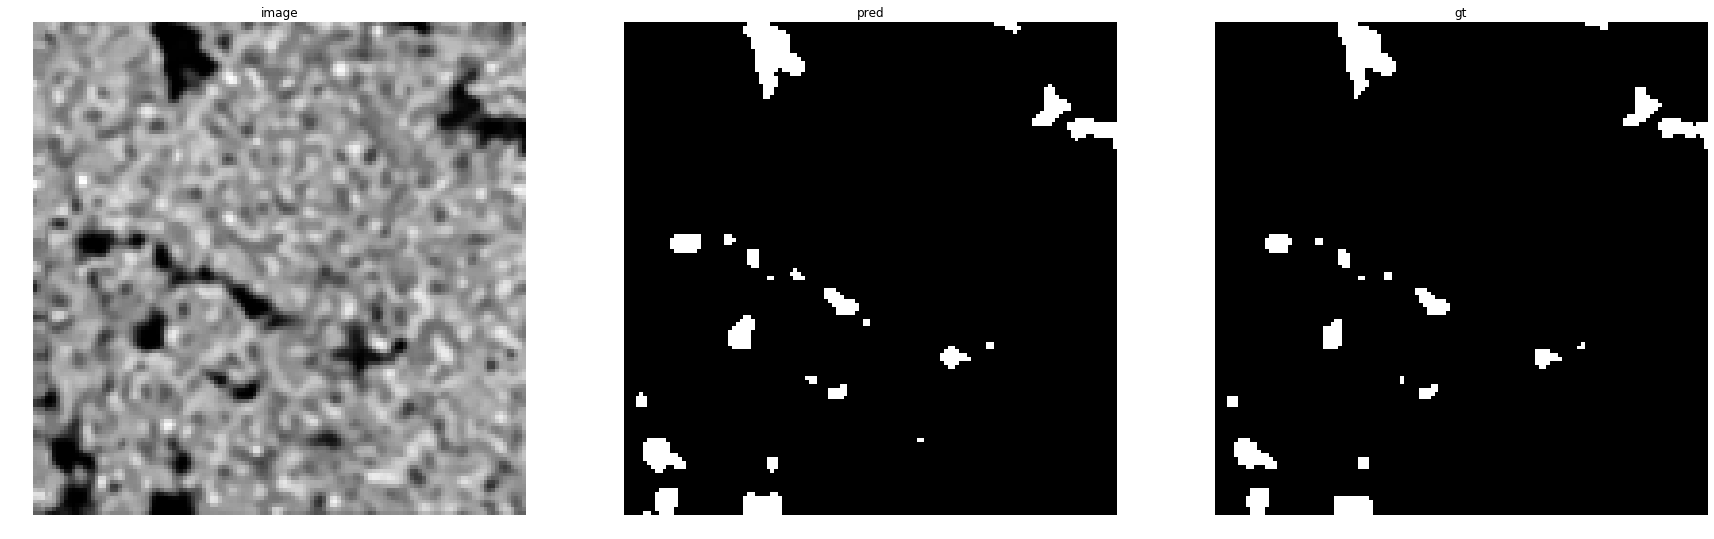

accuracy    : 0.99481201171875
precision   : 0.8753709198813057
recall      : 0.9983079526226735
f1          : 0.9328063241106719
pr_auc      : 0.9962928597472185
iou         : 0.8740740740740741


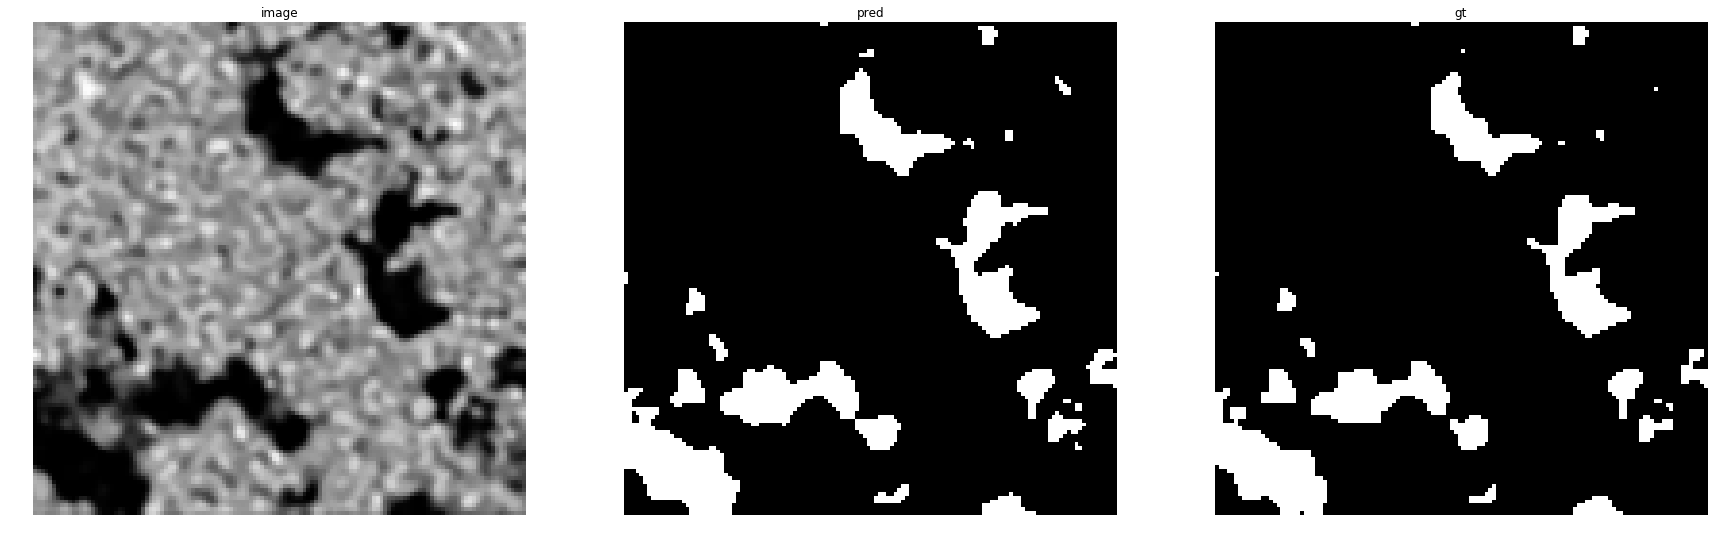

accuracy    : 0.9873046875
precision   : 0.9023233760075865
recall      : 0.9989501312335958
f1          : 0.948181365221724
pr_auc      : 0.9981104693319998
iou         : 0.901468498342018


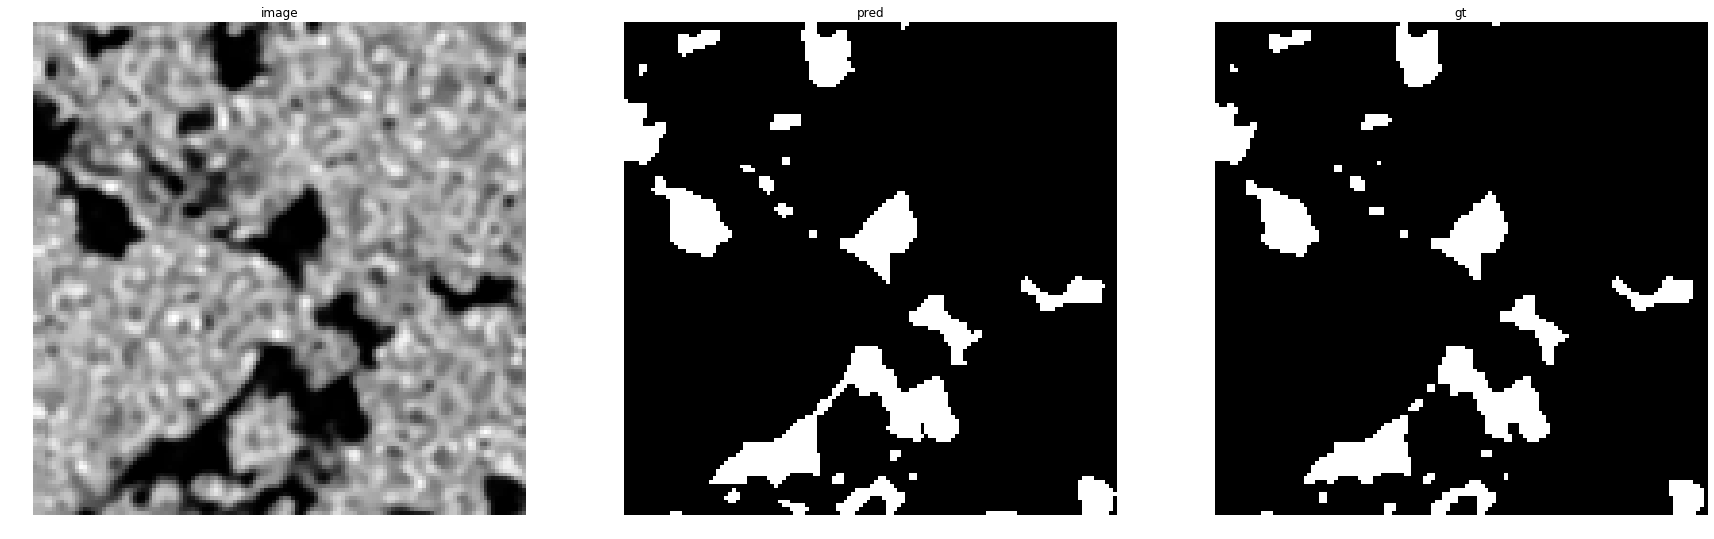

accuracy    : 0.987060546875
precision   : 0.8921668362156663
recall      : 1.0
f1          : 0.943010752688172
pr_auc      : 0.9983127122879518
iou         : 0.8921668362156663


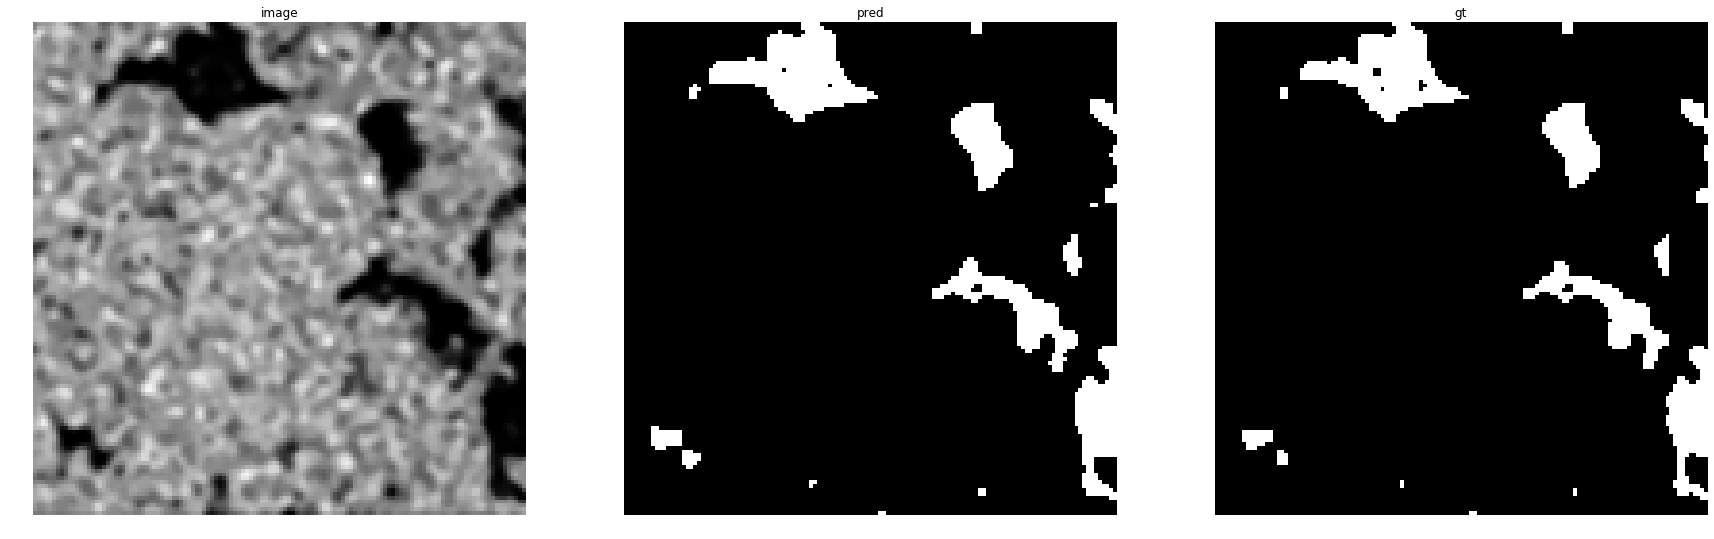

accuracy    : 0.9923095703125
precision   : 0.9173280423280423
recall      : 0.9992795389048992
f1          : 0.956551724137931
pr_auc      : 0.9982547296582087
iou         : 0.9167217448777264


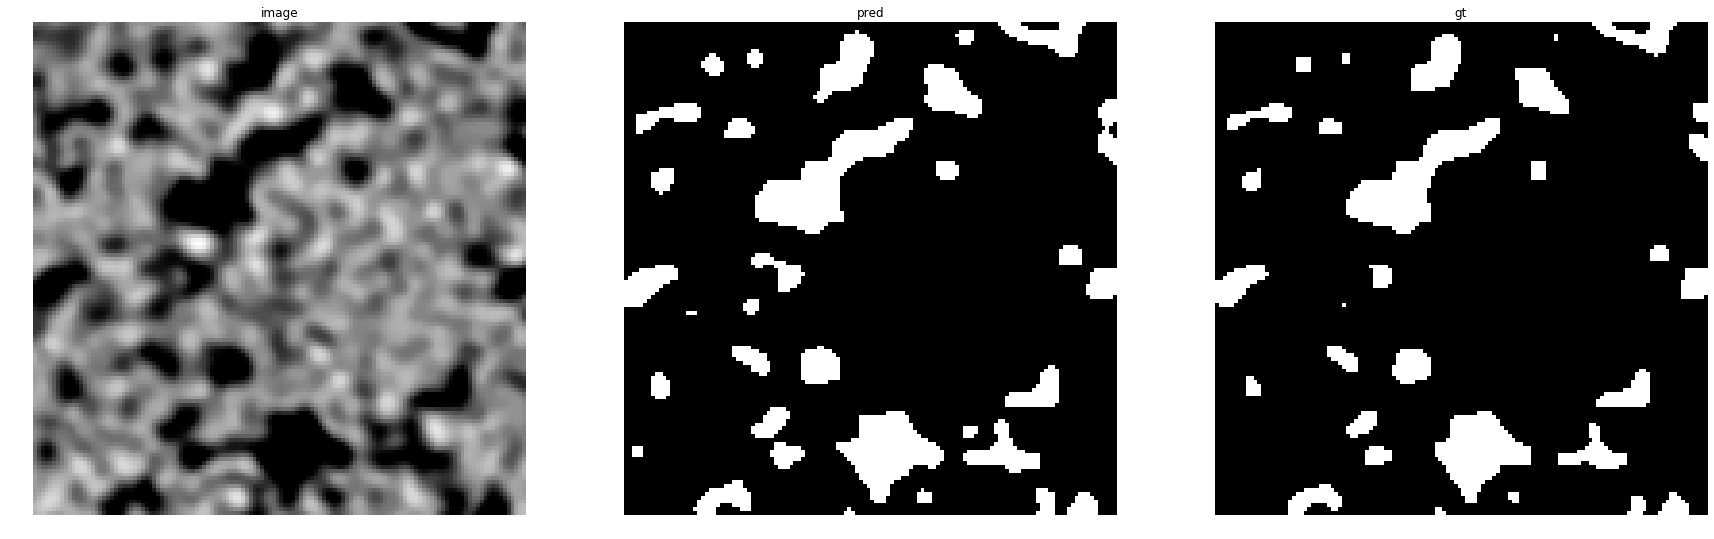

accuracy    : 0.97412109375
precision   : 0.8238967527060783
recall      : 0.9994949494949495
f1          : 0.9032405294386125
pr_auc      : 0.9918227395329658
iou         : 0.8235538909696213


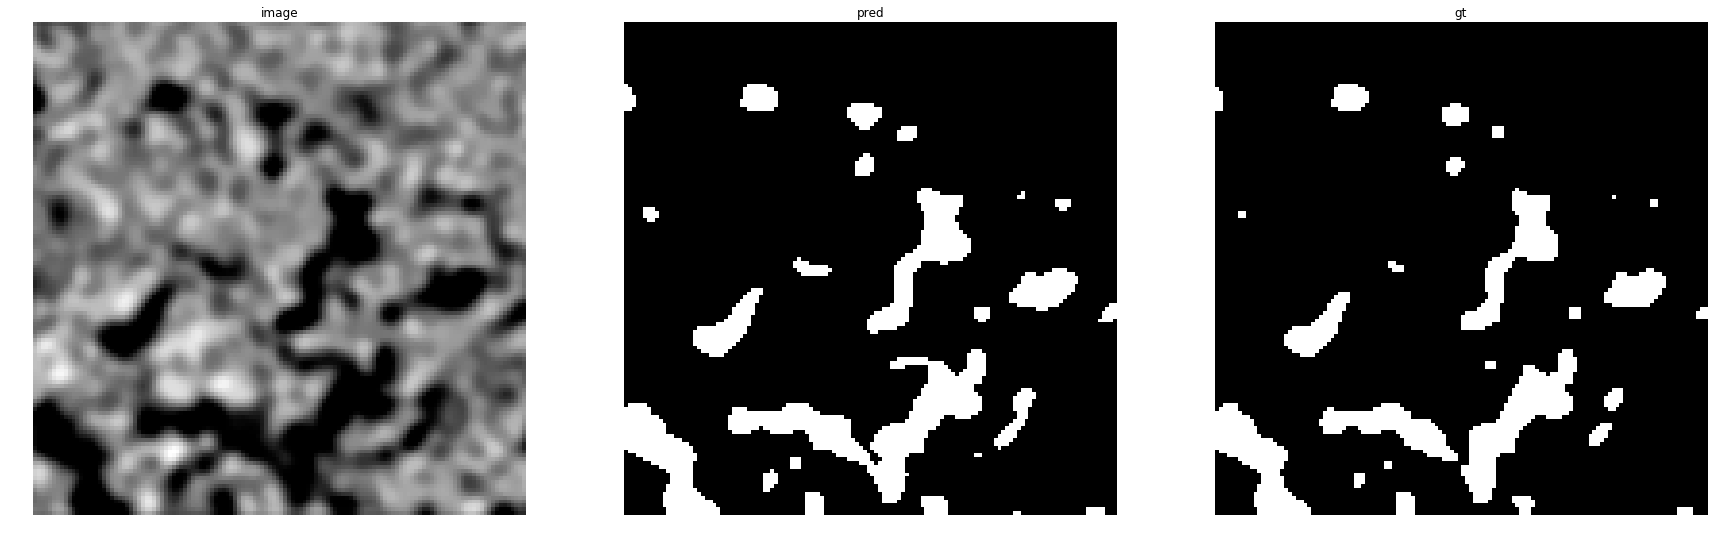

accuracy    : 0.982421875
precision   : 0.8621856866537717
recall      : 0.9983202687569989
f1          : 0.9252724442138038
pr_auc      : 0.9913807448156696
iou         : 0.8609367455335587


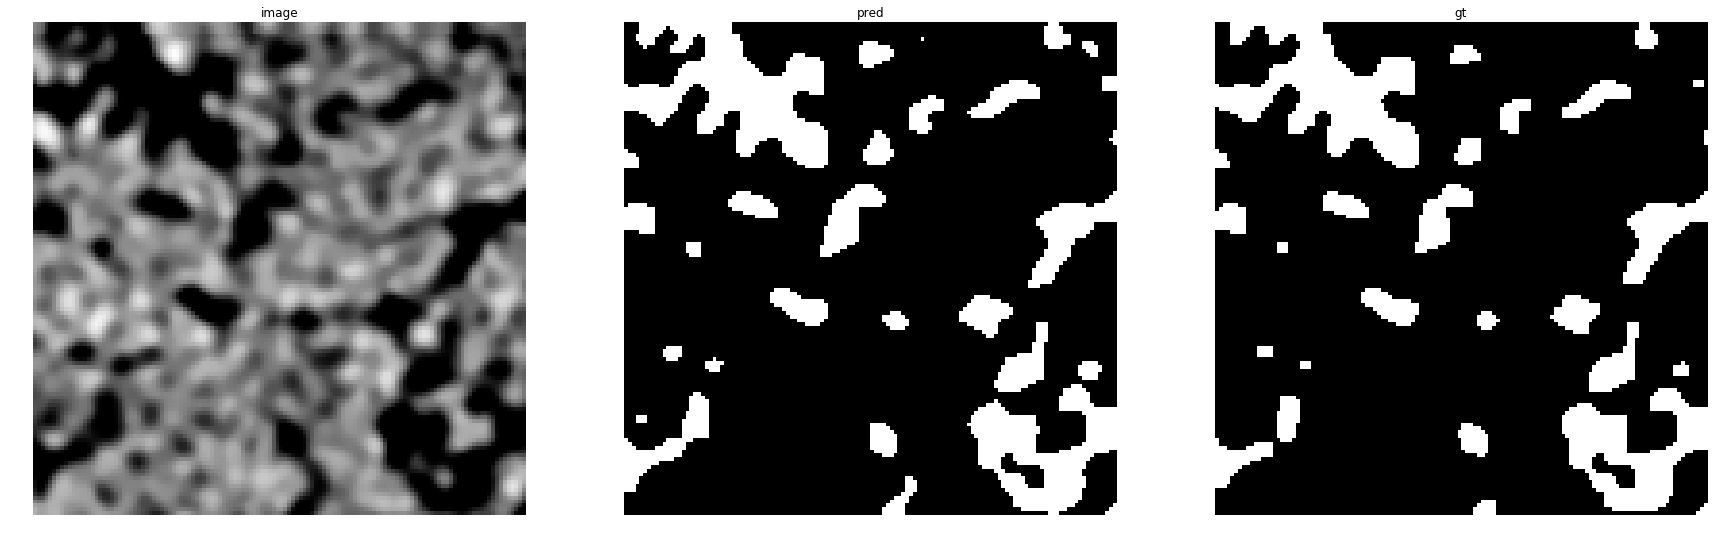

accuracy    : 0.98321533203125
precision   : 0.9157051282051282
recall      : 0.9958173579644476
f1          : 0.9540824845550175
pr_auc      : 0.9941732447363345
iou         : 0.9121966794380587


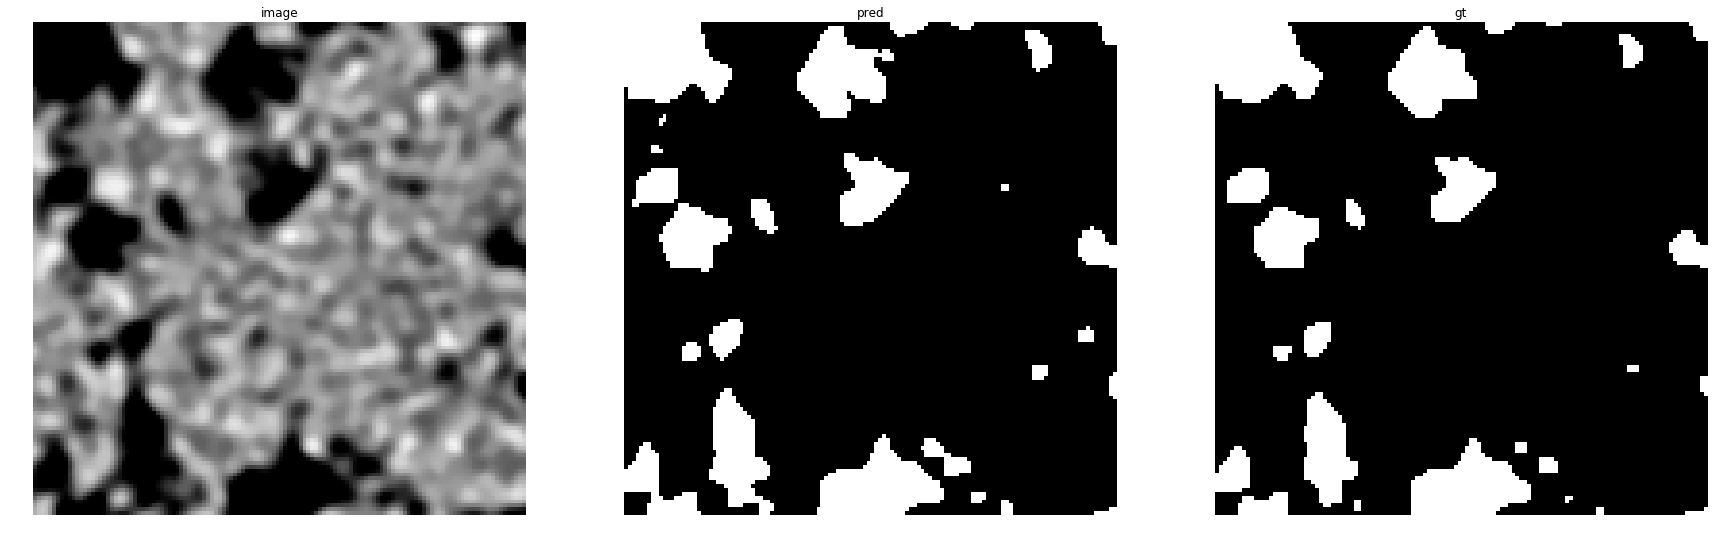

accuracy    : 0.9813232421875
precision   : 0.8878890138732658
recall      : 0.9970526315789474
f1          : 0.9393097976993257
pr_auc      : 0.9960313779619125
iou         : 0.8855646970830217


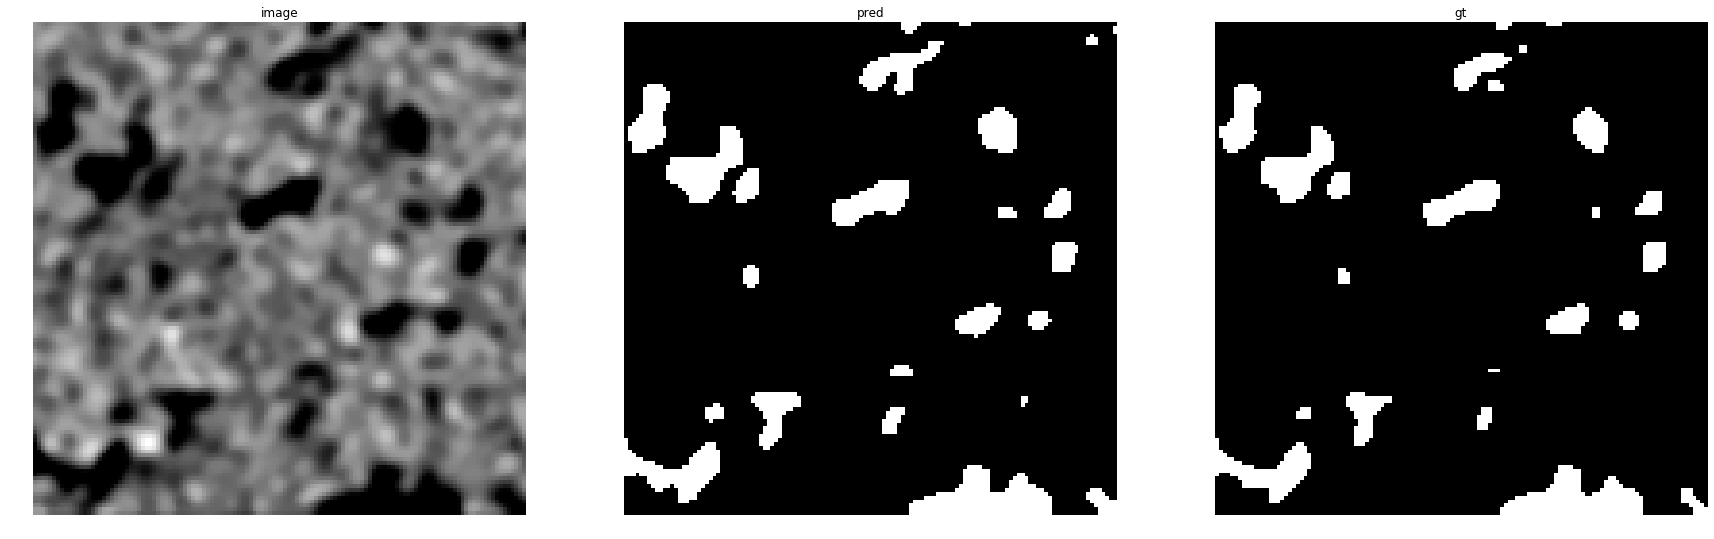

accuracy    : 0.98577880859375
precision   : 0.8616957306073362
recall      : 0.9979108635097493
f1          : 0.924814456276218
pr_auc      : 0.9899826582645614
iou         : 0.8601440576230492


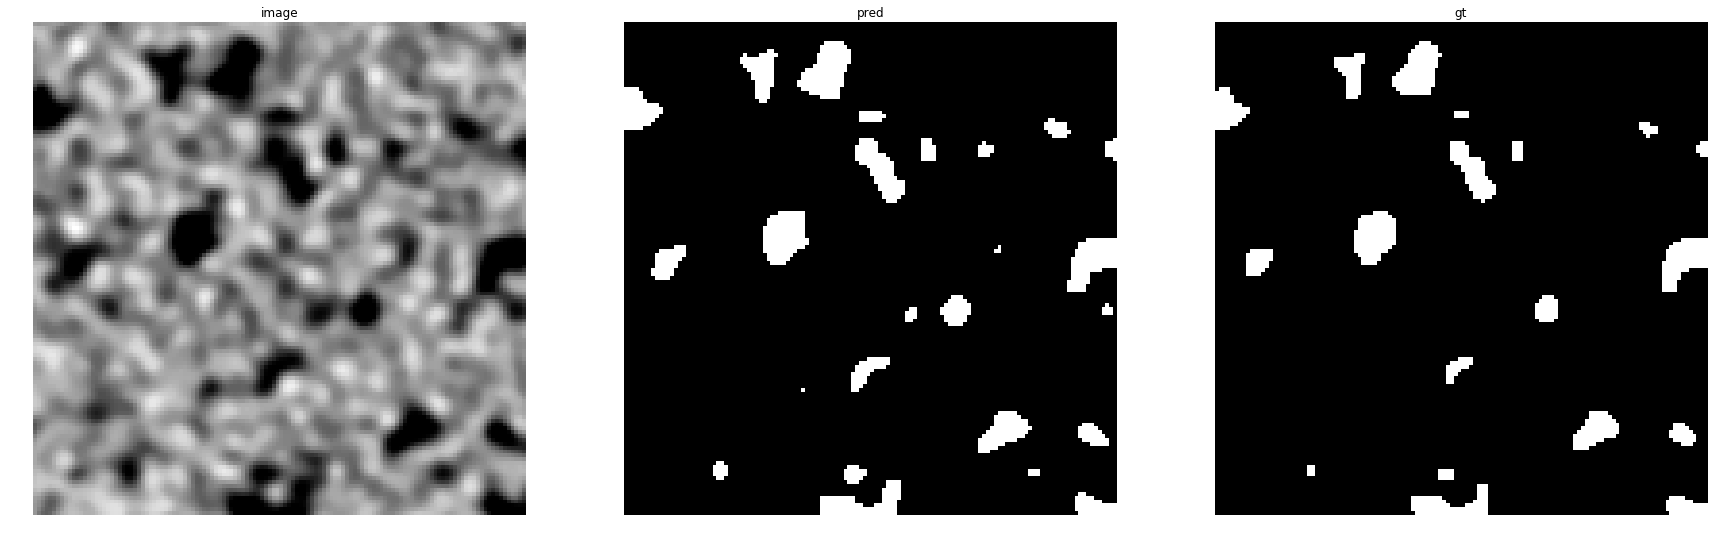

accuracy    : 0.98504638671875
precision   : 0.7991803278688525
recall      : 1.0
f1          : 0.8883826879271071
pr_auc      : 0.9902900179033023
iou         : 0.7991803278688525


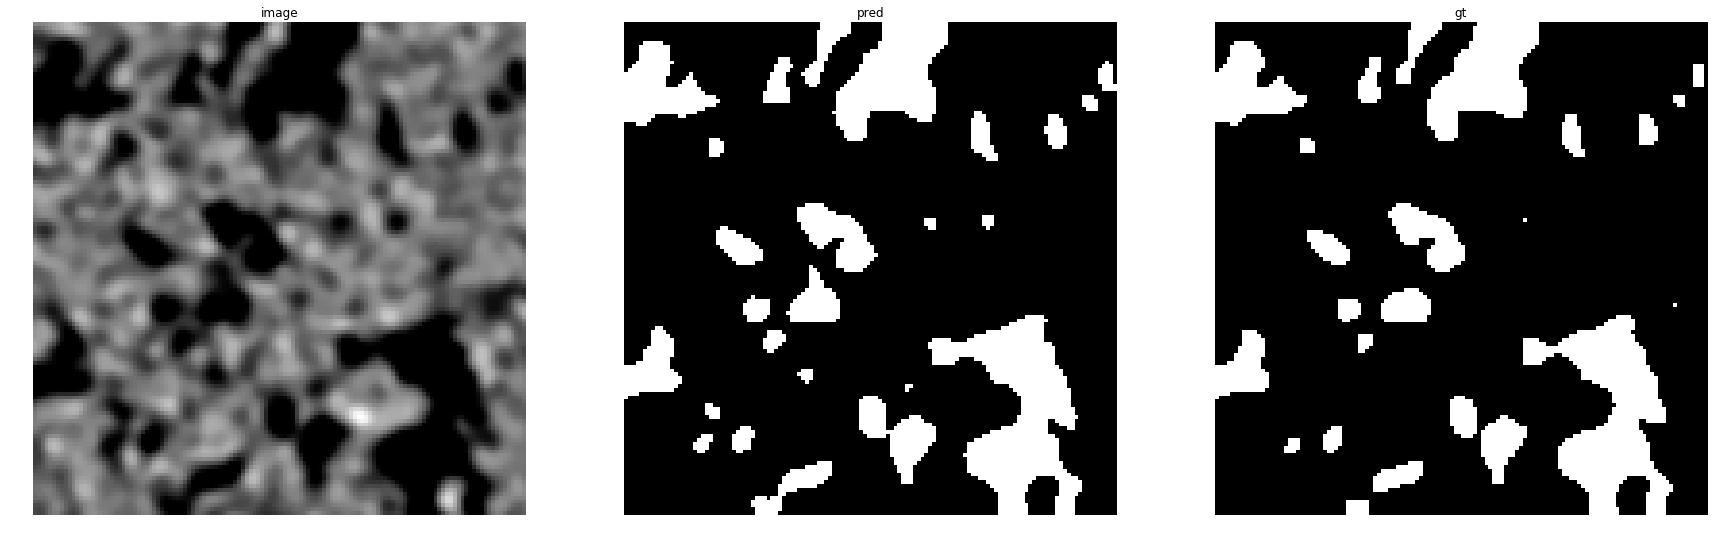

accuracy    : 0.98291015625
precision   : 0.9129741791520561
recall      : 0.997561825148032
f1          : 0.9533954727030625
pr_auc      : 0.9946802807977781
iou         : 0.910941475826972


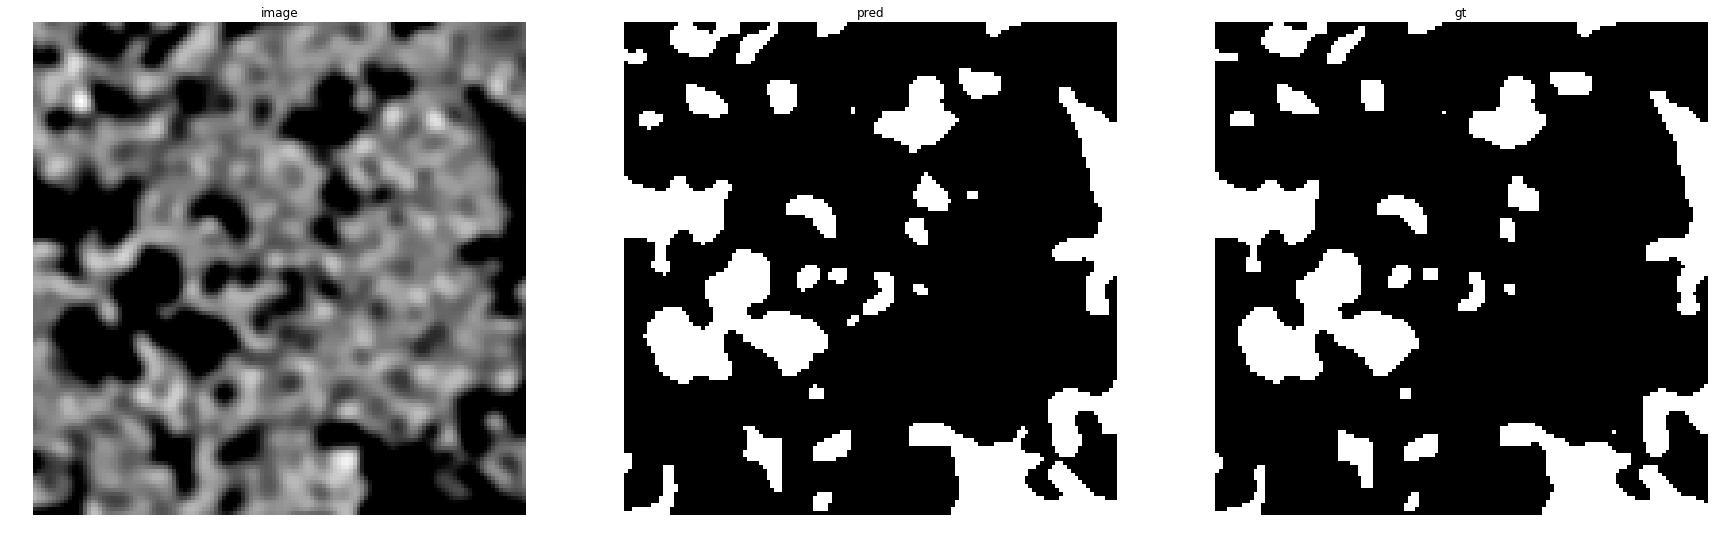

accuracy    : 0.98248291015625
precision   : 0.9269220320565064
recall      : 0.9947521865889213
f1          : 0.9596399943749121
pr_auc      : 0.9972889889648234
iou         : 0.922411462557448


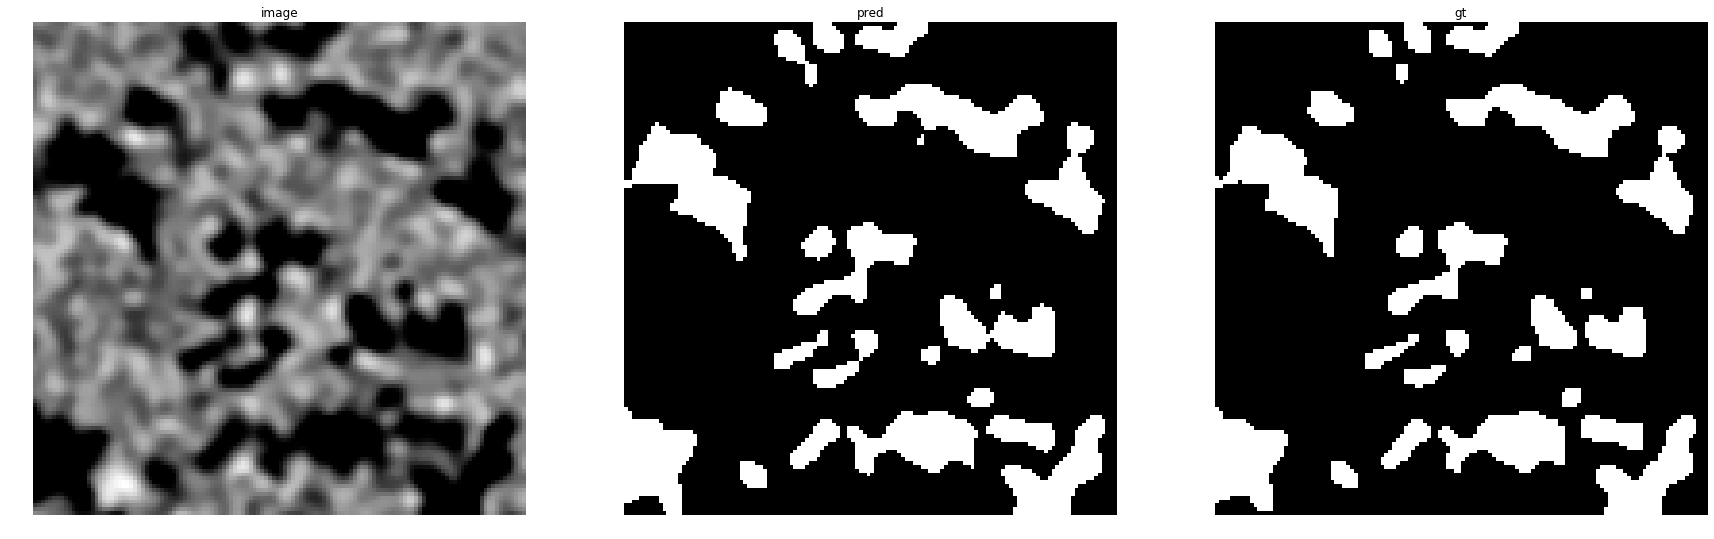

accuracy    : 0.986328125
precision   : 0.939115929941618
recall      : 0.9985220218740762
f1          : 0.9679083094555873
pr_auc      : 0.998069483134773
iou         : 0.937812326485286


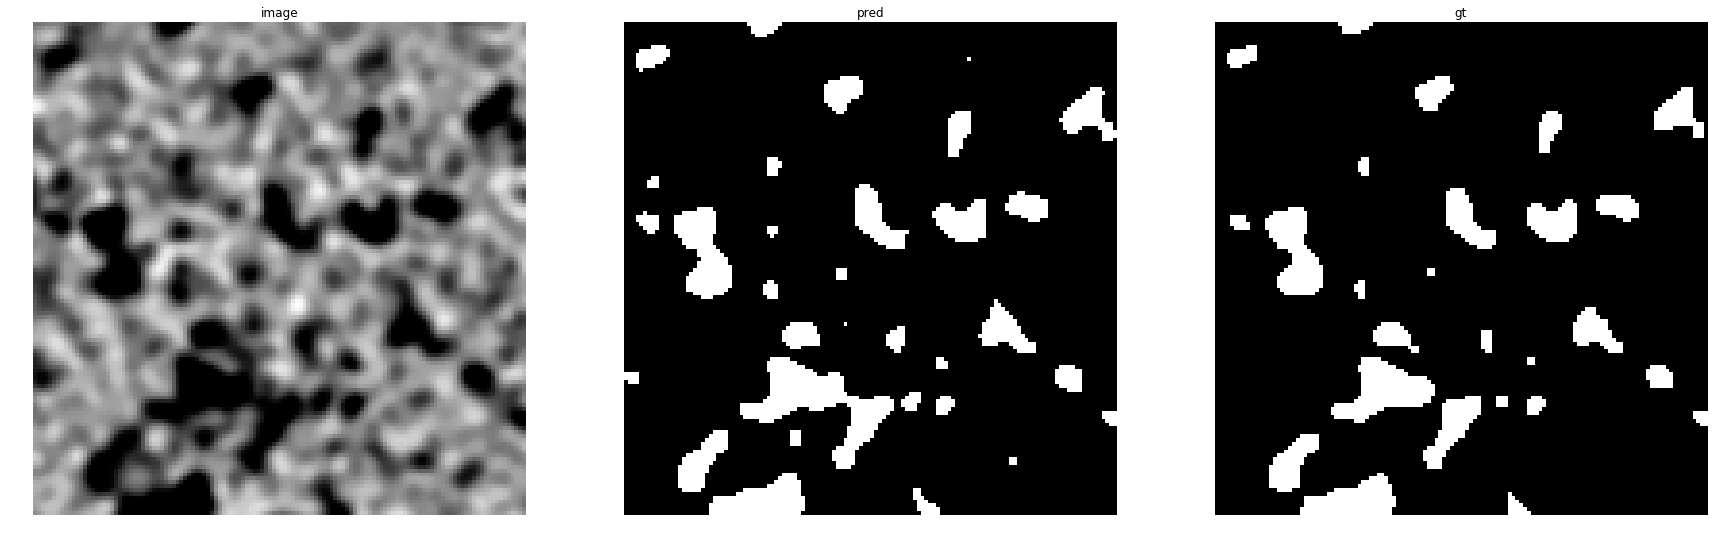

accuracy    : 0.98504638671875
precision   : 0.8798751950078003
recall      : 0.9917936694021102
f1          : 0.9324882887847893
pr_auc      : 0.9864619614378095
iou         : 0.8735157459989675


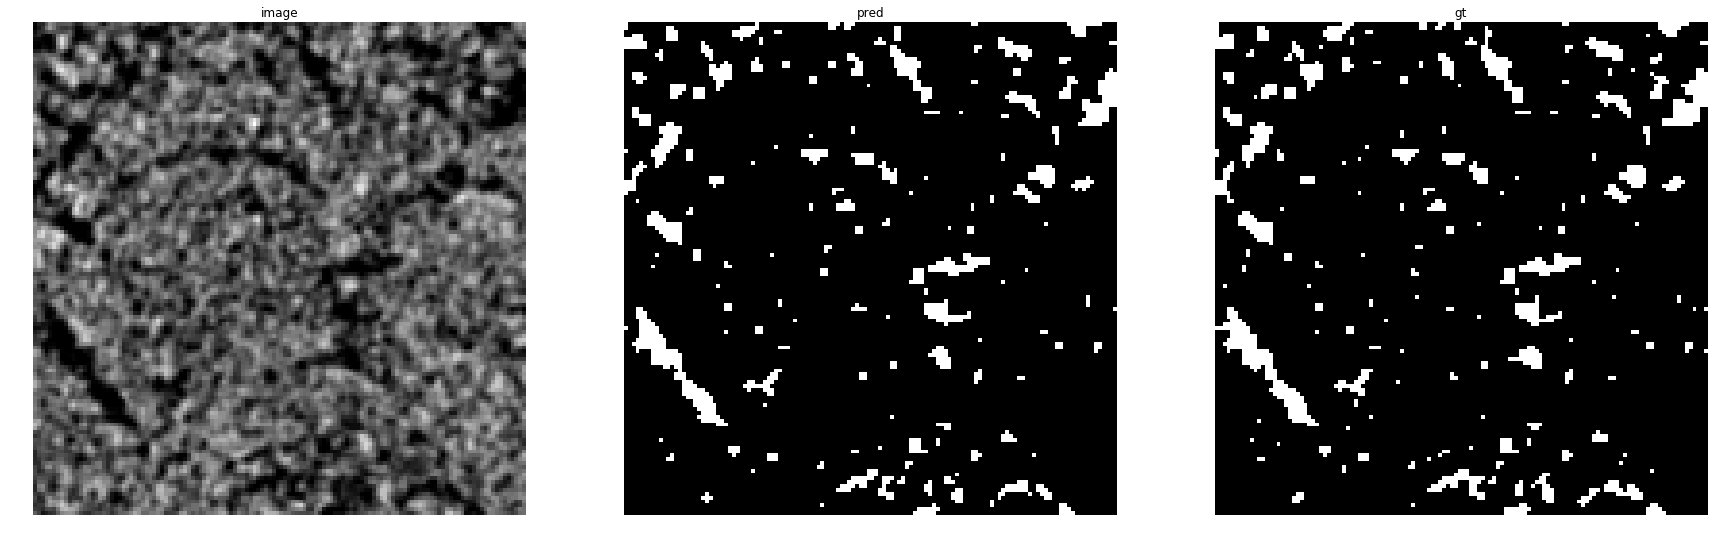

accuracy    : 0.98773193359375
precision   : 0.9629068887206662
recall      : 0.8932584269662921
f1          : 0.9267759562841531
pr_auc      : 0.9834314173589067
iou         : 0.8635437881873728


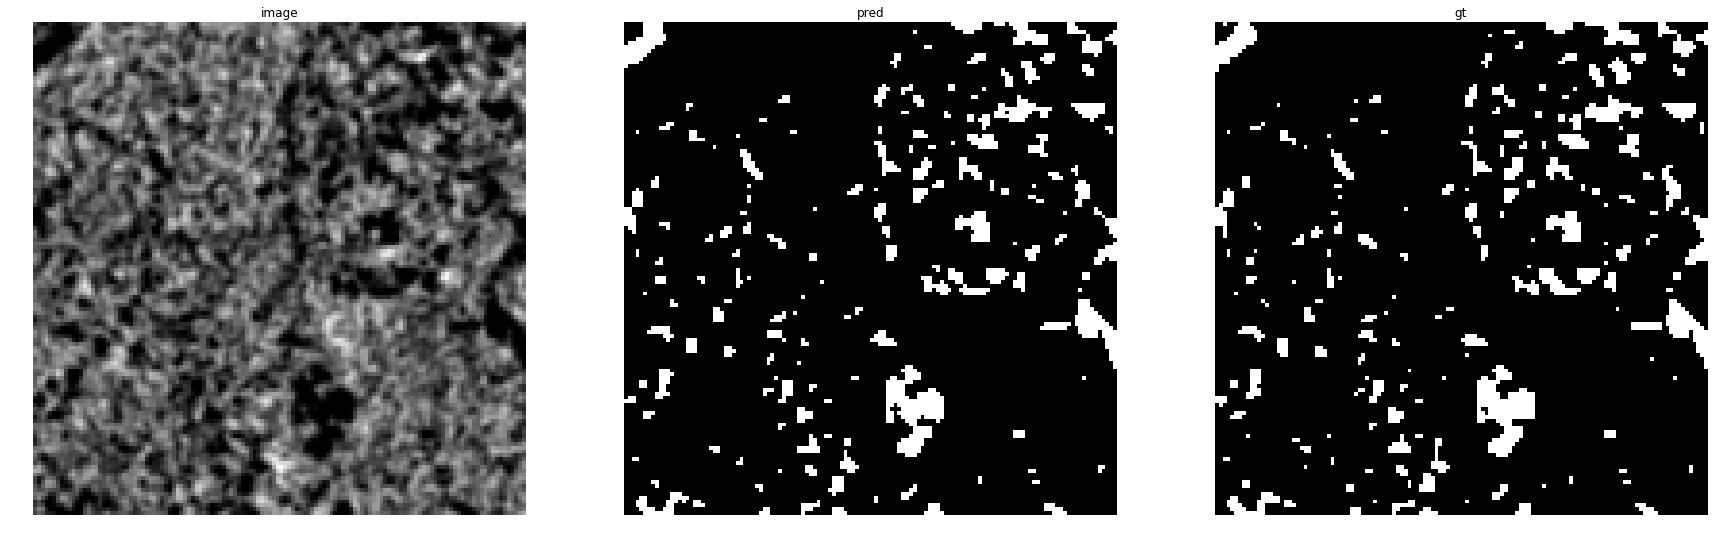

accuracy    : 0.98516845703125
precision   : 0.9525666016894087
recall      : 0.8960880195599022
f1          : 0.9234645669291339
pr_auc      : 0.984423667474464
iou         : 0.8578115857226448


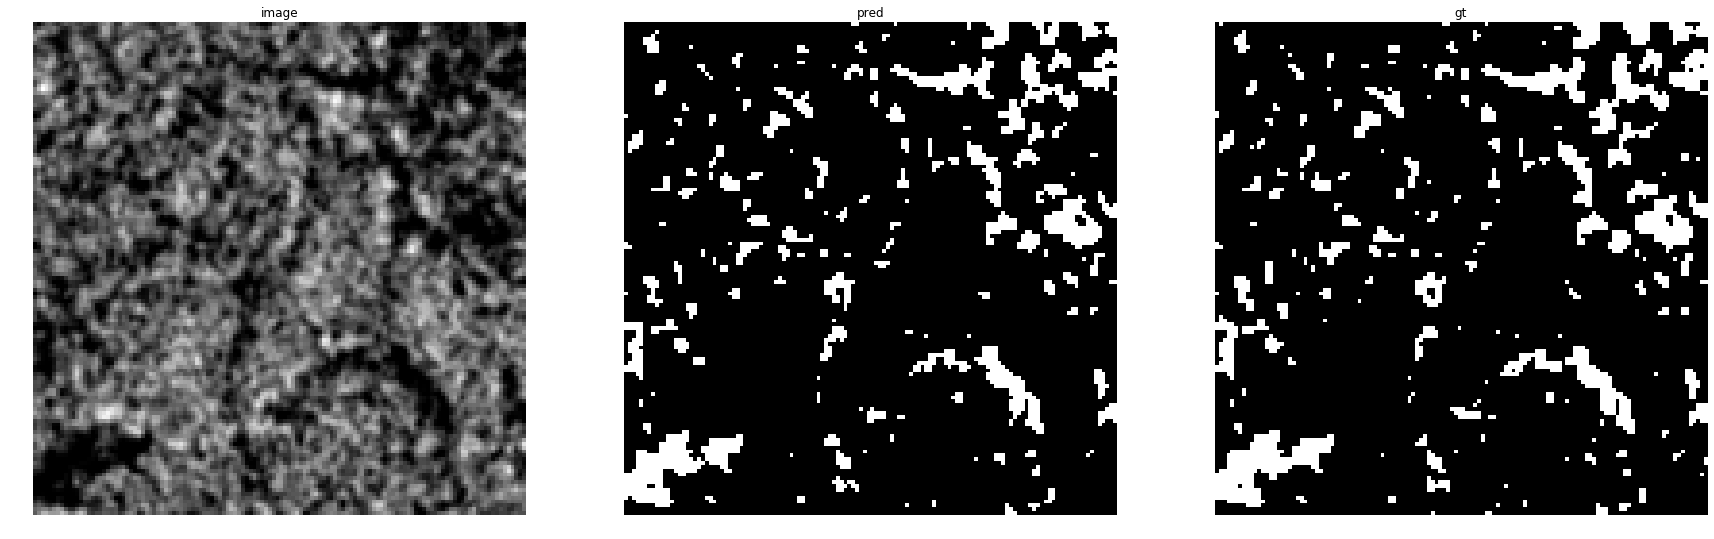

accuracy    : 0.9801025390625
precision   : 0.9653614457831325
recall      : 0.8821100917431193
f1          : 0.9218600191754555
pr_auc      : 0.9856078238795823
iou         : 0.8550466874166296


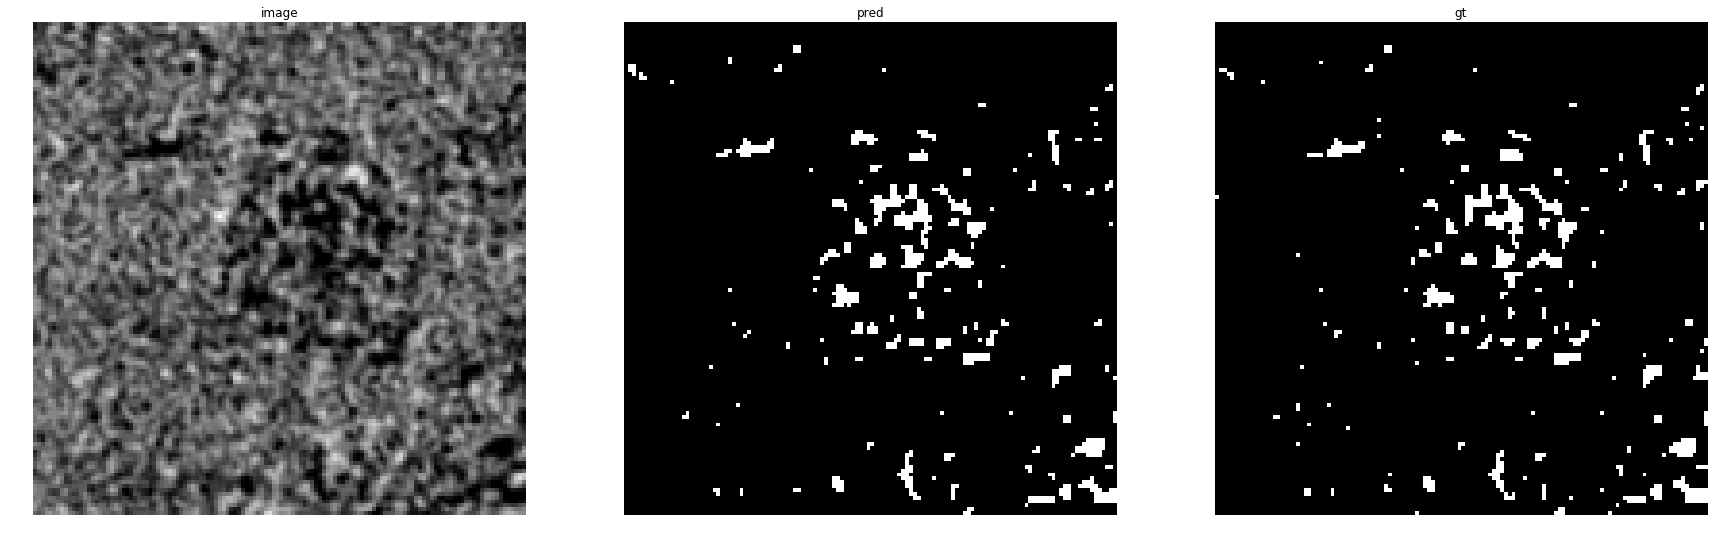

accuracy    : 0.9903564453125
precision   : 0.9114799446749654
recall      : 0.8751660026560425
f1          : 0.8929539295392954
pr_auc      : 0.9711398506017458
iou         : 0.806609547123623


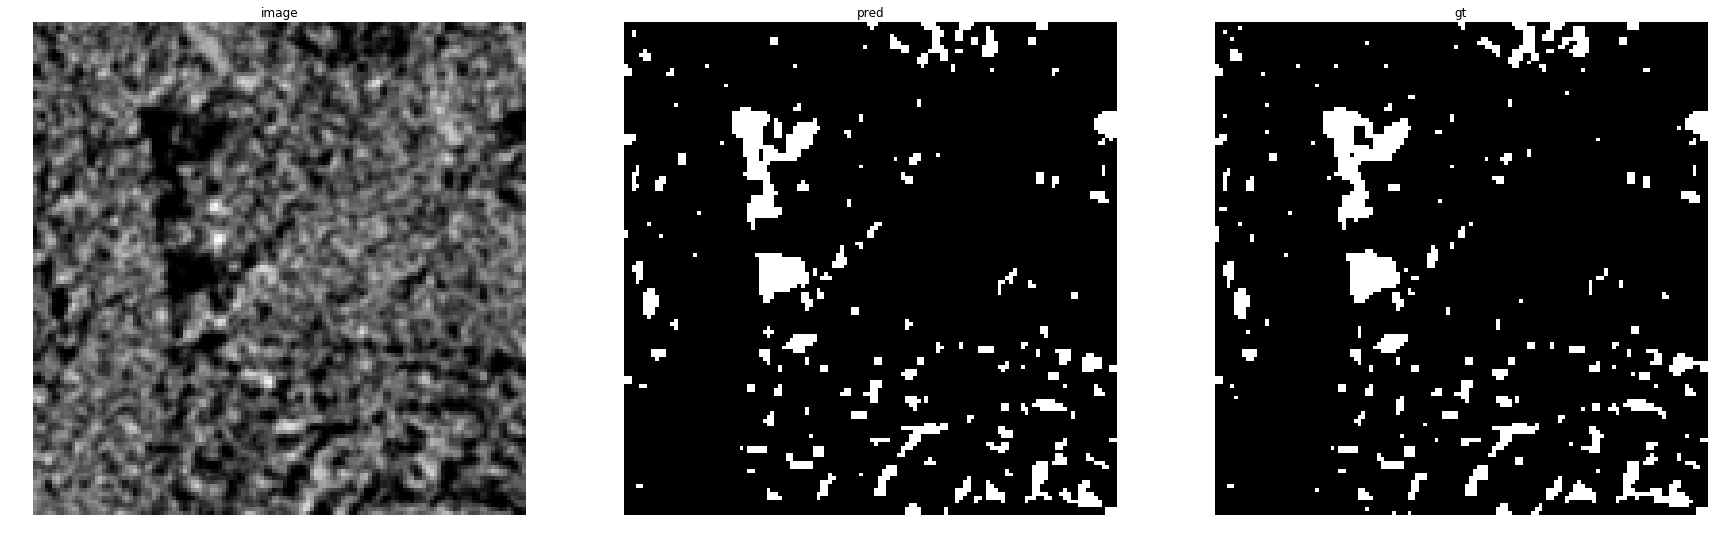

accuracy    : 0.98541259765625
precision   : 0.9380597014925374
recall      : 0.8895966029723992
f1          : 0.9131856156919724
pr_auc      : 0.9783736484401536
iou         : 0.8402406417112299


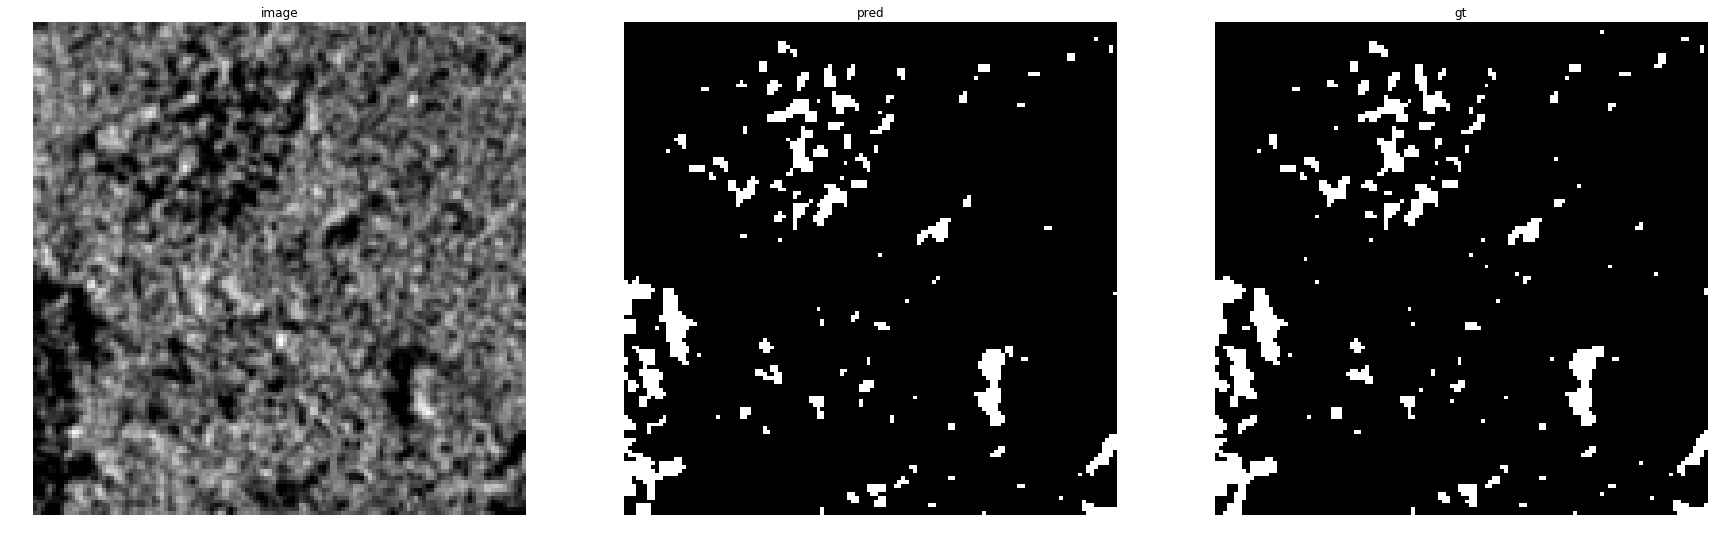

accuracy    : 0.9896240234375
precision   : 0.9585585585585585
recall      : 0.8956228956228957
f1          : 0.9260226283724978
pr_auc      : 0.9839687941452362
iou         : 0.8622366288492707


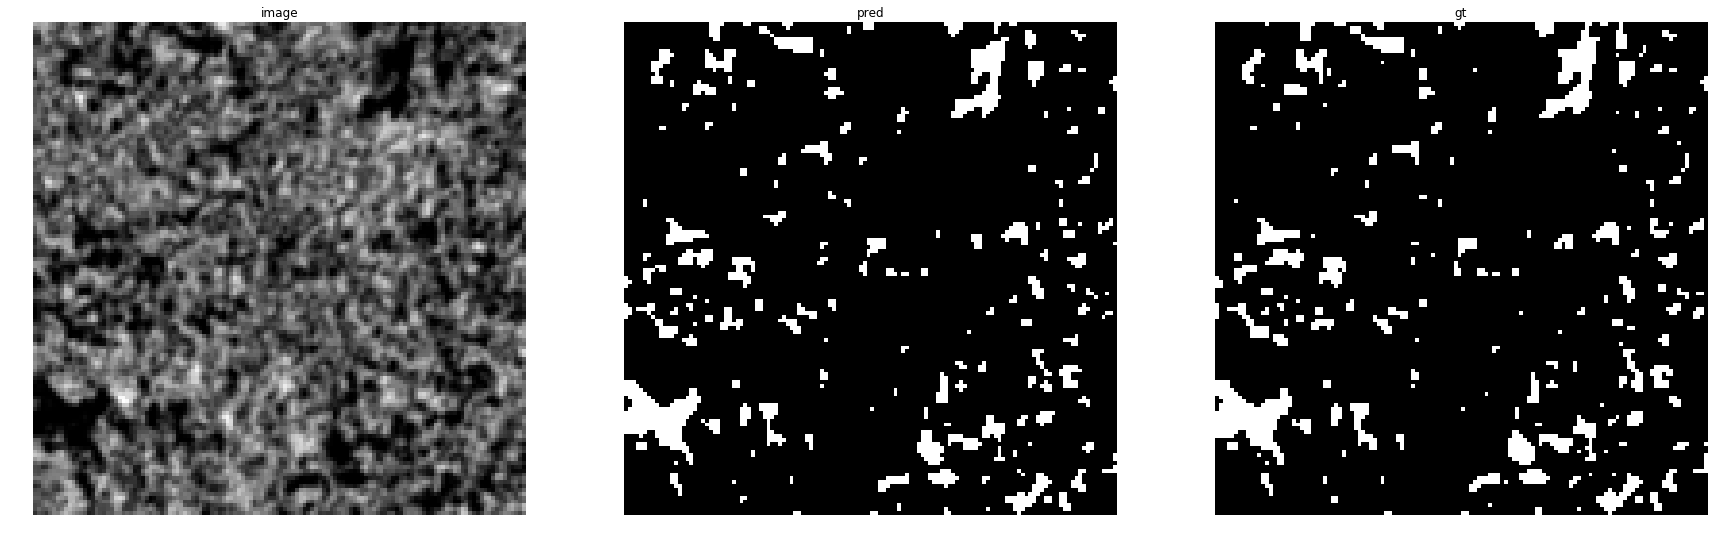

accuracy    : 0.98443603515625
precision   : 0.9535783365570599
recall      : 0.8898916967509025
f1          : 0.9206349206349205
pr_auc      : 0.9826724975393483
iou         : 0.8529411764705882


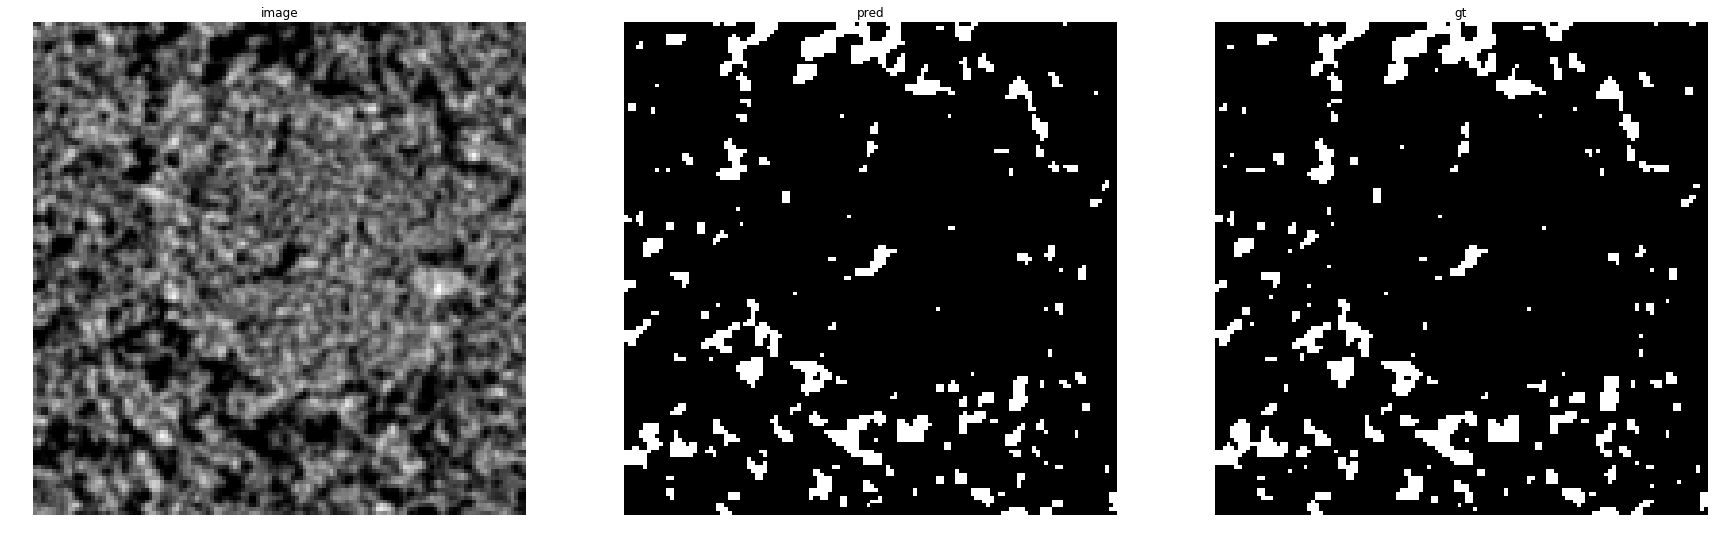

accuracy    : 0.9835205078125
precision   : 0.9587696335078534
recall      : 0.8761961722488039
f1          : 0.915625
pr_auc      : 0.9842716042930387
iou         : 0.8443804034582133


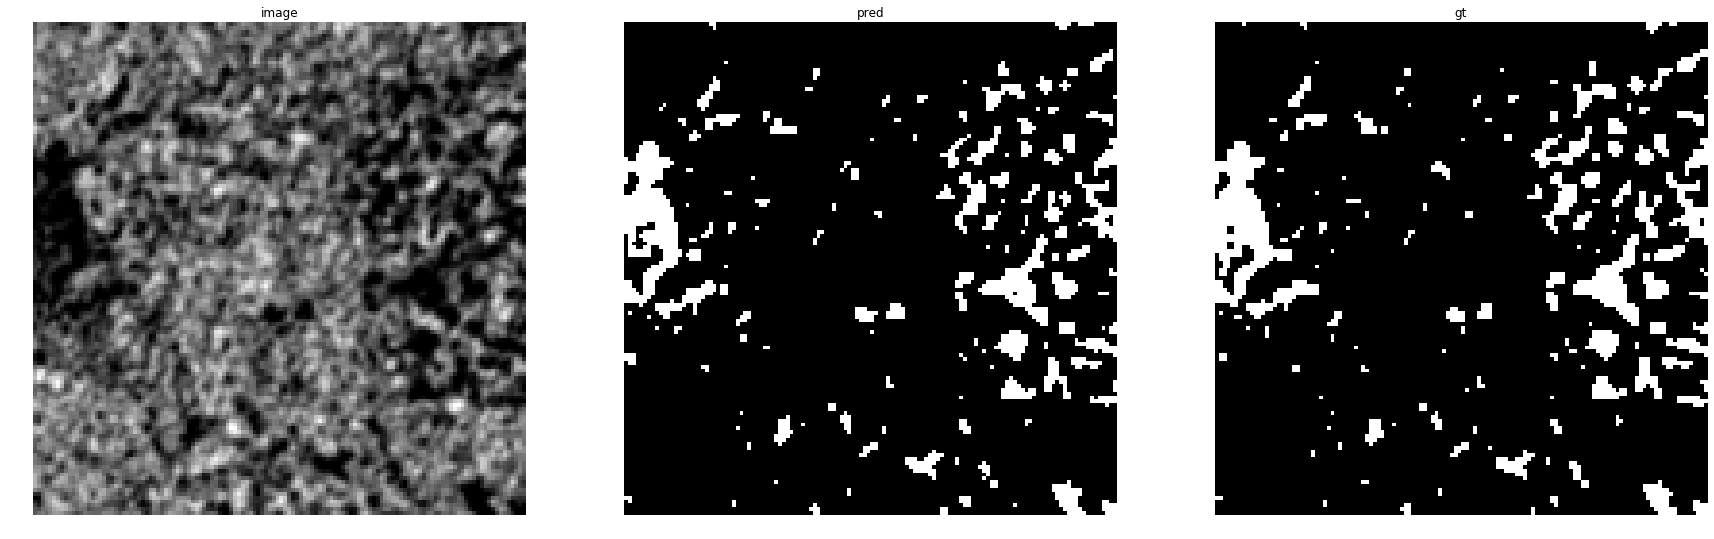

accuracy    : 0.98114013671875
precision   : 0.9593123209169054
recall      : 0.8755230125523012
f1          : 0.9155045118949958
pr_auc      : 0.9836946969727361
iou         : 0.8441754916792739


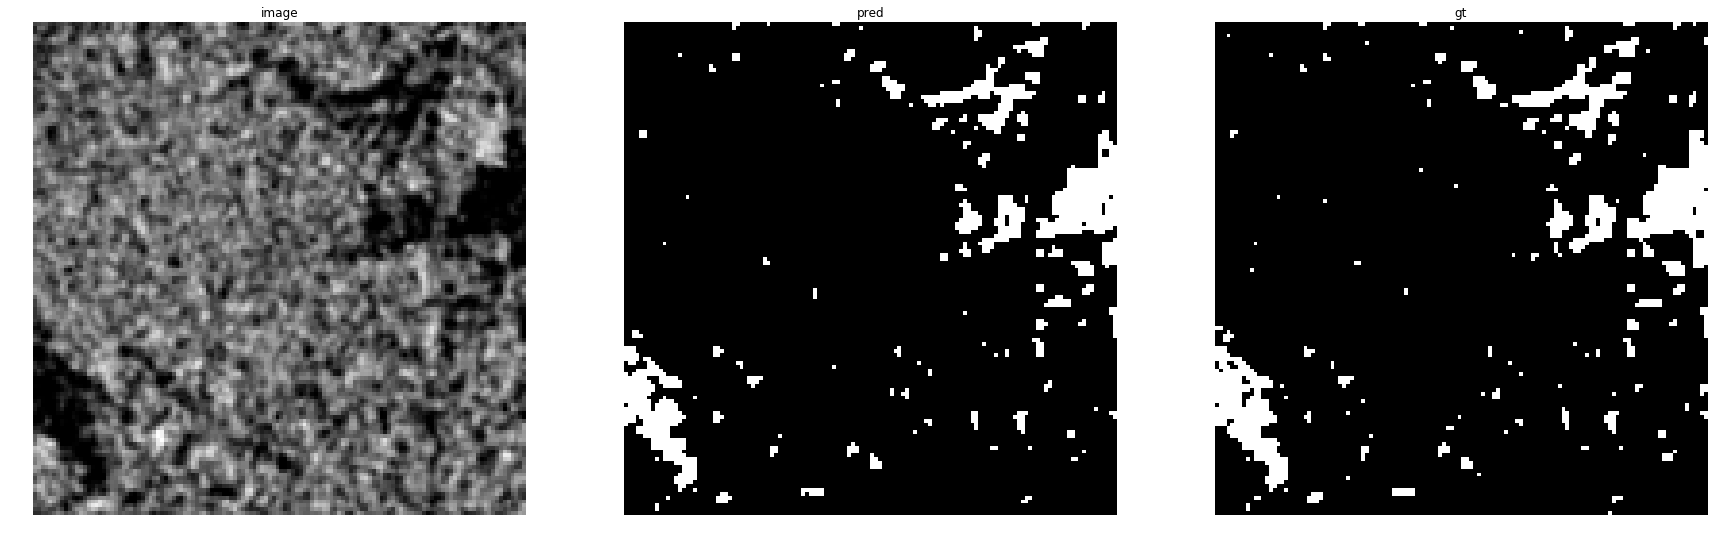

accuracy    : 0.9879150390625
precision   : 0.9723926380368099
recall      : 0.8867132867132868
f1          : 0.9275786393562546
pr_auc      : 0.988134480987061
iou         : 0.8649386084583902


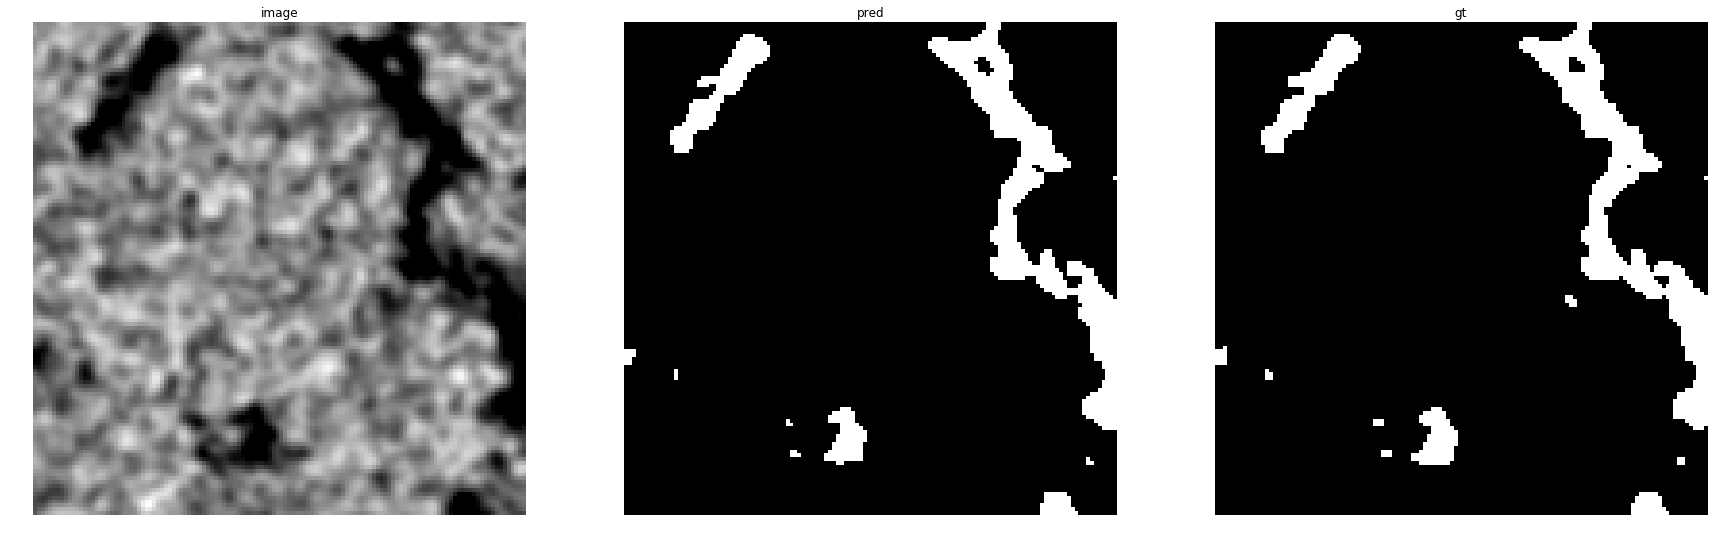

accuracy    : 0.993896484375
precision   : 0.9902912621359223
recall      : 0.9431968295904888
f1          : 0.96617050067659
pr_auc      : 0.997561813046439
iou         : 0.9345549738219895


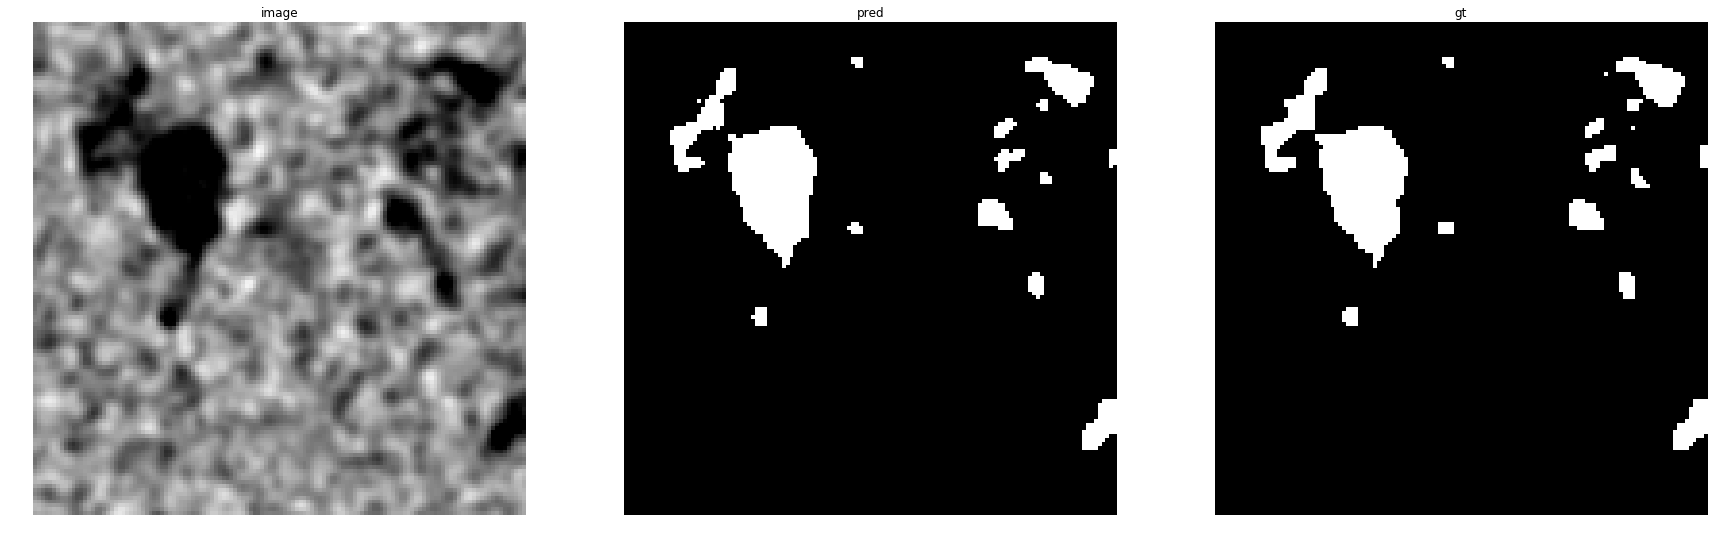

accuracy    : 0.99468994140625
precision   : 0.9900181488203267
recall      : 0.9348757497857755
f1          : 0.9616571176729837
pr_auc      : 0.9971474747225039
iou         : 0.9261460101867572


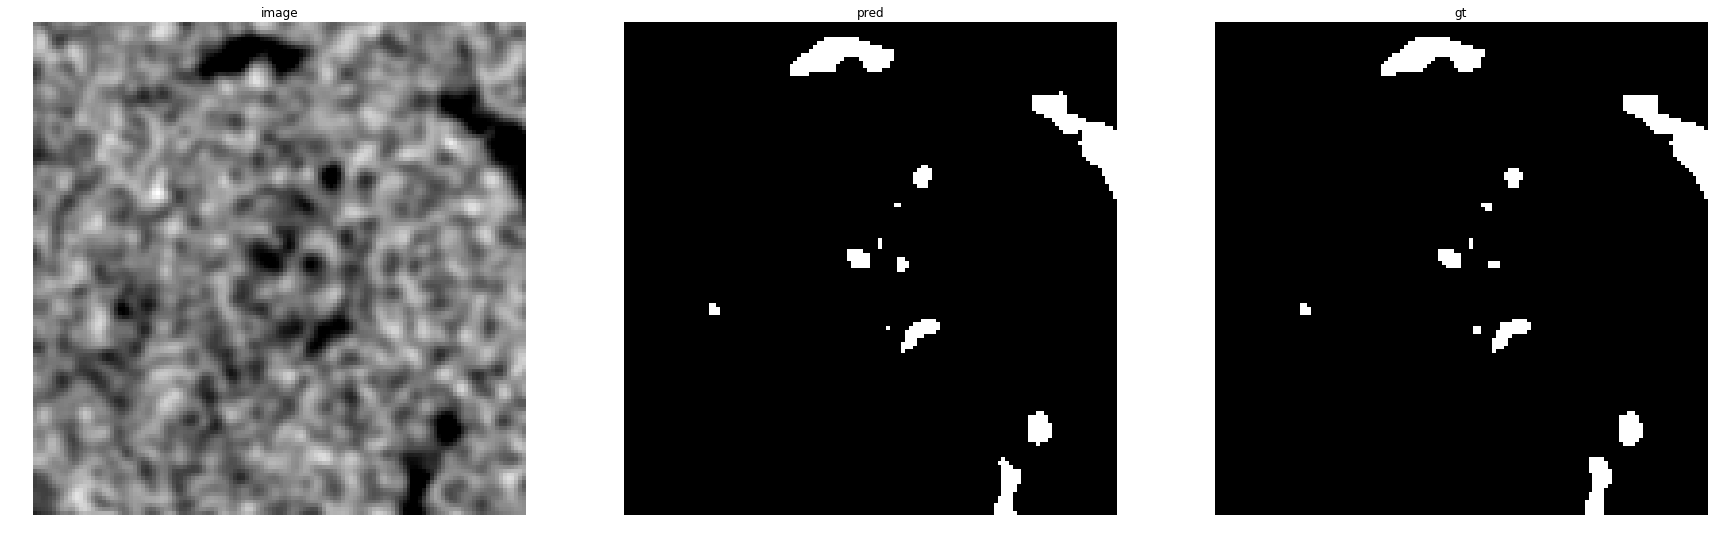

accuracy    : 0.99755859375
precision   : 0.9726495726495726
recall      : 0.9595278246205734
f1          : 0.9660441426146011
pr_auc      : 0.9960569756676089
iou         : 0.9343185550082101


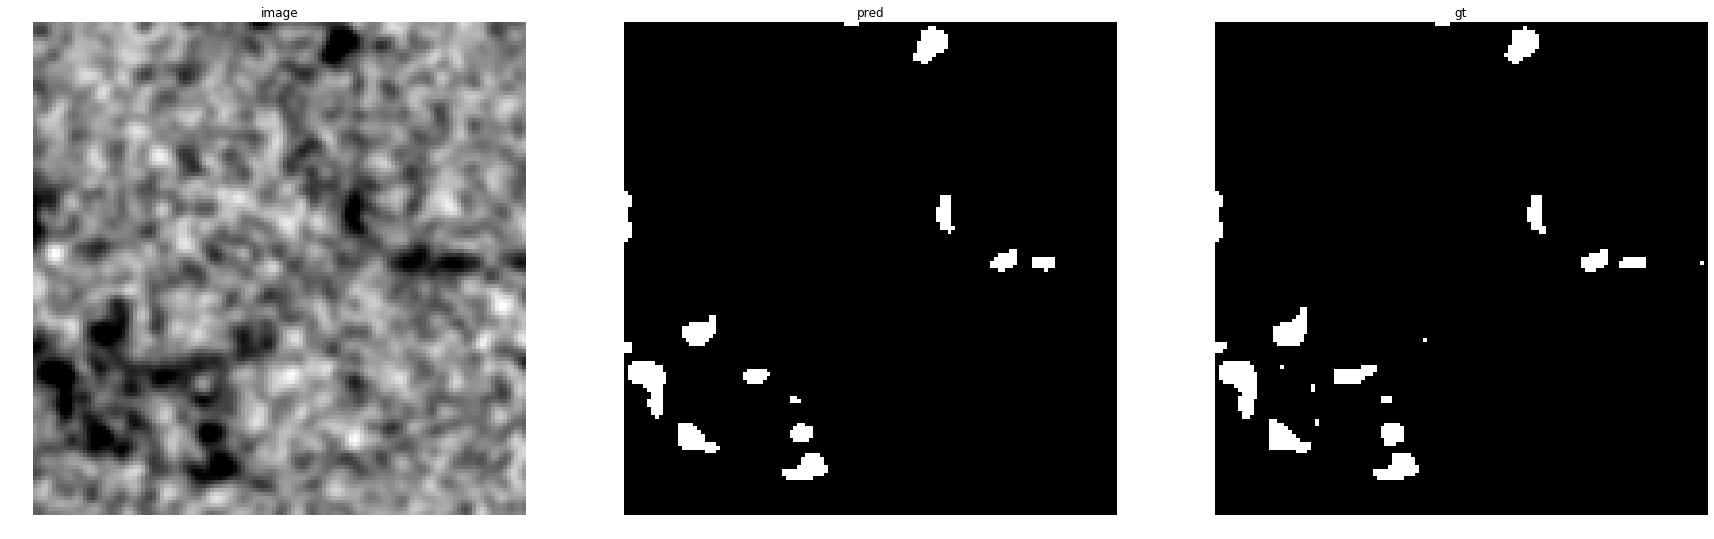

accuracy    : 0.9957275390625
precision   : 0.9911894273127754
recall      : 0.872093023255814
f1          : 0.9278350515463918
pr_auc      : 0.9843878875092873
iou         : 0.8653846153846154


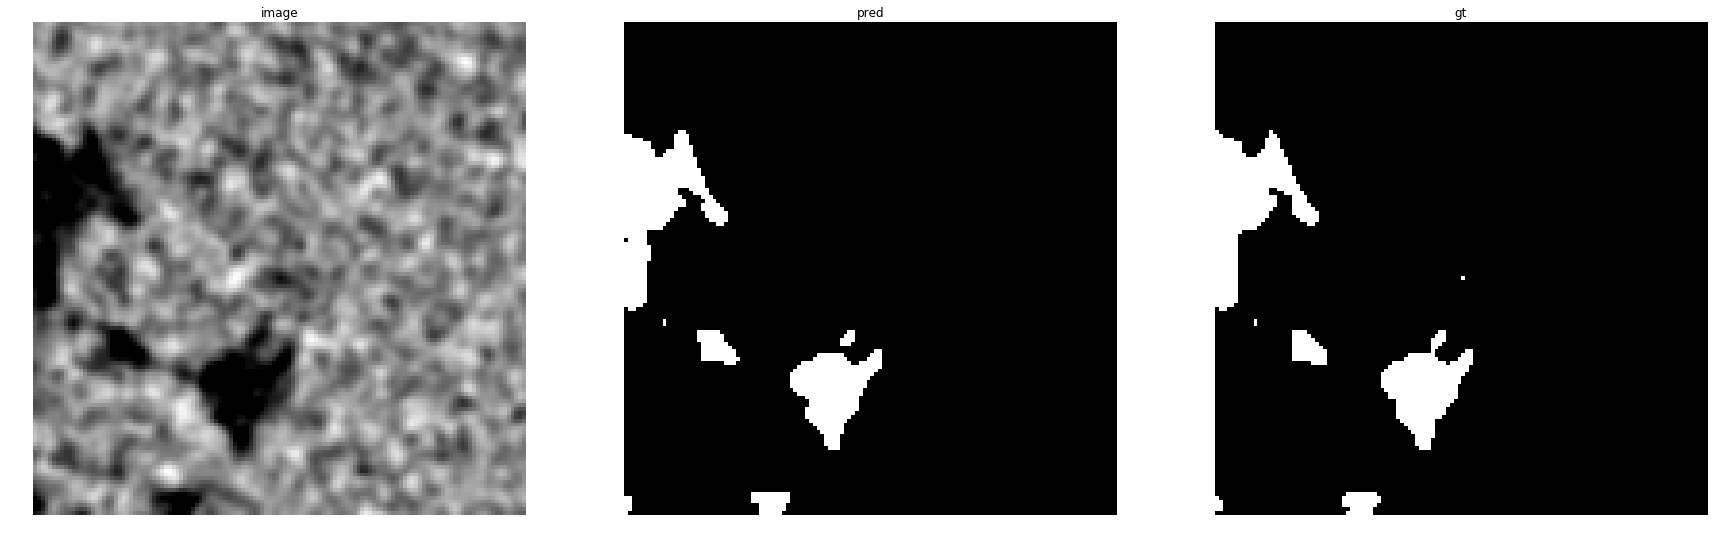

accuracy    : 0.9962158203125
precision   : 0.9754420432220039
recall      : 0.9640776699029127
f1          : 0.9697265625
pr_auc      : 0.9975956724288668
iou         : 0.9412322274881516


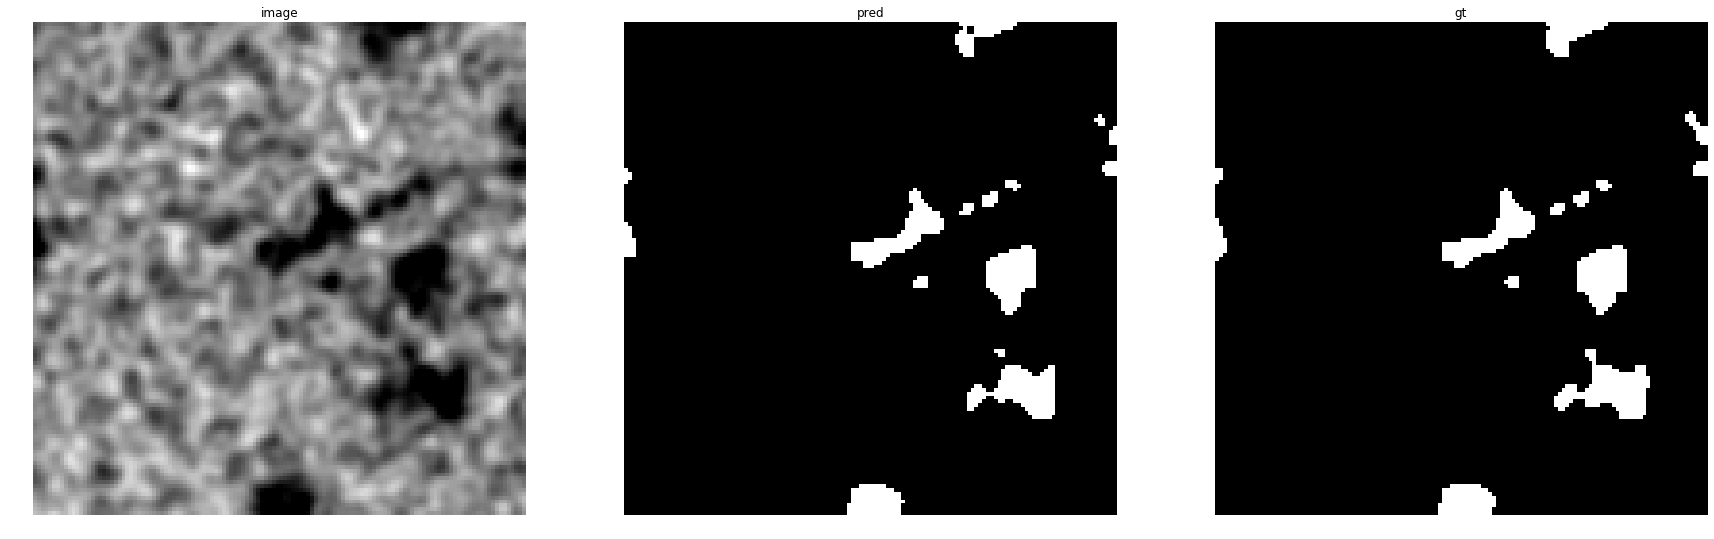

accuracy    : 0.99481201171875
precision   : 0.9898348157560356
recall      : 0.9100467289719626
f1          : 0.9482653682288497
pr_auc      : 0.996147053855639
iou         : 0.9016203703703703


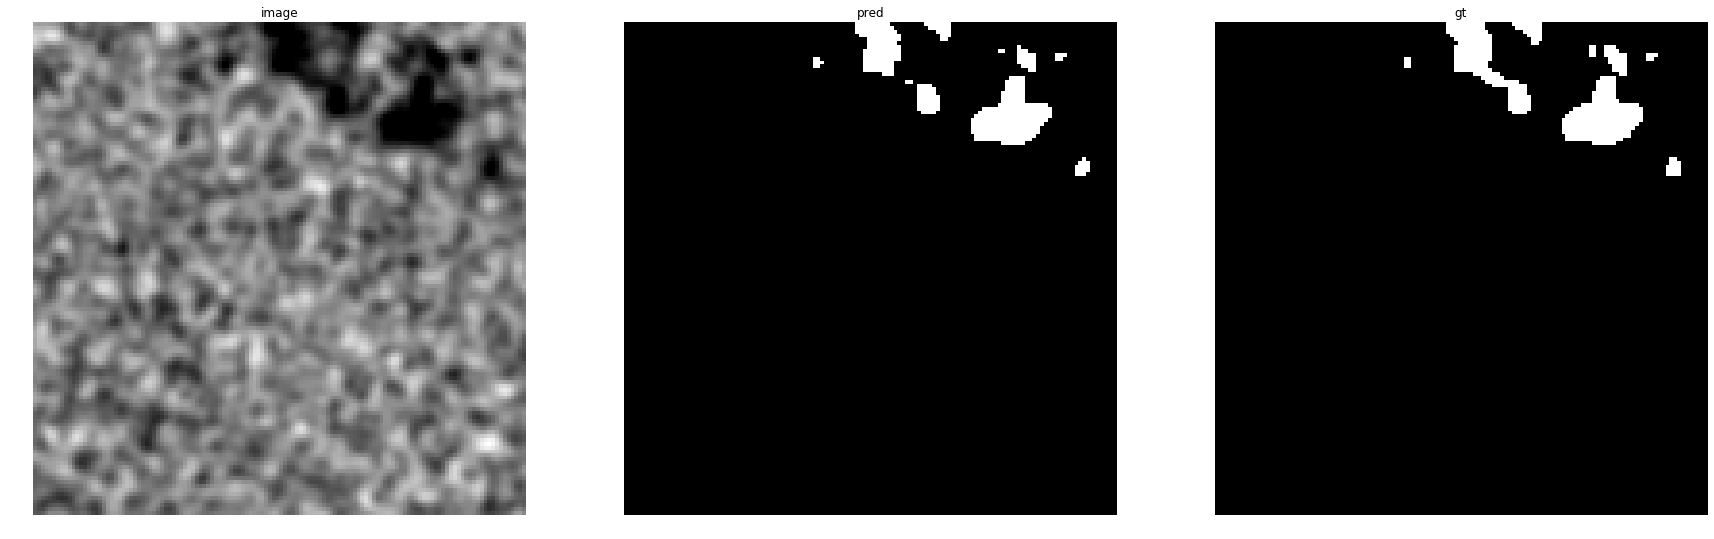

accuracy    : 0.99639892578125
precision   : 0.9978401727861771
recall      : 0.8884615384615384
f1          : 0.9399796541200407
pr_auc      : 0.9927062954954617
iou         : 0.8867562380038387


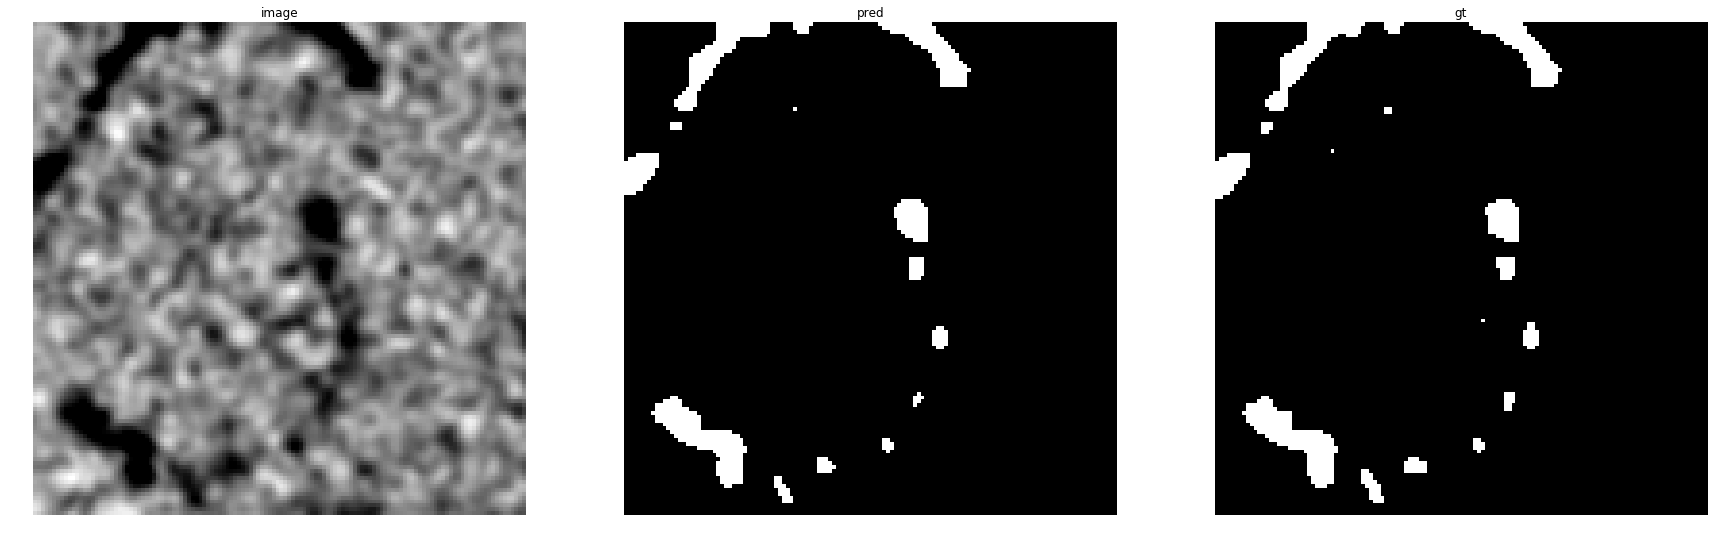

accuracy    : 0.99658203125
precision   : 0.9887640449438202
recall      : 0.9439809296781884
f1          : 0.9658536585365854
pr_auc      : 0.9957533663588535
iou         : 0.9339622641509434


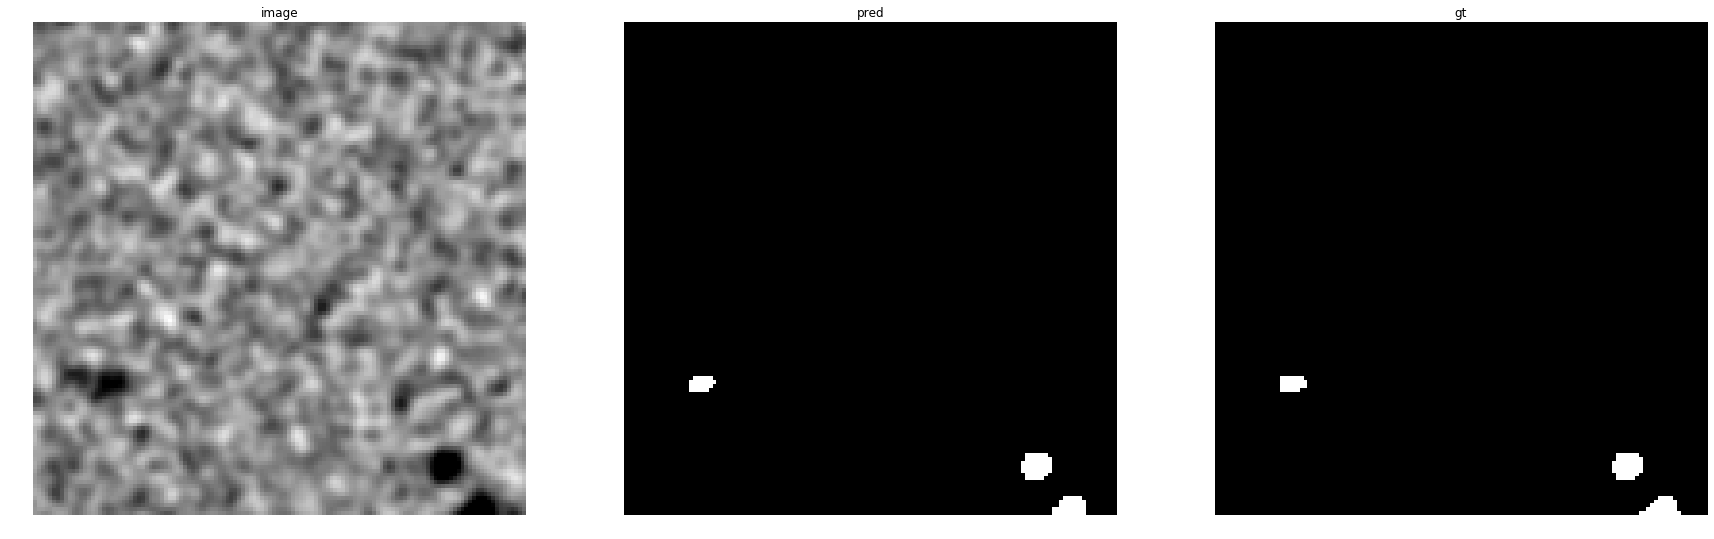

accuracy    : 0.99957275390625
precision   : 0.9722222222222222
recall      : 0.963302752293578
f1          : 0.9677419354838711
pr_auc      : 0.9964931957716416
iou         : 0.9375


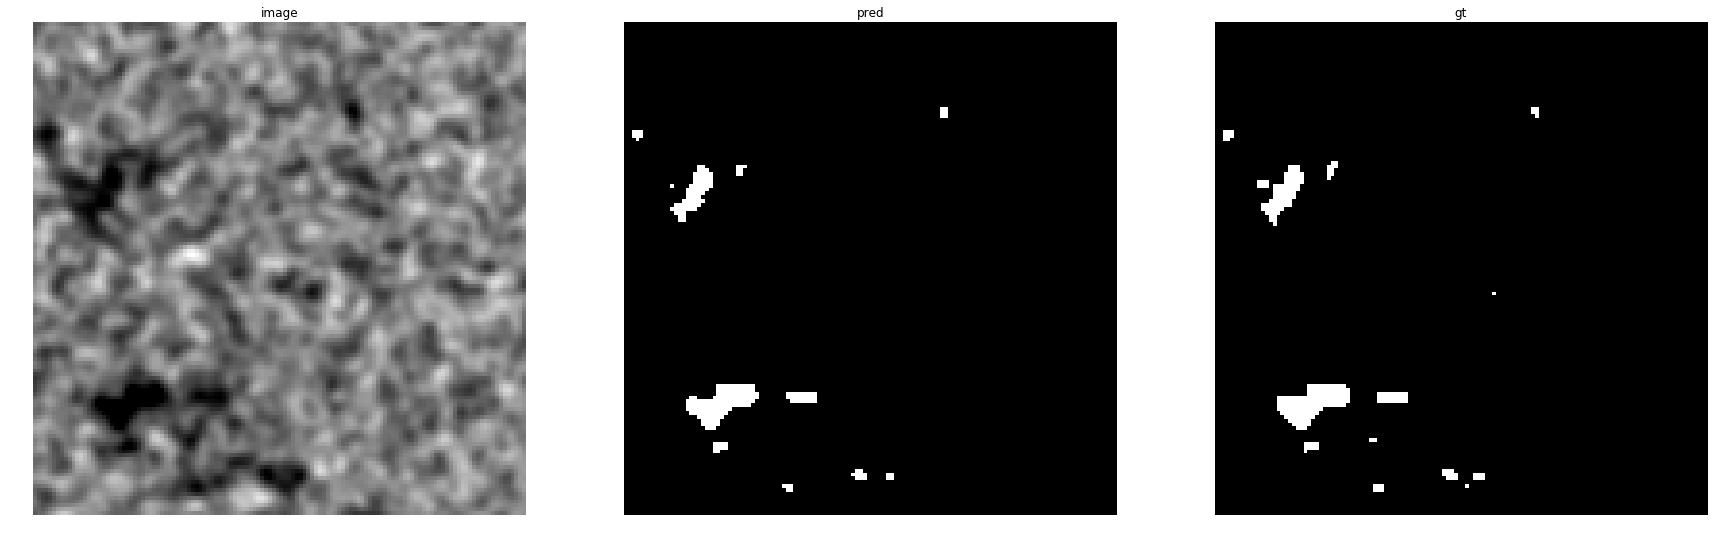

accuracy    : 0.997314453125
precision   : 0.9809160305343512
recall      : 0.8682432432432432
f1          : 0.921146953405018
pr_auc      : 0.9889155344376481
iou         : 0.8538205980066446


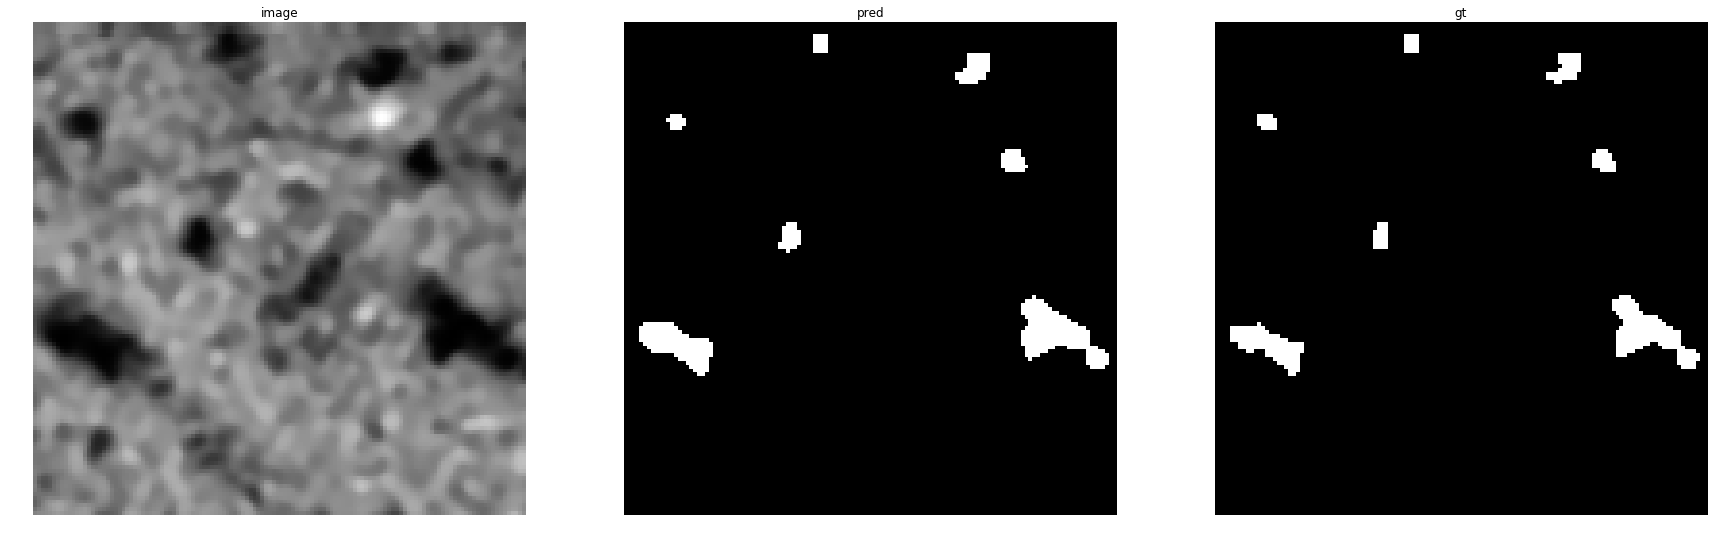

accuracy    : 0.99591064453125
precision   : 0.8799212598425197
recall      : 0.9867549668874173
f1          : 0.9302809573361082
pr_auc      : 0.9898563512357277
iou         : 0.8696498054474708


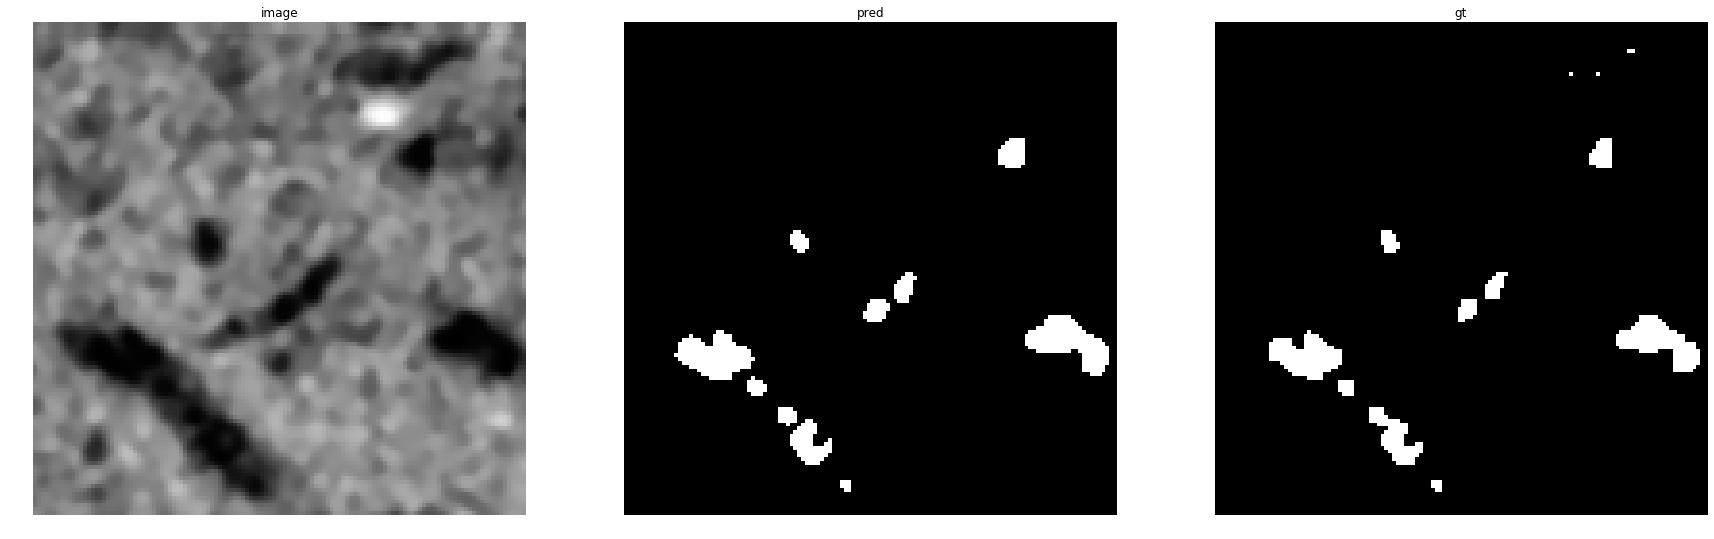

accuracy    : 0.99530029296875
precision   : 0.8940397350993378
recall      : 0.976491862567812
f1          : 0.9334485738980122
pr_auc      : 0.9883810089641747
iou         : 0.8752025931928687


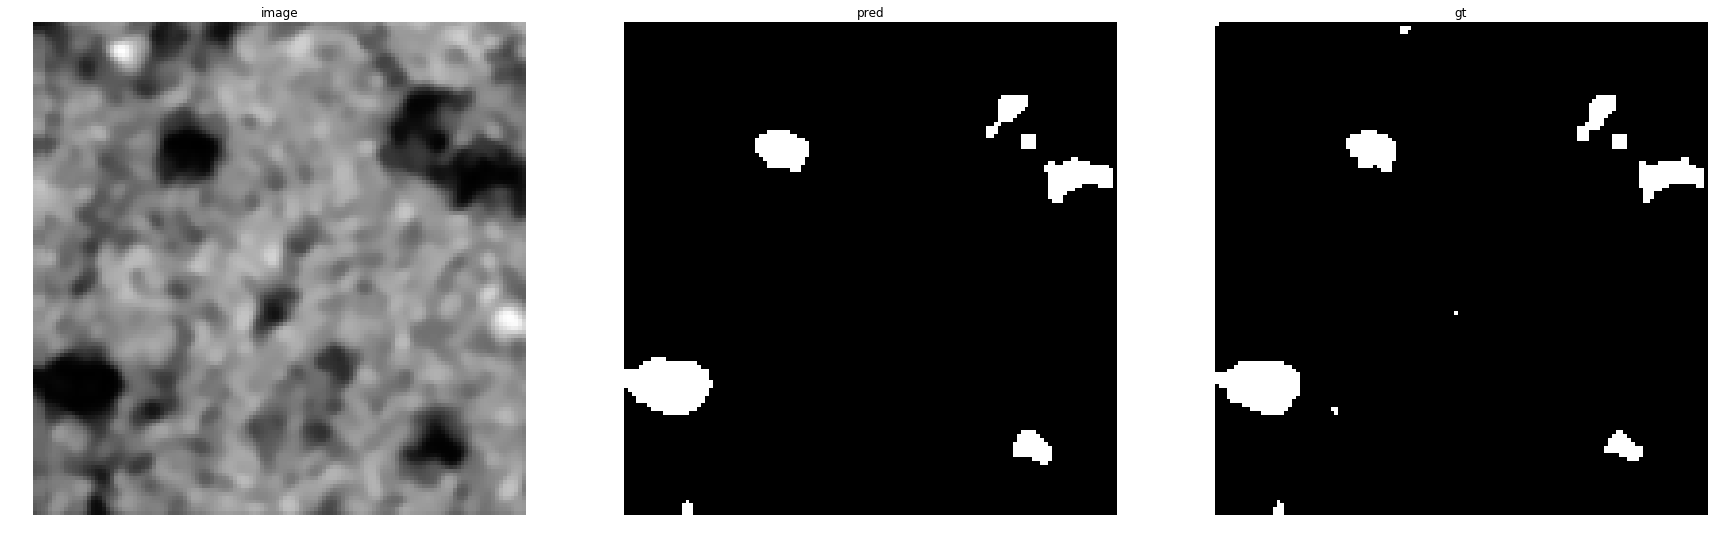

accuracy    : 0.994140625
precision   : 0.8900928792569659
recall      : 0.9583333333333334
f1          : 0.9229534510433386
pr_auc      : 0.9851789131106948
iou         : 0.856929955290611


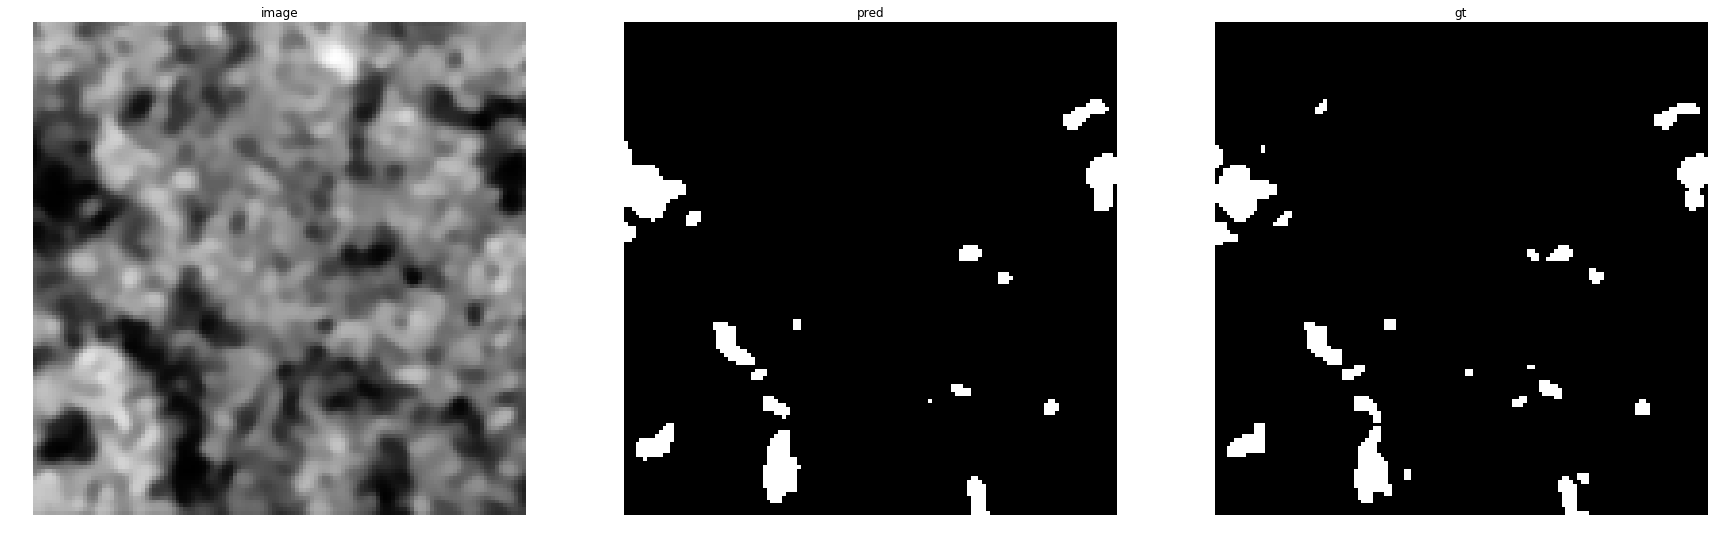

accuracy    : 0.99005126953125
precision   : 0.9178272980501393
recall      : 0.8636959370904325
f1          : 0.889939230249831
pr_auc      : 0.9649411548111312
iou         : 0.8017031630170316


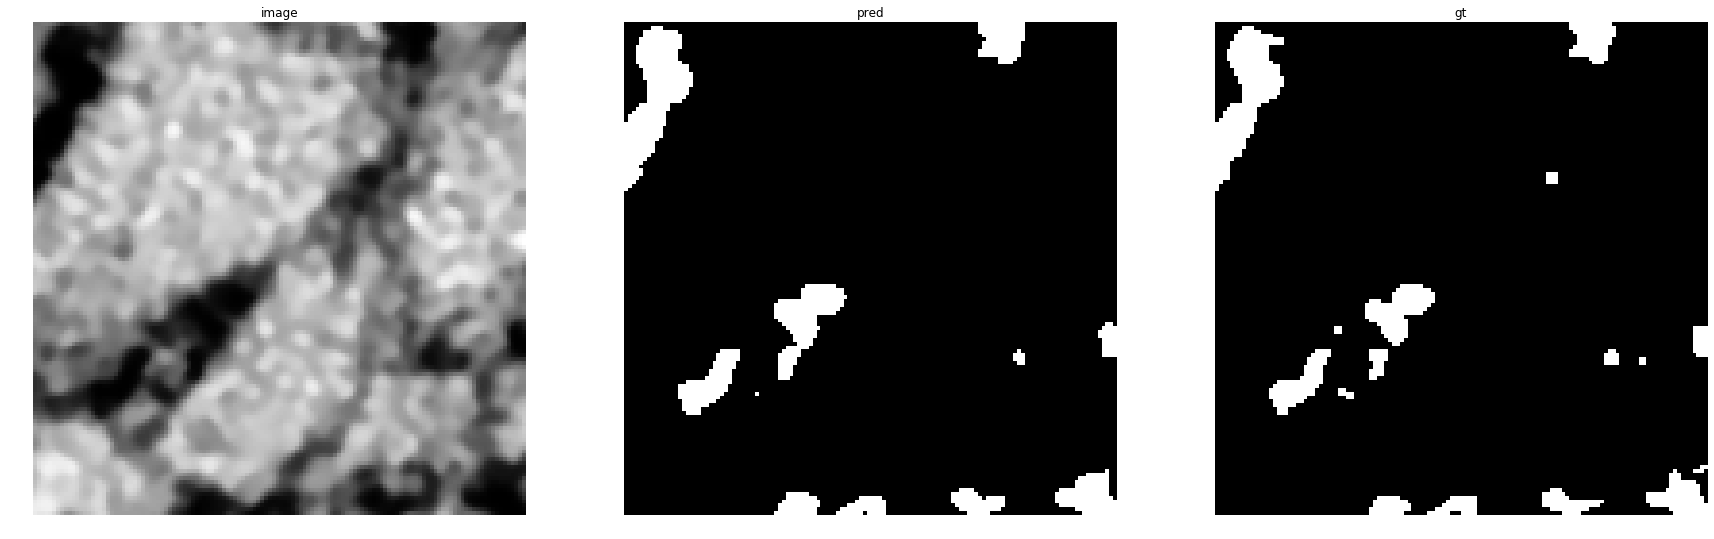

accuracy    : 0.98895263671875
precision   : 0.8879456706281834
recall      : 0.9552511415525115
f1          : 0.9203695556533216
pr_auc      : 0.9867447432361944
iou         : 0.8524857375713122


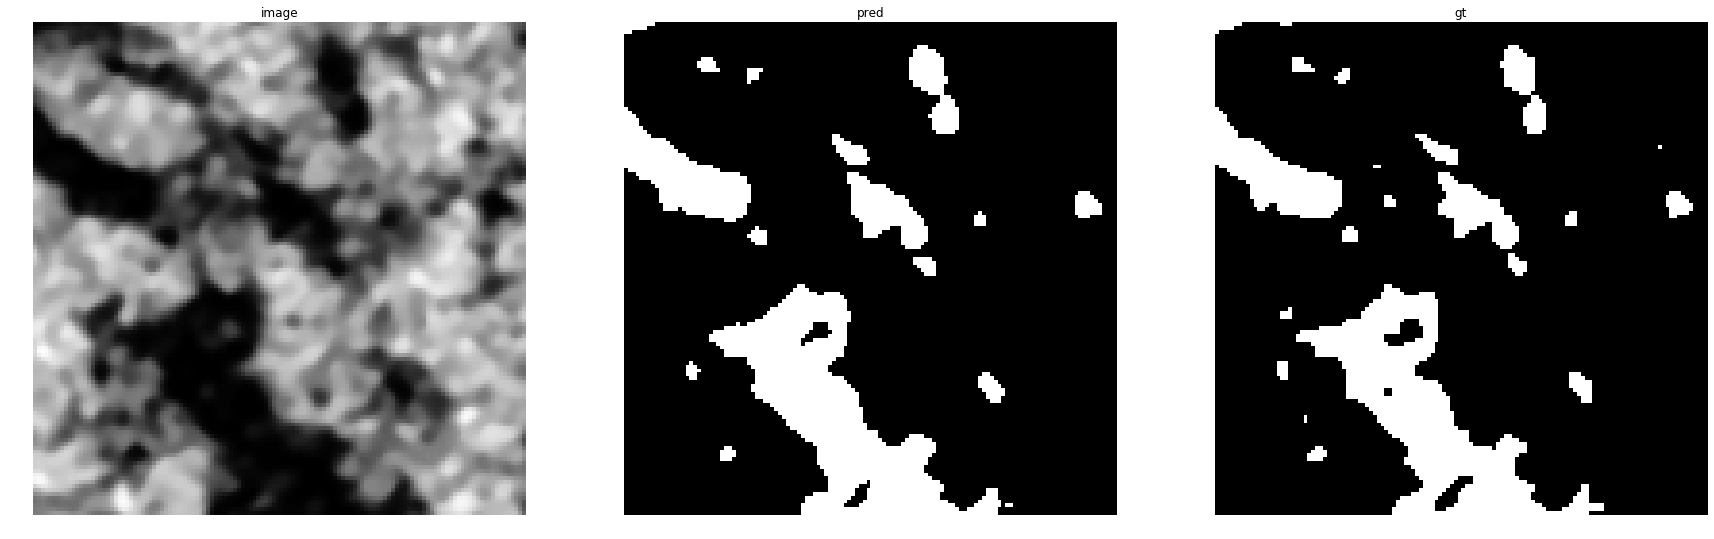

accuracy    : 0.98358154296875
precision   : 0.9205020920502092
recall      : 0.9758064516129032
f1          : 0.9473478175768252
pr_auc      : 0.9944883440851473
iou         : 0.8999628114540722


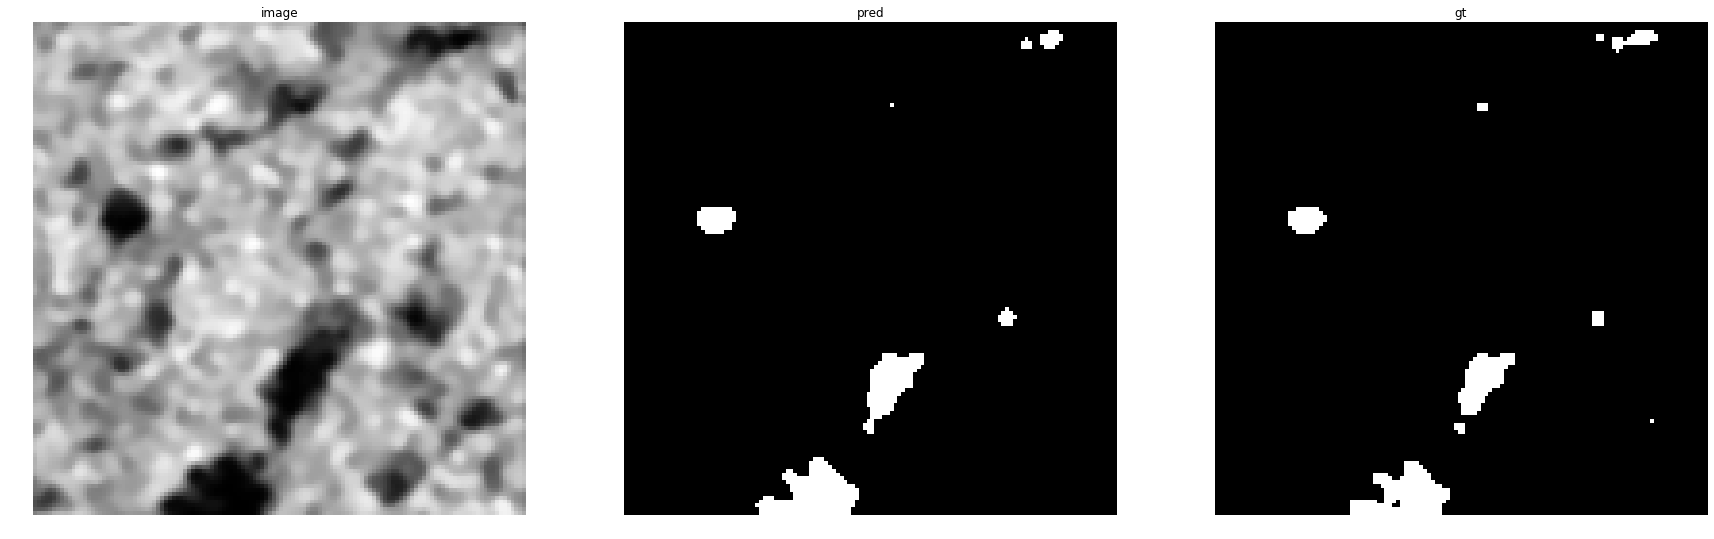

accuracy    : 0.9951171875
precision   : 0.8840864440078585
recall      : 0.9554140127388535
f1          : 0.9183673469387754
pr_auc      : 0.9858342760834242
iou         : 0.8490566037735849


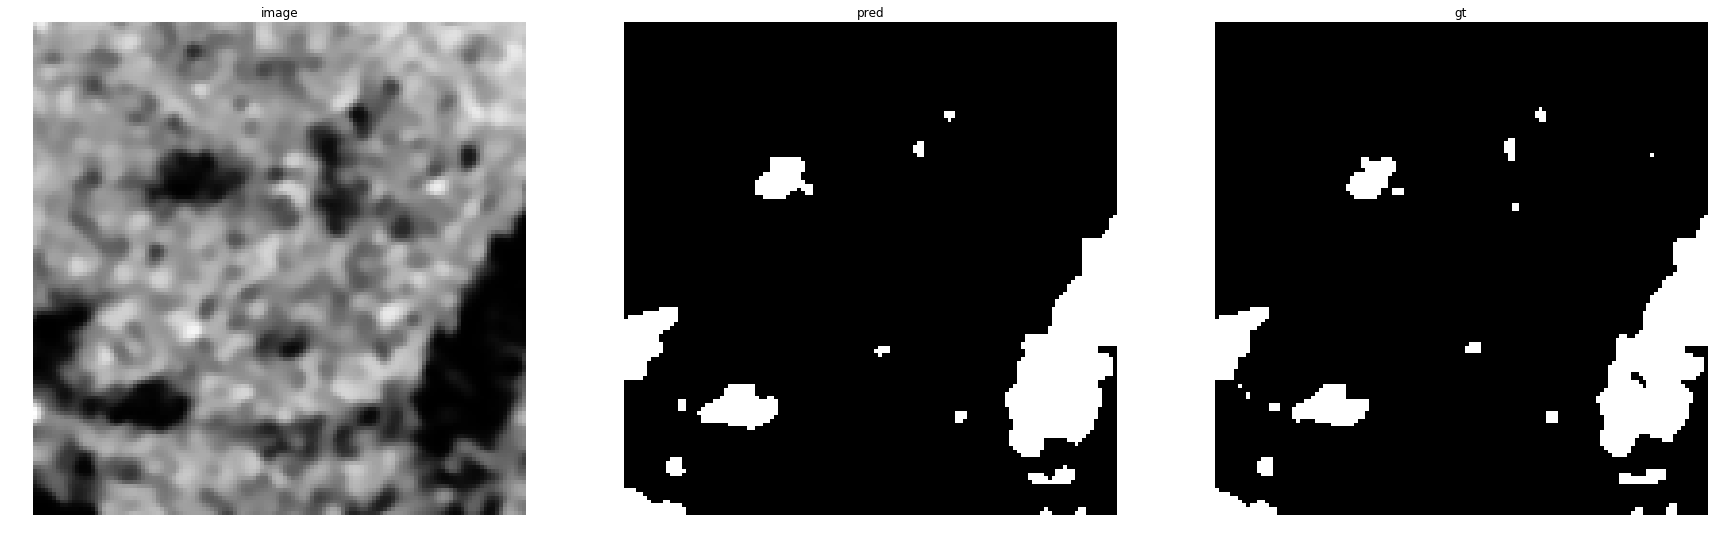

accuracy    : 0.99169921875
precision   : 0.9343653250773993
recall      : 0.9805068226120858
f1          : 0.9568801521876982
pr_auc      : 0.9960707223749324
iou         : 0.9173252279635259


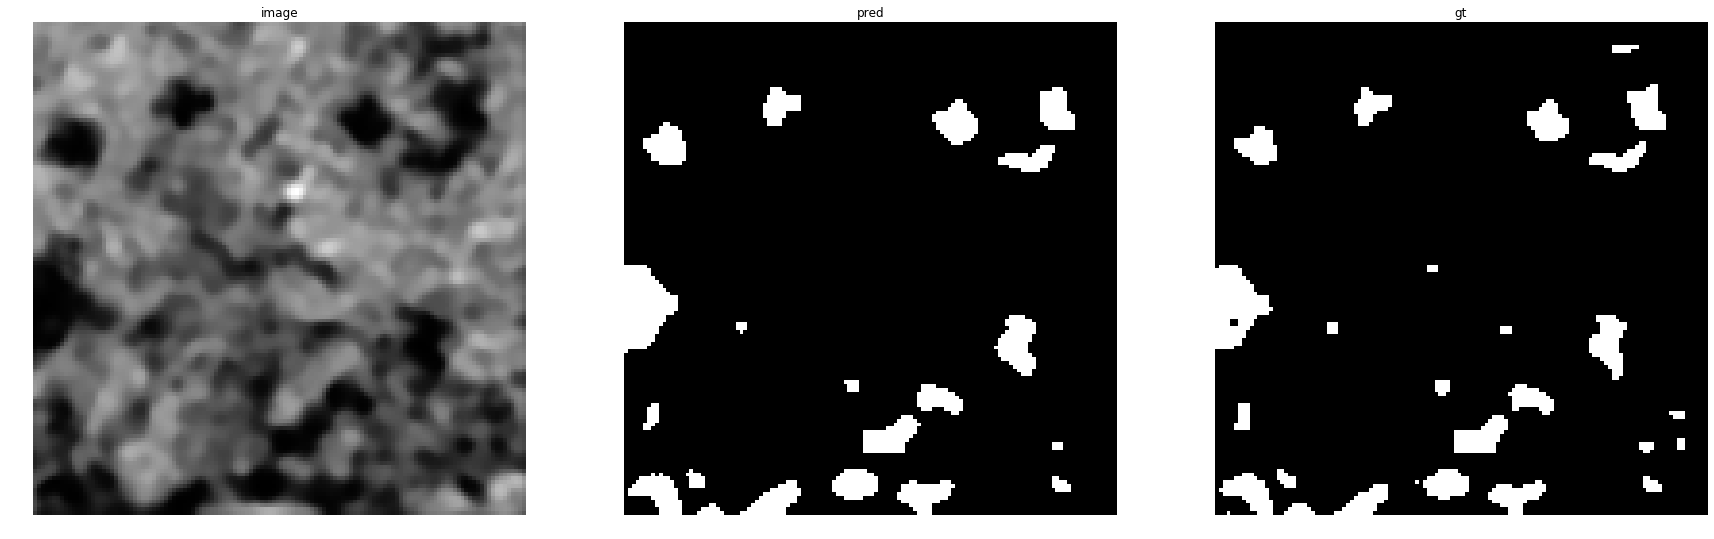

accuracy    : 0.9884033203125
precision   : 0.9121048573631457
recall      : 0.9396346306592533
f1          : 0.9256651017214397
pr_auc      : 0.9816649382442423
iou         : 0.8616168973051711


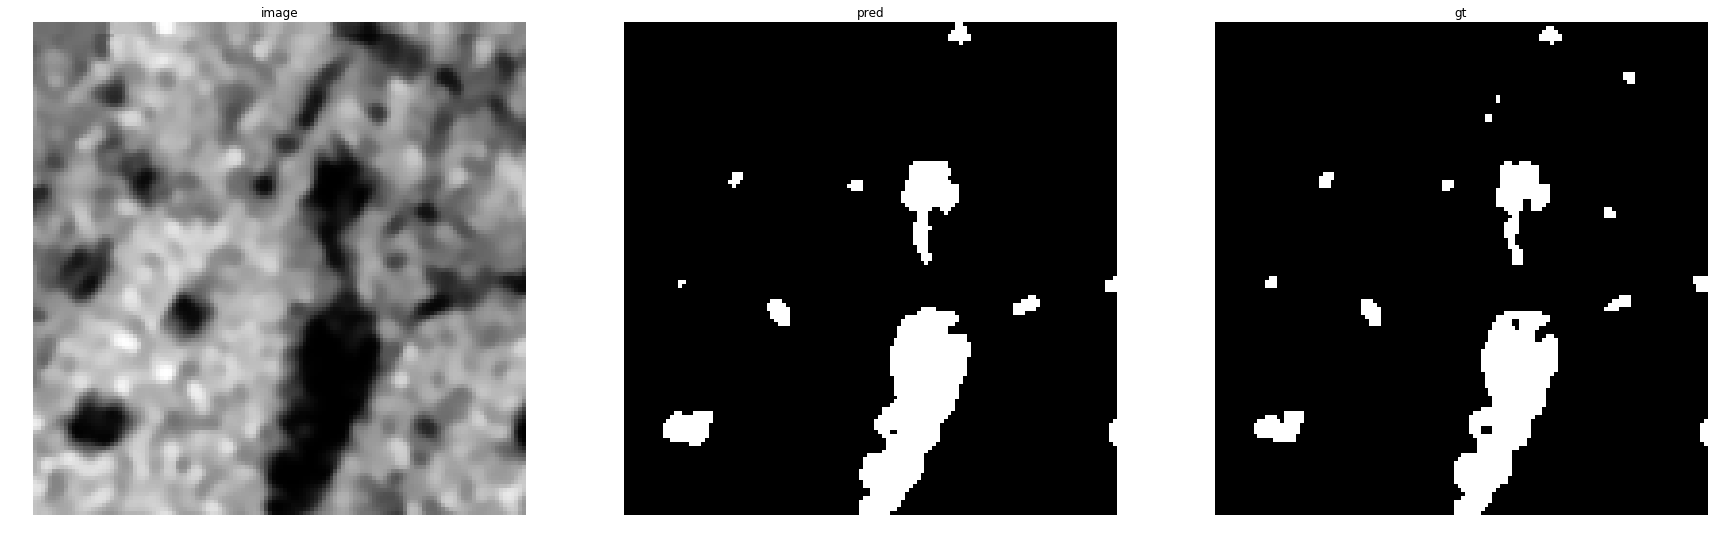

accuracy    : 0.9892578125
precision   : 0.8905750798722045
recall      : 0.9662045060658578
f1          : 0.9268495428096426
pr_auc      : 0.9894736082968365
iou         : 0.8636715724244771


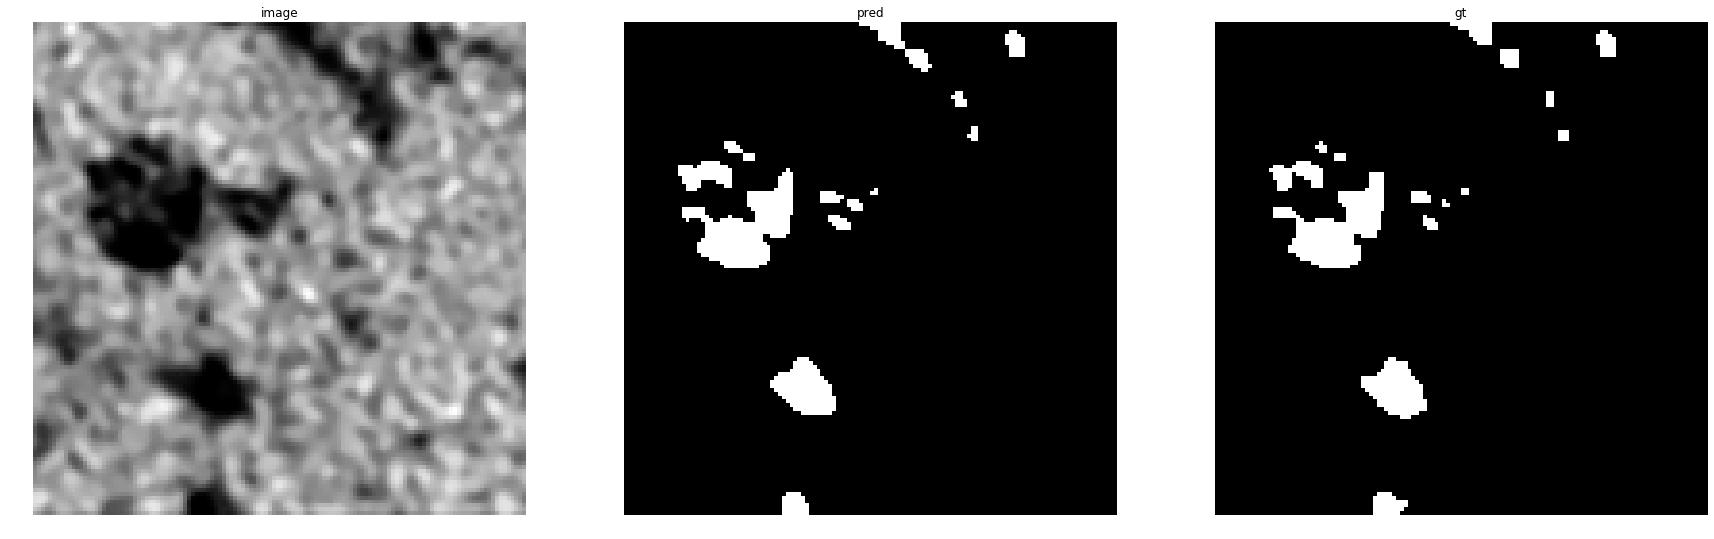

accuracy    : 0.99493408203125
precision   : 0.9222222222222223
recall      : 0.9739243807040417
f1          : 0.9473684210526316
pr_auc      : 0.9930470152513248
iou         : 0.9


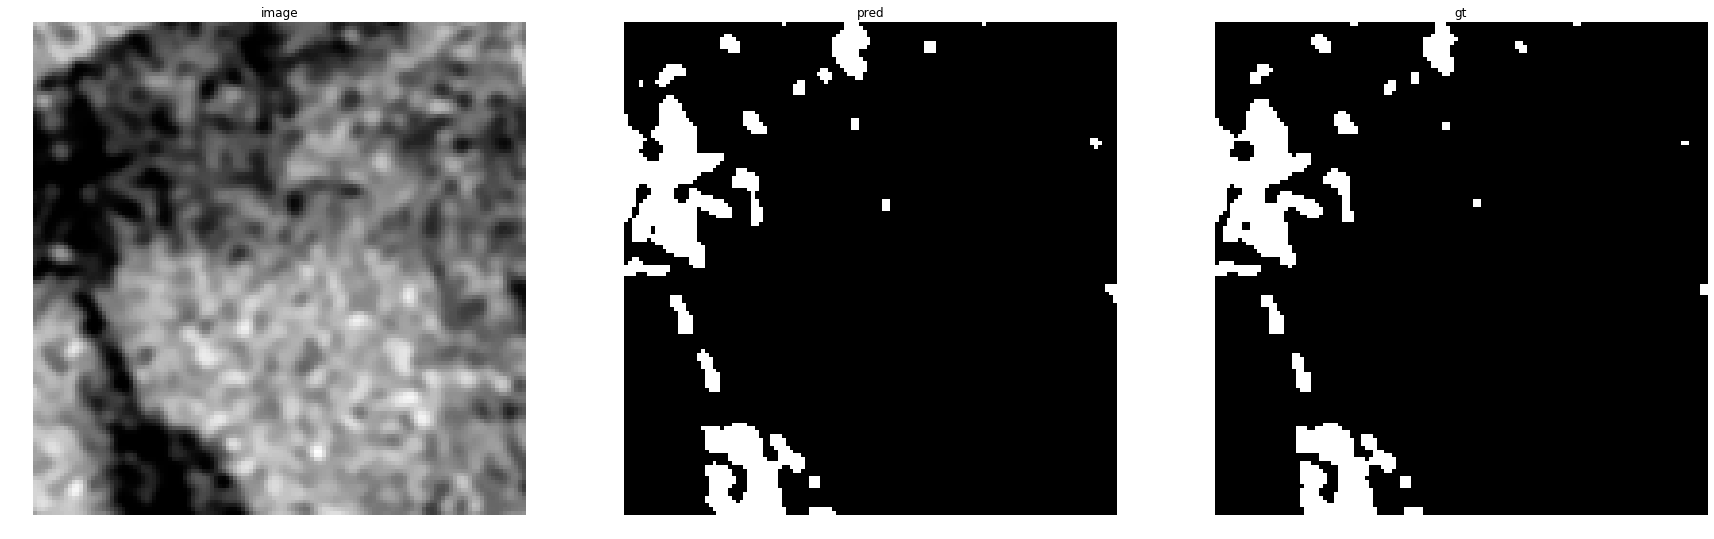

accuracy    : 0.9910888671875
precision   : 0.9186046511627907
recall      : 0.9802919708029197
f1          : 0.9484463276836158
pr_auc      : 0.9939264390395985
iou         : 0.9019476158495635


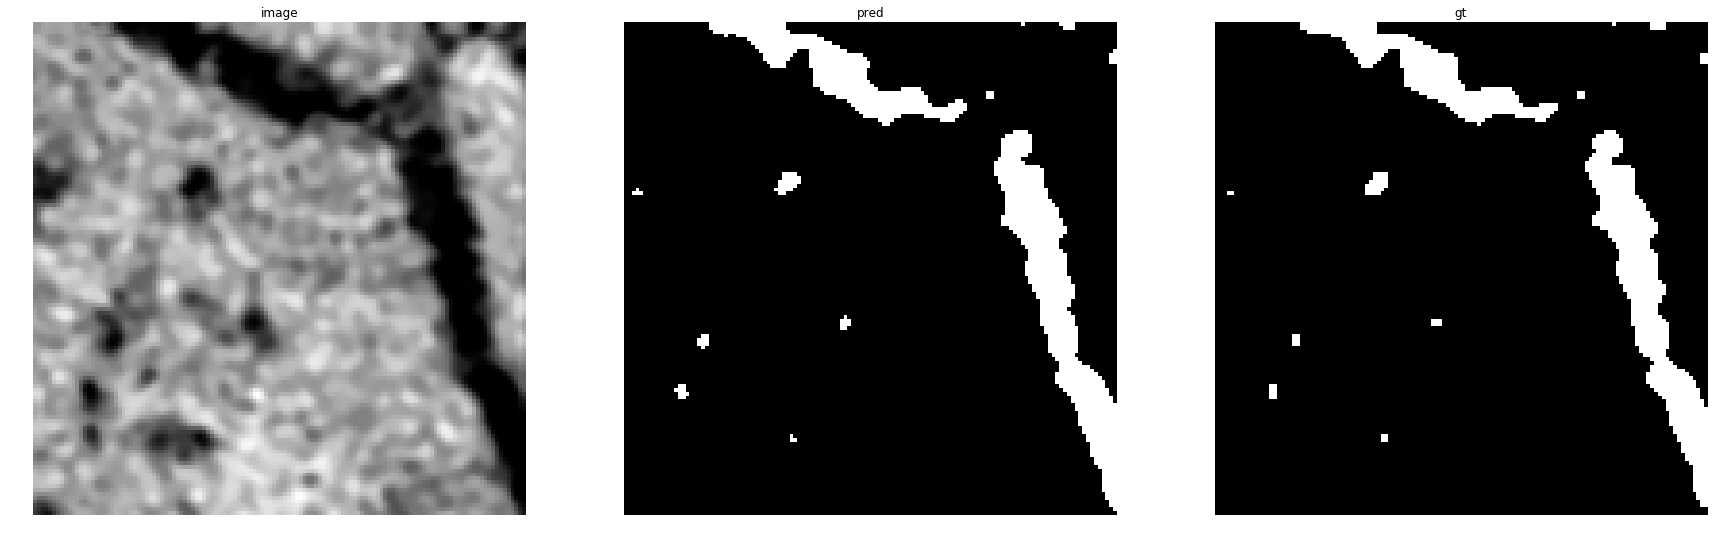

accuracy    : 0.99517822265625
precision   : 0.9568393094289509
recall      : 0.9903780068728523
f1          : 0.9733198243836542
pr_auc      : 0.998830343374901
iou         : 0.9480263157894737


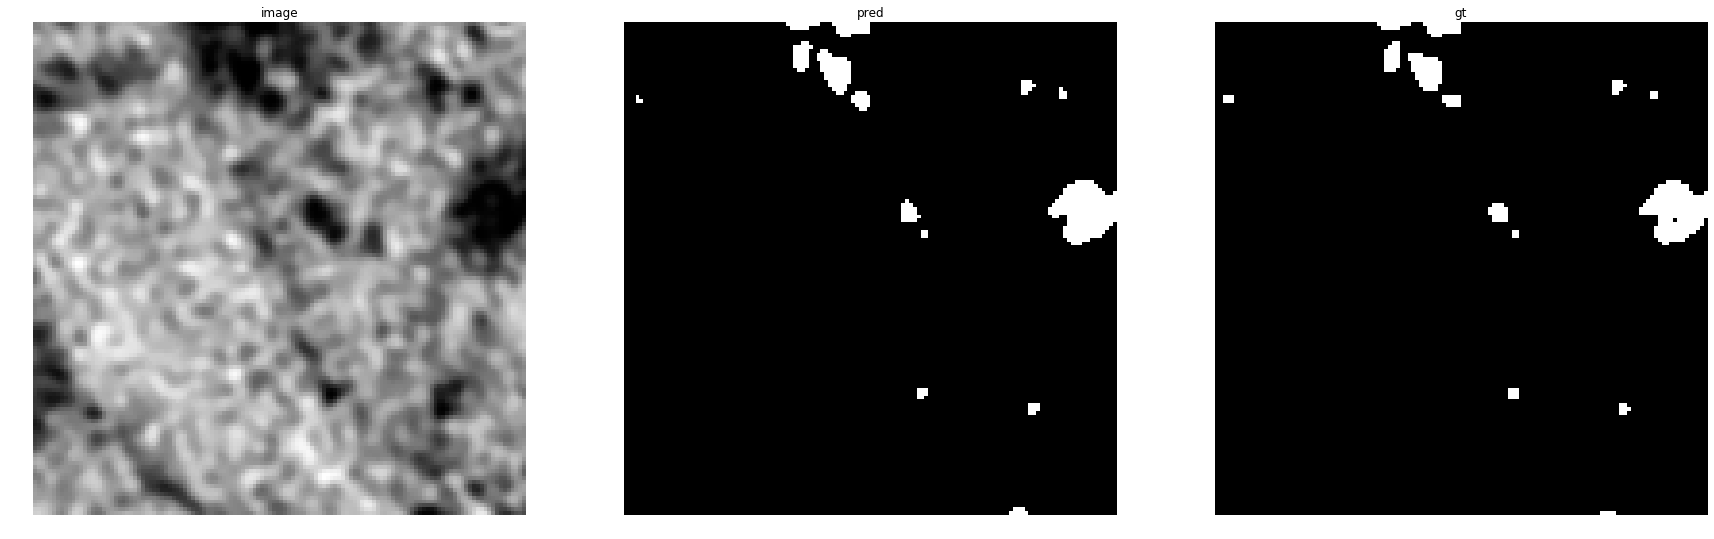

accuracy    : 0.997802734375
precision   : 0.9351851851851852
recall      : 0.9805825242718447
f1          : 0.9573459715639812
pr_auc      : 0.9959848726873042
iou         : 0.9181818181818182


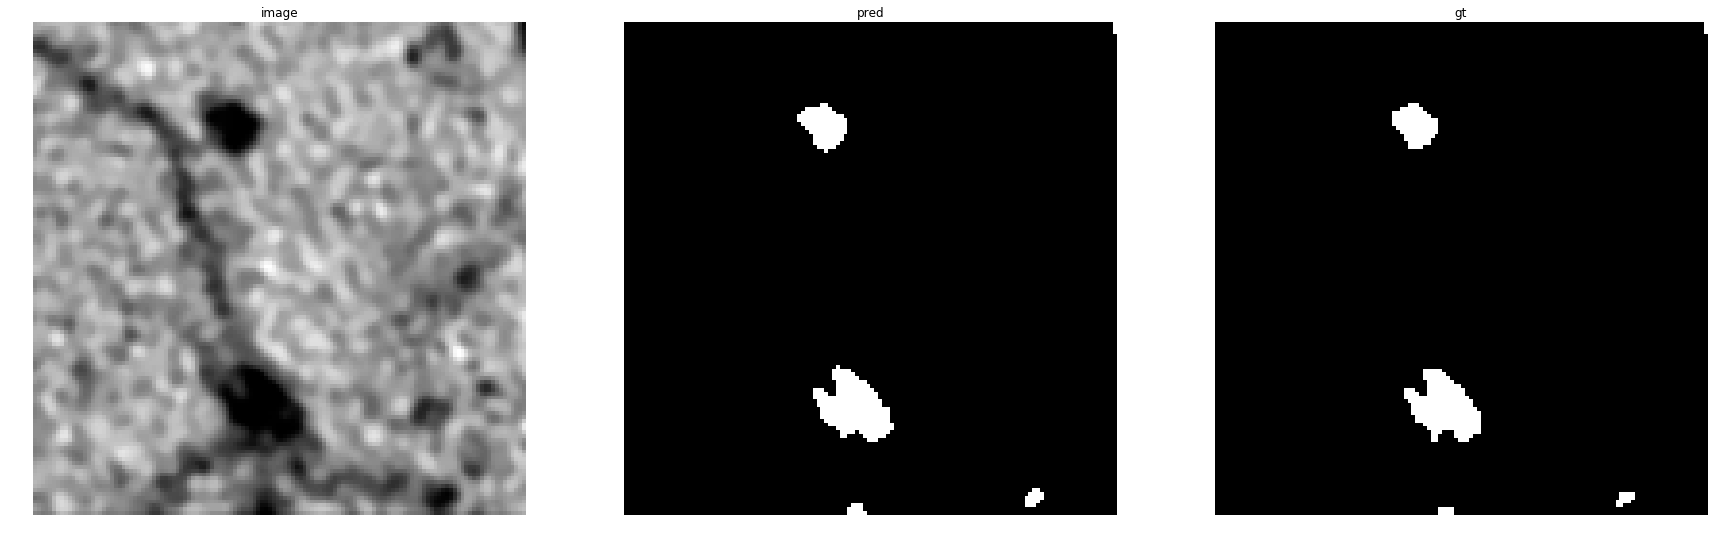

accuracy    : 0.99810791015625
precision   : 0.9261213720316622
recall      : 0.9915254237288136
f1          : 0.9577080491132334
pr_auc      : 0.9966437981628254
iou         : 0.918848167539267


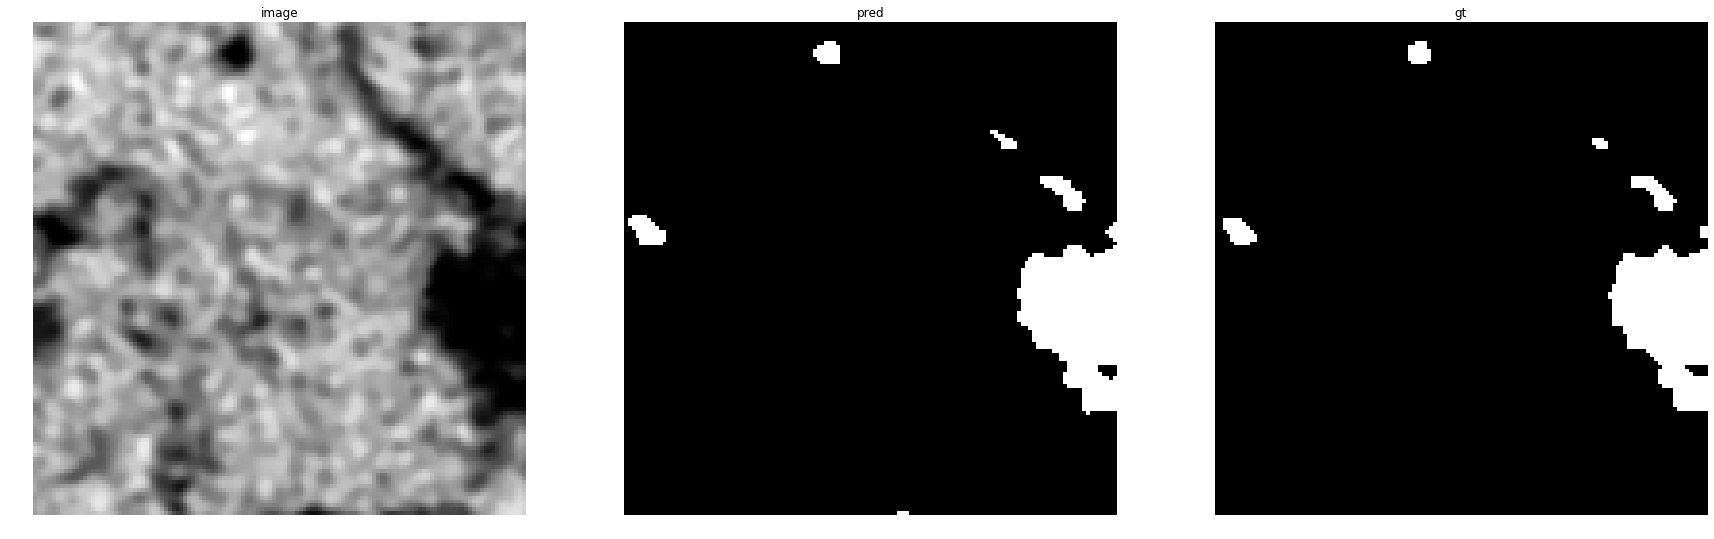

accuracy    : 0.99609375
precision   : 0.9356846473029046
recall      : 0.9977876106194691
f1          : 0.9657387580299786
pr_auc      : 0.9991597109295267
iou         : 0.9337474120082816


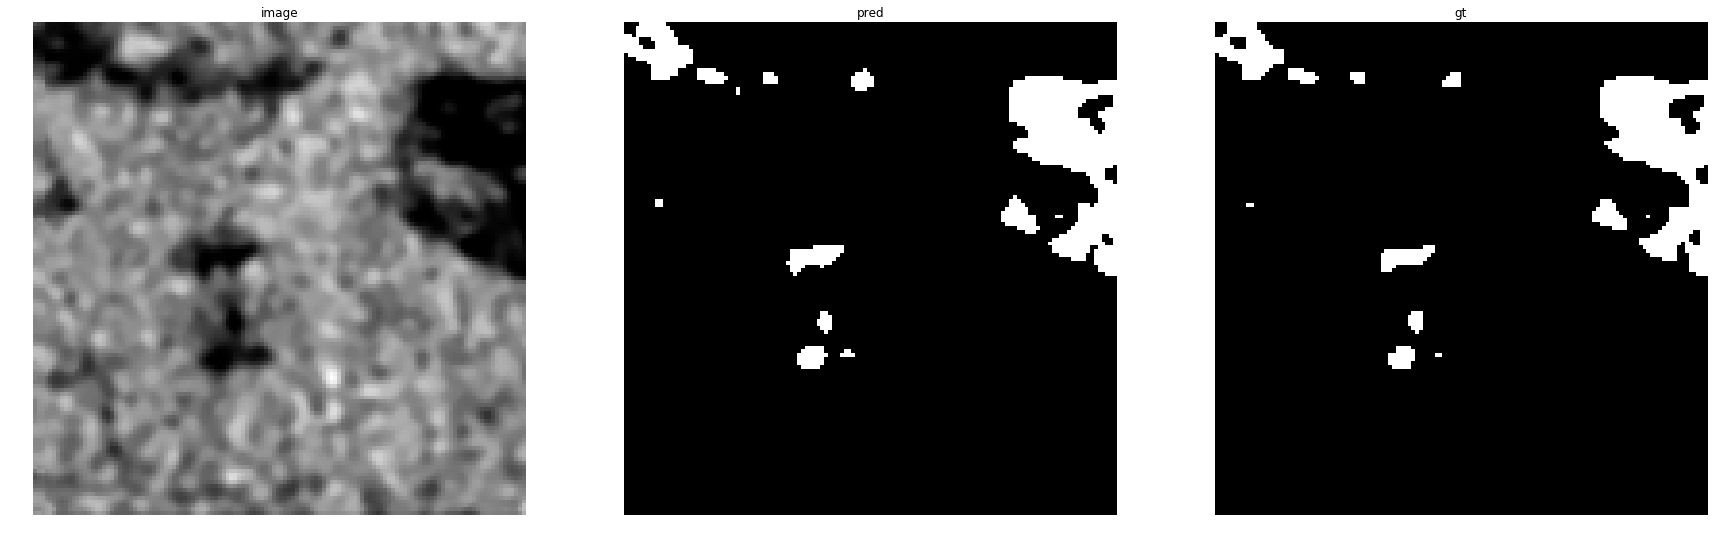

accuracy    : 0.99365234375
precision   : 0.9233937397034596
recall      : 0.9902826855123675
f1          : 0.9556692242114238
pr_auc      : 0.9971778212190684
iou         : 0.9151020408163265


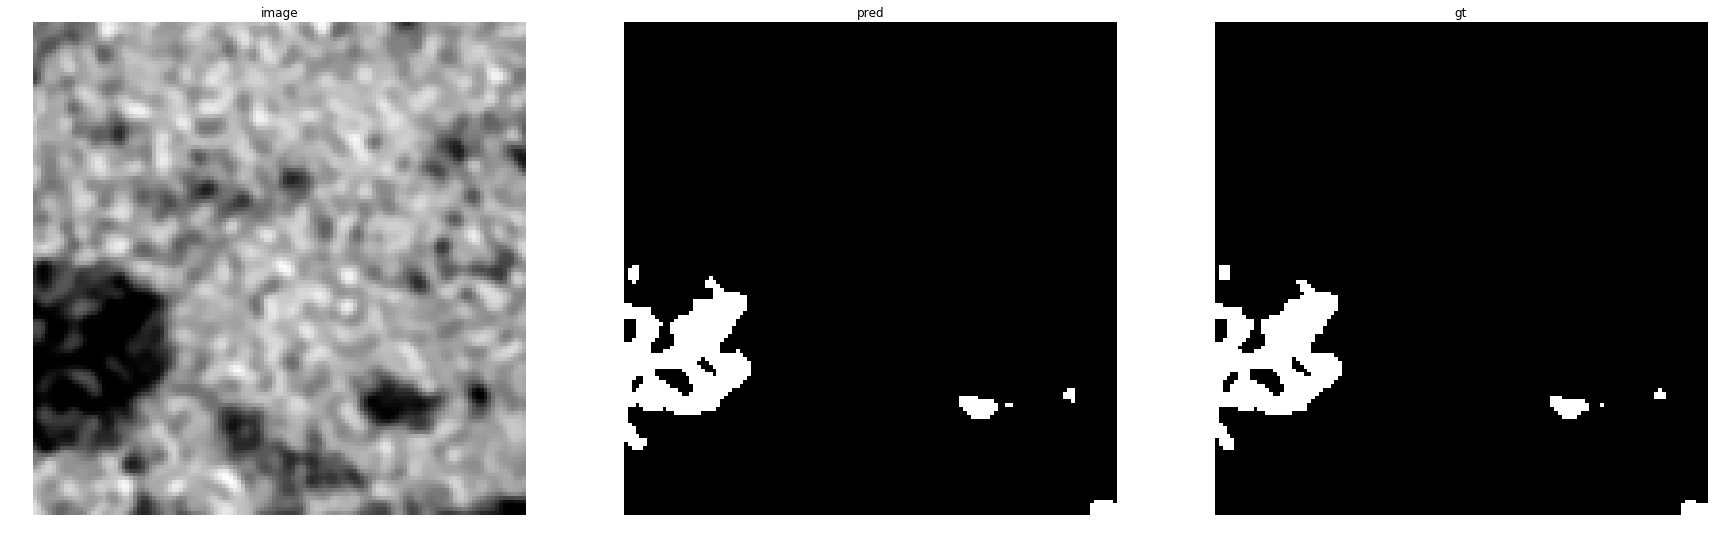

accuracy    : 0.99774169921875
precision   : 0.9683313032886723
recall      : 0.9863523573200993
f1          : 0.9772587584511371
pr_auc      : 0.9982337059745188
iou         : 0.9555288461538461


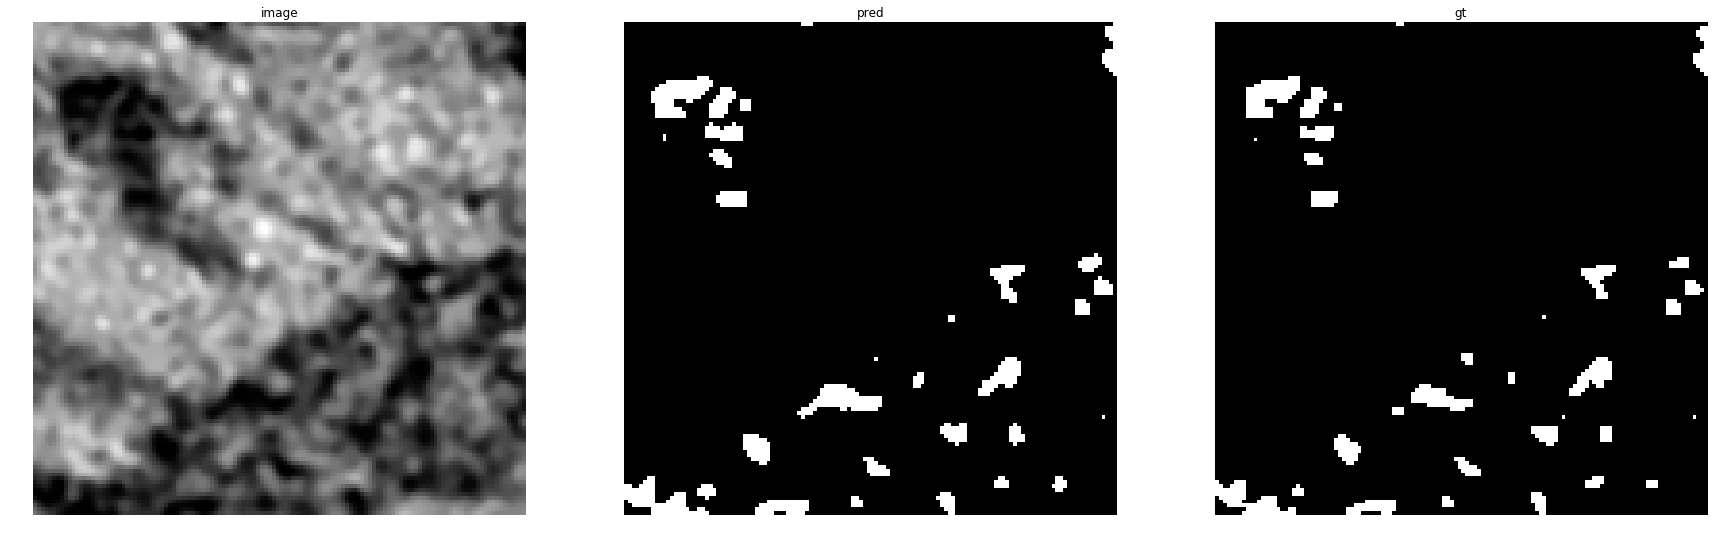

accuracy    : 0.9898681640625
precision   : 0.8312138728323699
recall      : 0.972936400541272
f1          : 0.8965087281795512
pr_auc      : 0.9853820779810031
iou         : 0.8124293785310734


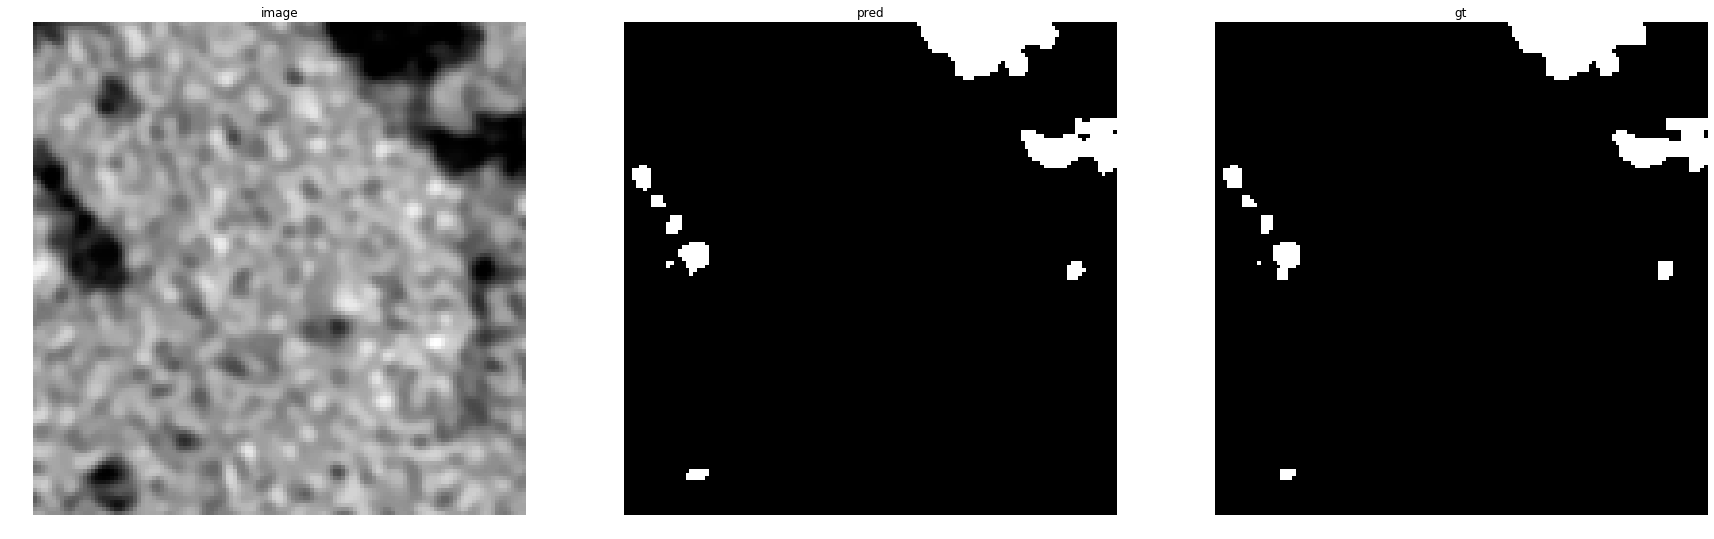

accuracy    : 0.99664306640625
precision   : 0.9386084583901774
recall      : 0.9856733524355301
f1          : 0.9615653389238294
pr_auc      : 0.9963476429617362
iou         : 0.9259757738896366


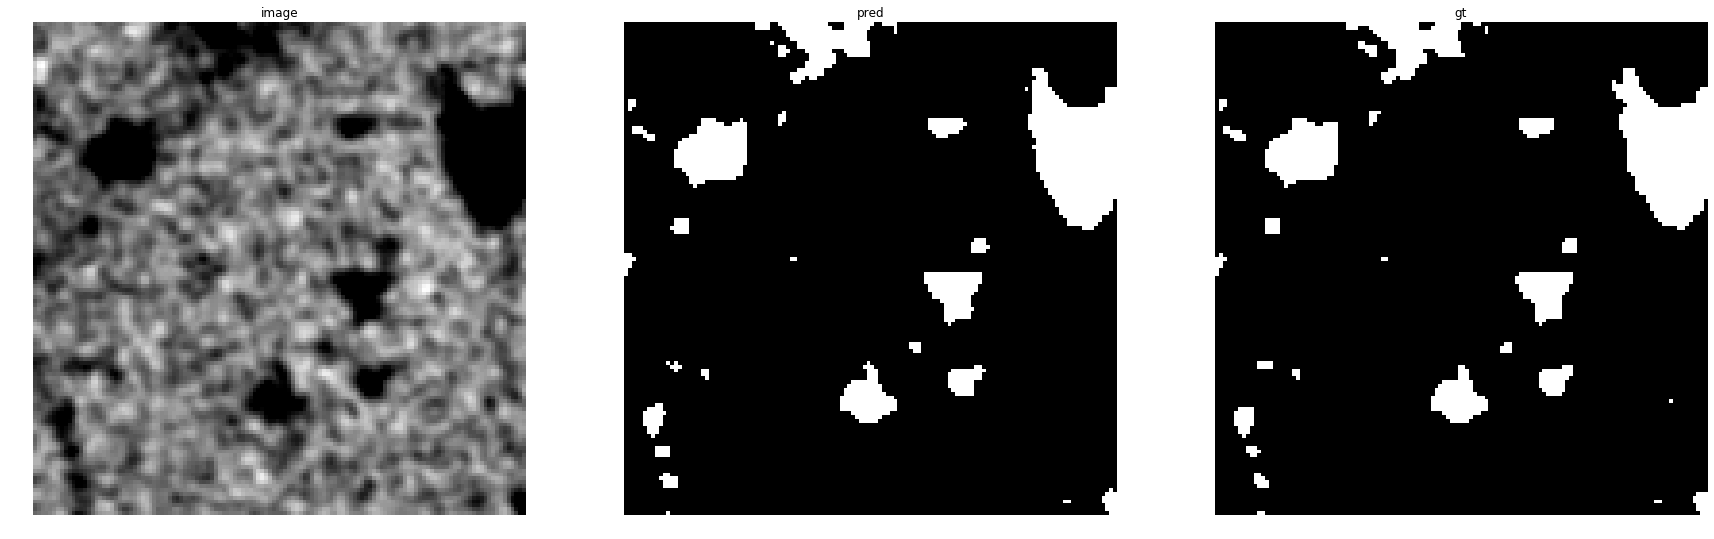

accuracy    : 0.9947509765625
precision   : 0.973715651135006
recall      : 0.9748803827751196
f1          : 0.9742976688583382
pr_auc      : 0.9979795769043094
iou         : 0.9498834498834499


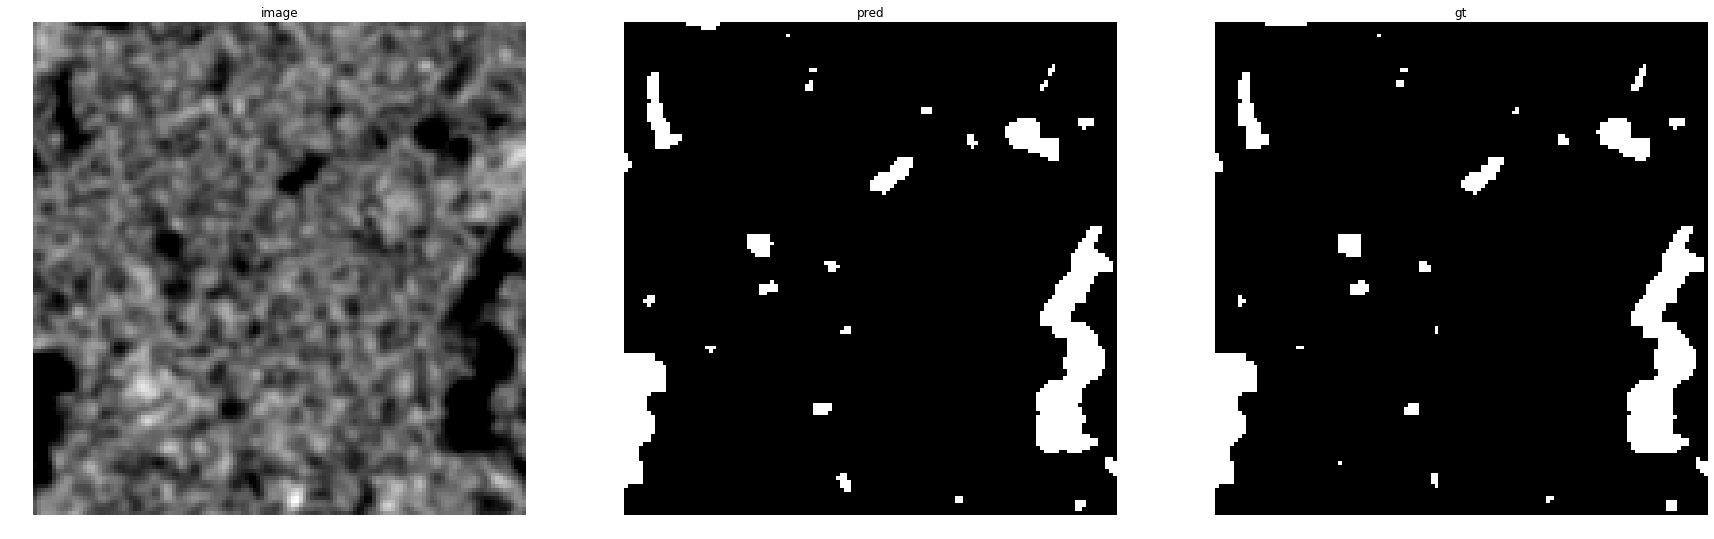

accuracy    : 0.9949951171875
precision   : 0.9592502037489813
recall      : 0.9735318444995864
f1          : 0.9663382594417077
pr_auc      : 0.9960723880184625
iou         : 0.9348689436060366


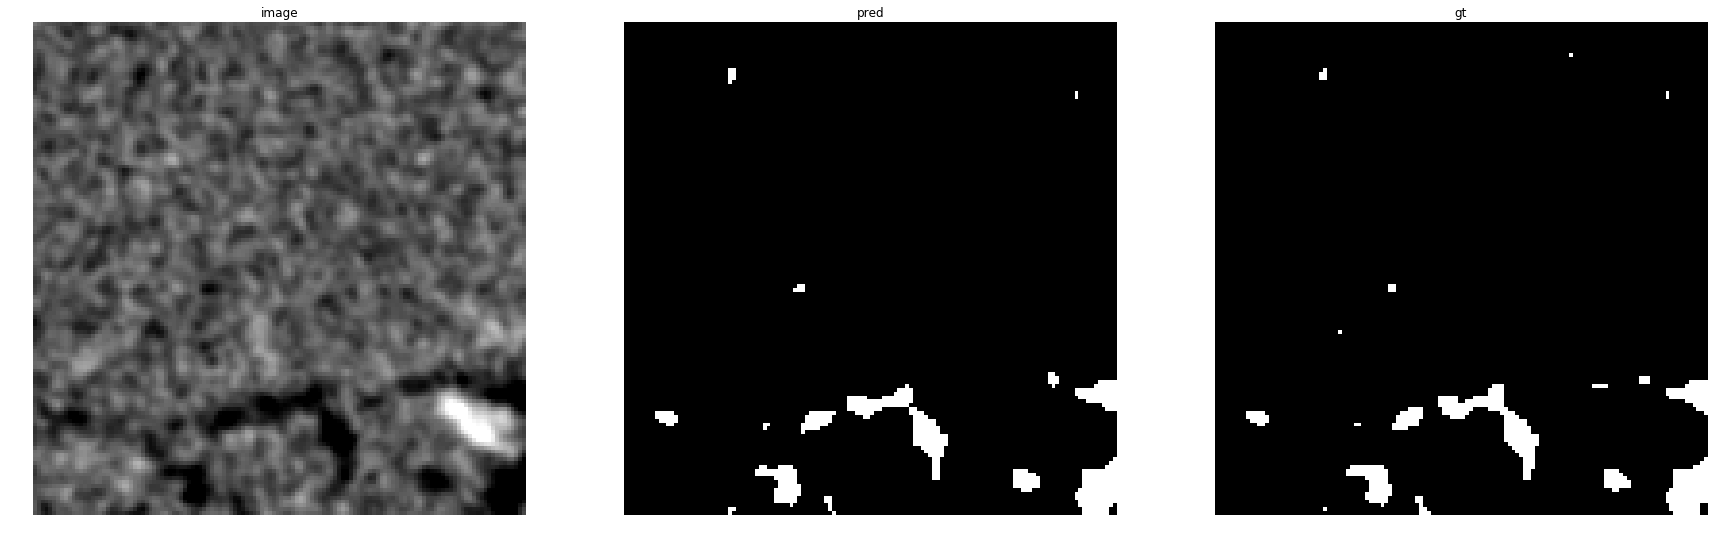

accuracy    : 0.99639892578125
precision   : 0.9509433962264151
recall      : 0.9385474860335196
f1          : 0.944704779756326
pr_auc      : 0.9906426739673638
iou         : 0.8952042628774423


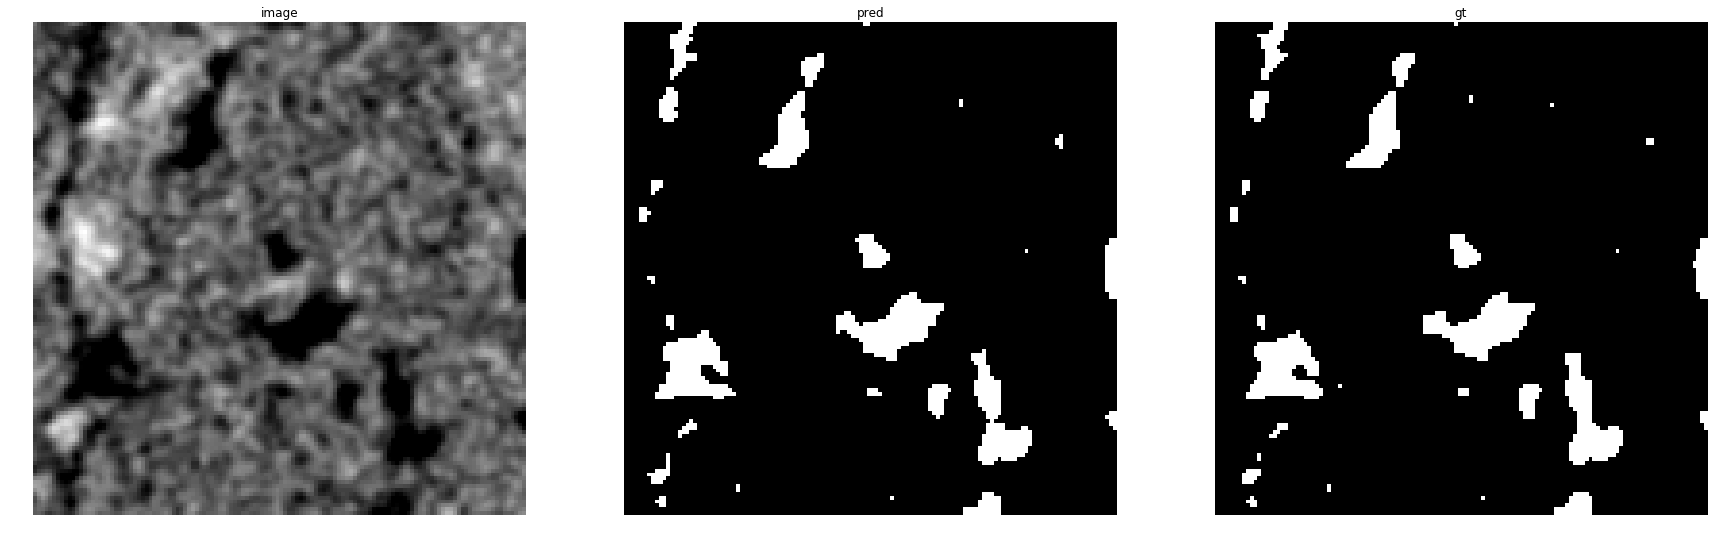

accuracy    : 0.99395751953125
precision   : 0.9624373956594324
recall      : 0.9552609776304888
f1          : 0.9588357588357589
pr_auc      : 0.9947753447303186
iou         : 0.920926517571885


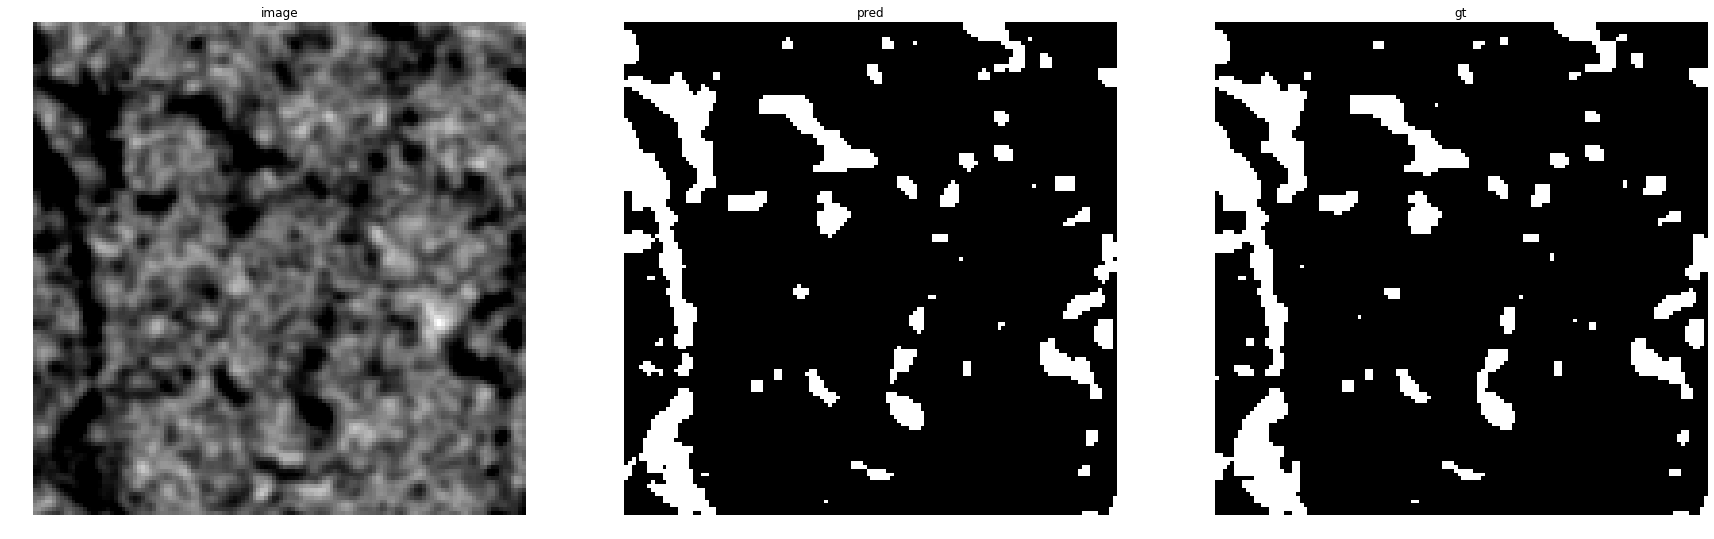

accuracy    : 0.98663330078125
precision   : 0.9760036917397323
recall      : 0.9268185801928133
f1          : 0.9507754551584625
pr_auc      : 0.9926224056010878
iou         : 0.9061696658097687


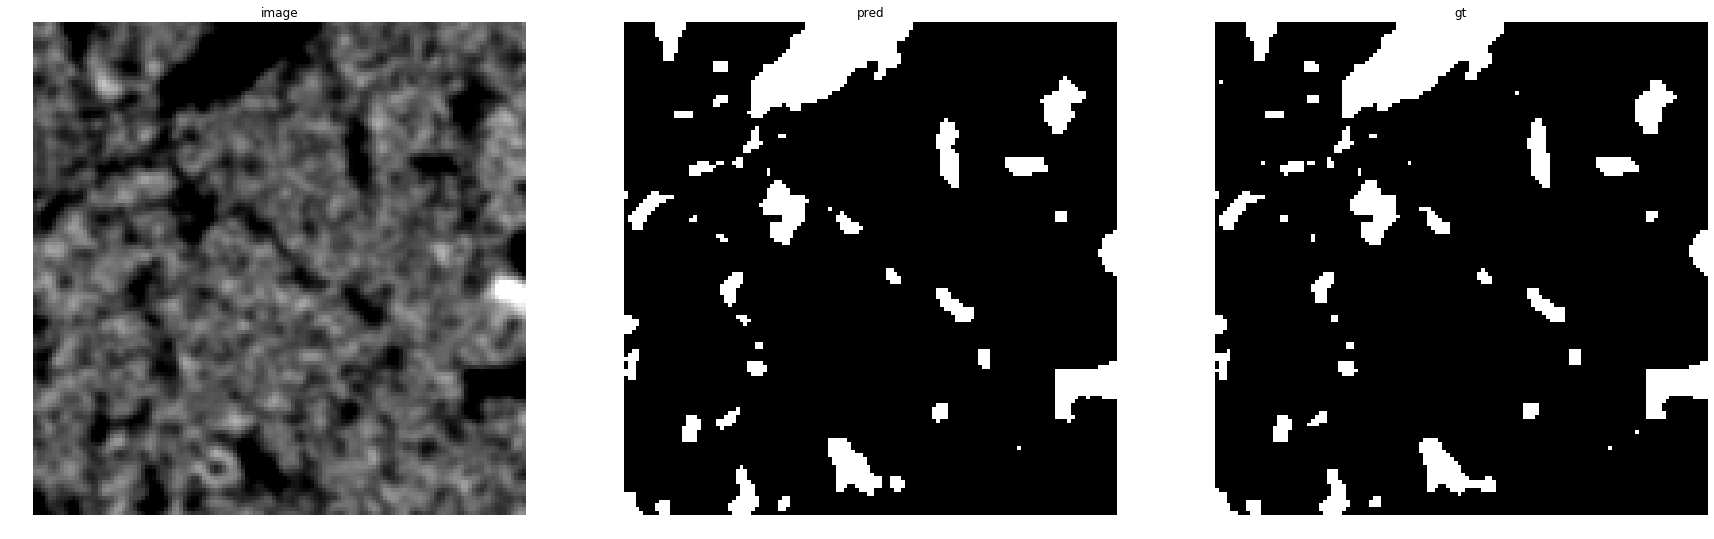

accuracy    : 0.99298095703125
precision   : 0.9618362831858407
recall      : 0.9742296918767507
f1          : 0.9679933203451155
pr_auc      : 0.9967380050502009
iou         : 0.9379719525350594


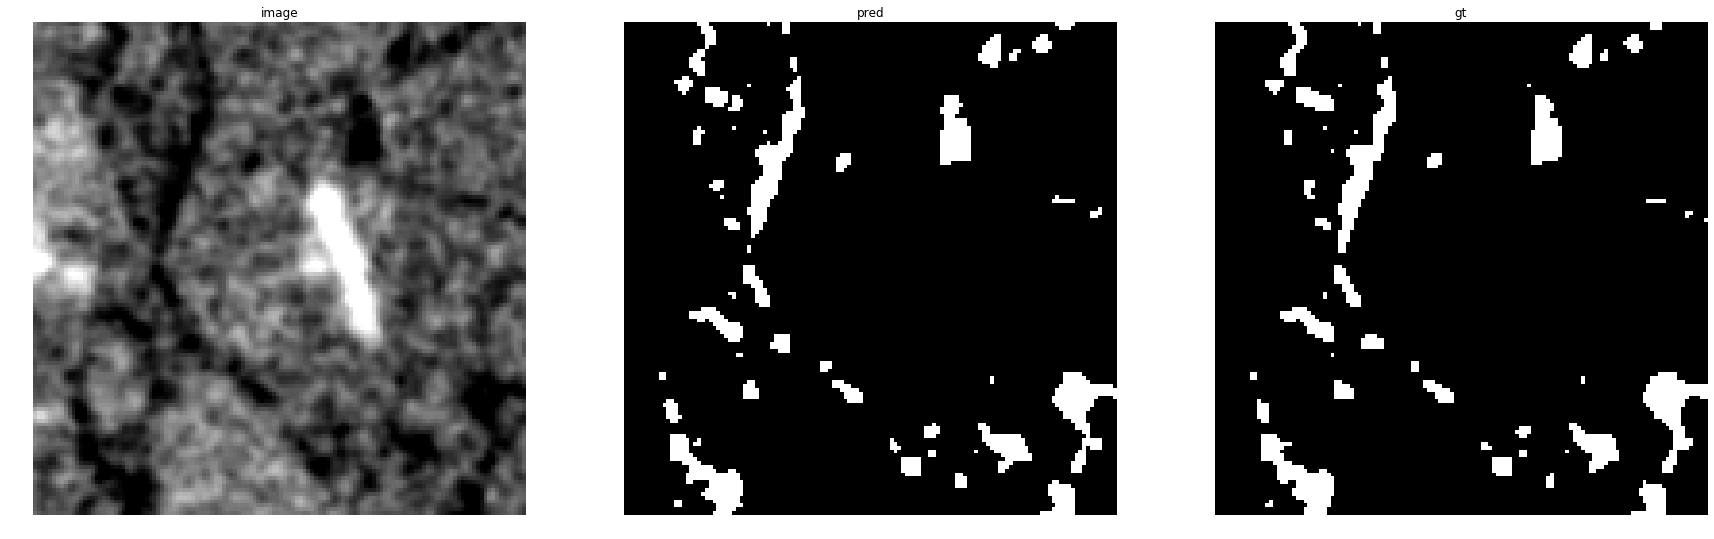

accuracy    : 0.99053955078125
precision   : 0.9463722397476341
recall      : 0.9324009324009324
f1          : 0.939334637964775
pr_auc      : 0.9895761431151544
iou         : 0.8856088560885609


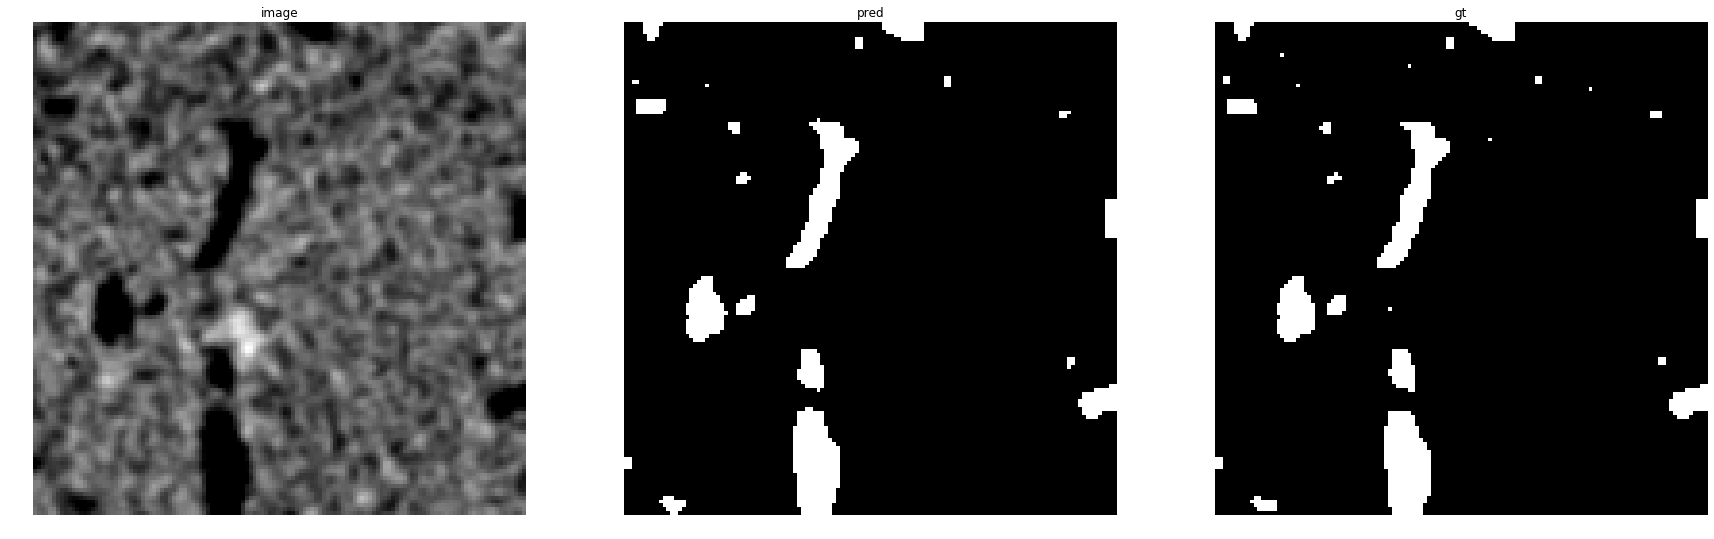

accuracy    : 0.99755859375
precision   : 0.9767676767676767
recall      : 0.9827235772357723
f1          : 0.9797365754812563
pr_auc      : 0.9983972733749046
iou         : 0.9602780536246276


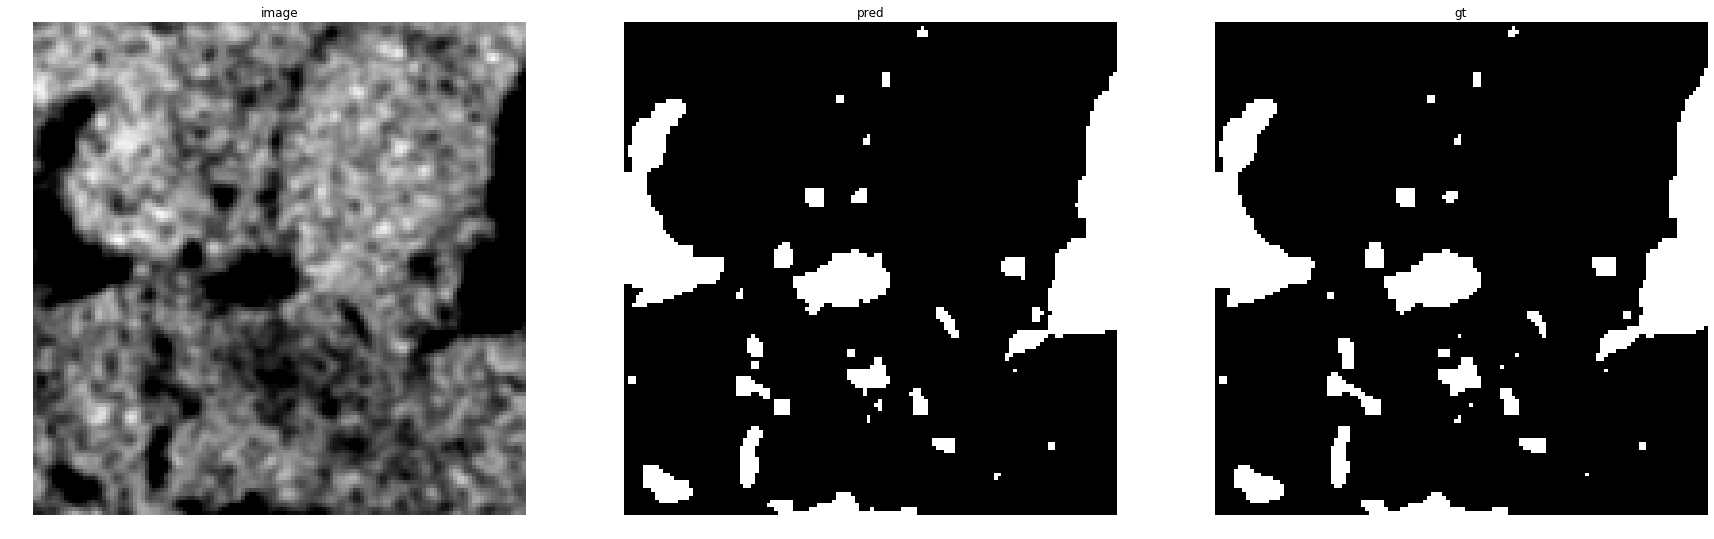

accuracy    : 0.9930419921875
precision   : 0.9770925110132158
recall      : 0.9728070175438597
f1          : 0.9749450549450549
pr_auc      : 0.9980093601465063
iou         : 0.951114922813036


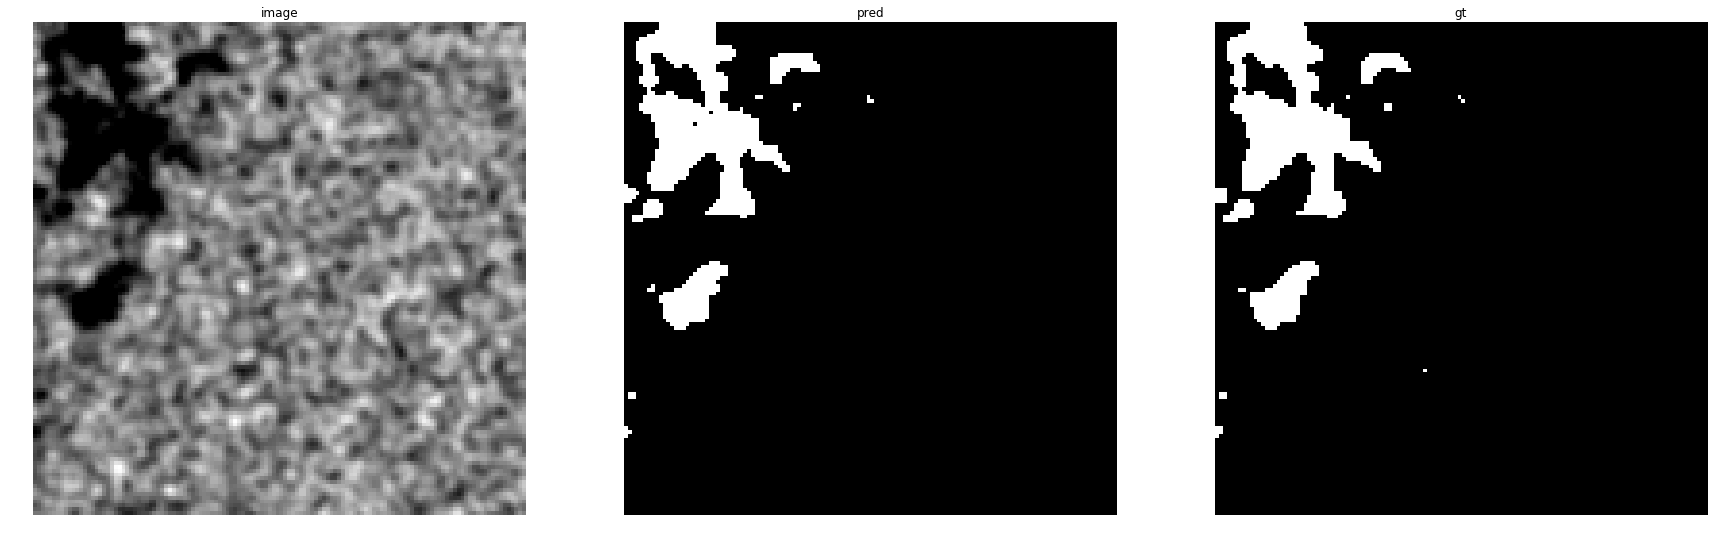

accuracy    : 0.996337890625
precision   : 0.9777777777777777
recall      : 0.972972972972973
f1          : 0.975369458128079
pr_auc      : 0.9981601744468516
iou         : 0.9519230769230769


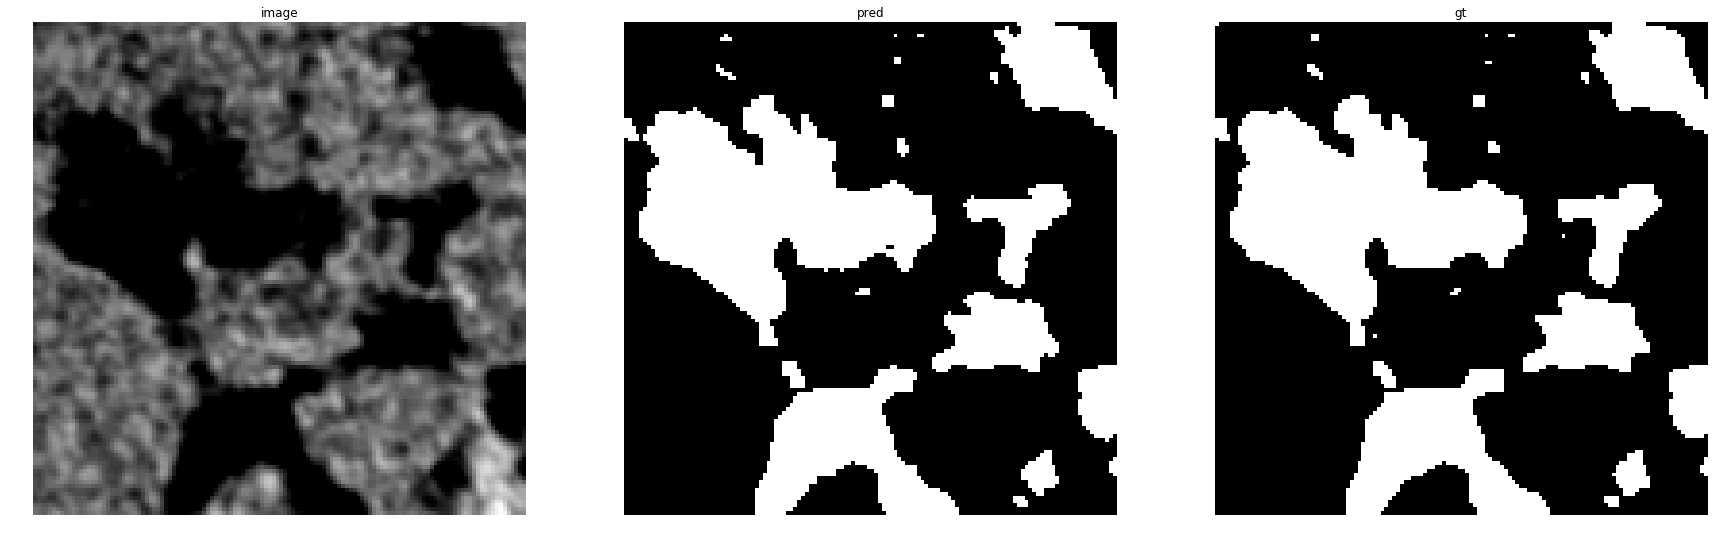

accuracy    : 0.9923095703125
precision   : 0.9869180454020777
recall      : 0.9888203546646106
f1          : 0.9878682842287694
pr_auc      : 0.9995610388609337
iou         : 0.976027397260274


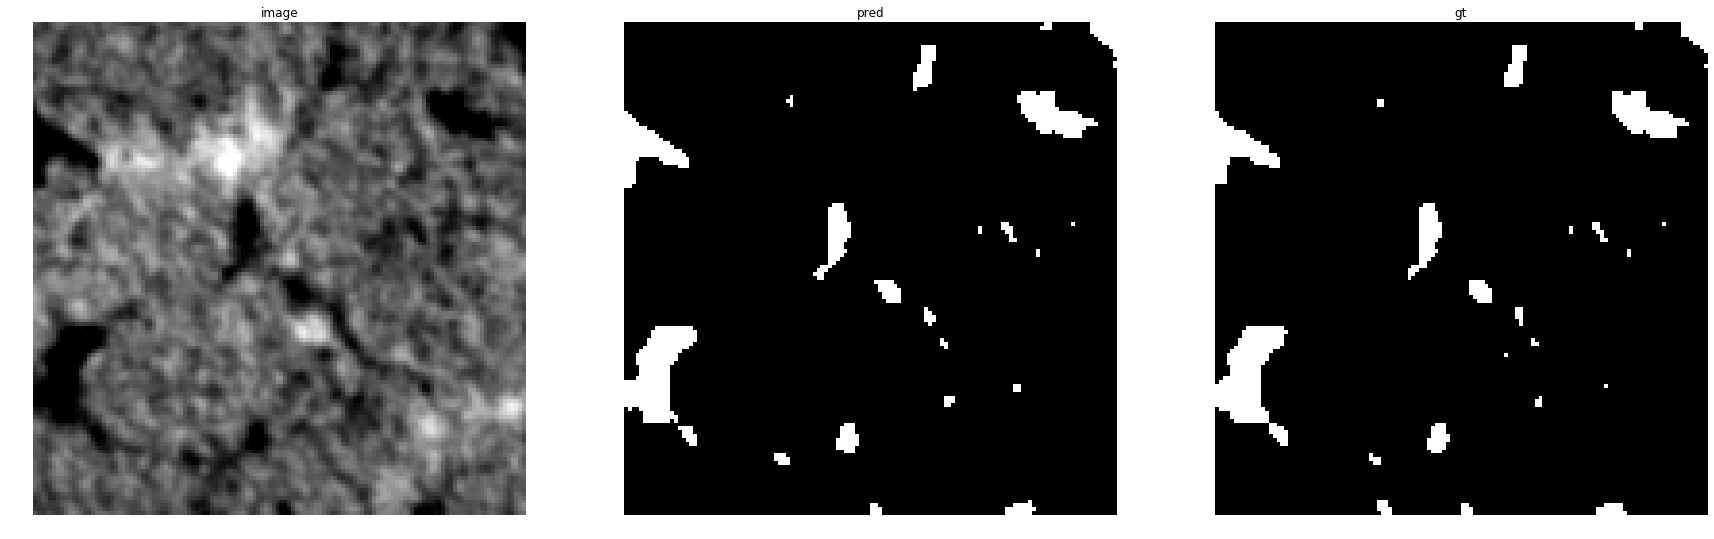

accuracy    : 0.99517822265625
precision   : 0.954954954954955
recall      : 0.9560315670800451
f1          : 0.9554929577464789
pr_auc      : 0.9940105542067071
iou         : 0.9147788565264293


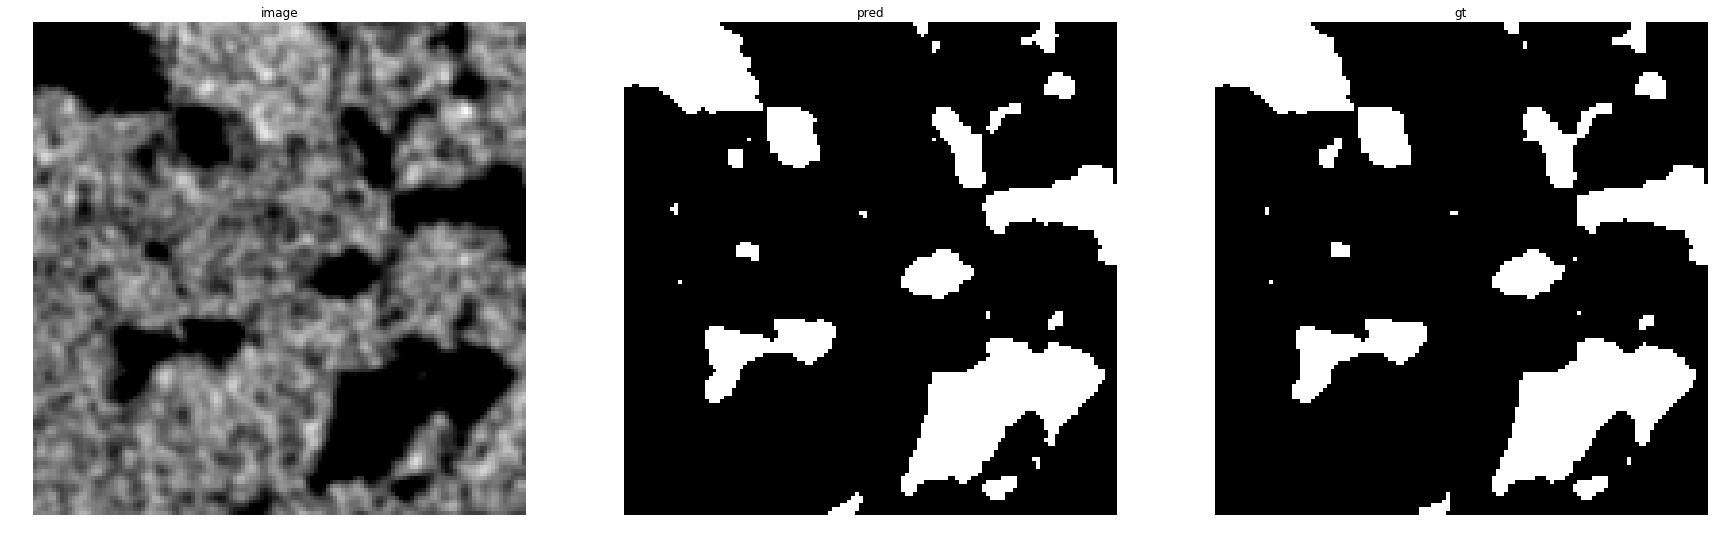

accuracy    : 0.99237060546875
precision   : 0.982487922705314
recall      : 0.9798253538090936
f1          : 0.9811548319011005
pr_auc      : 0.9988184378678306
iou         : 0.9630068067475585


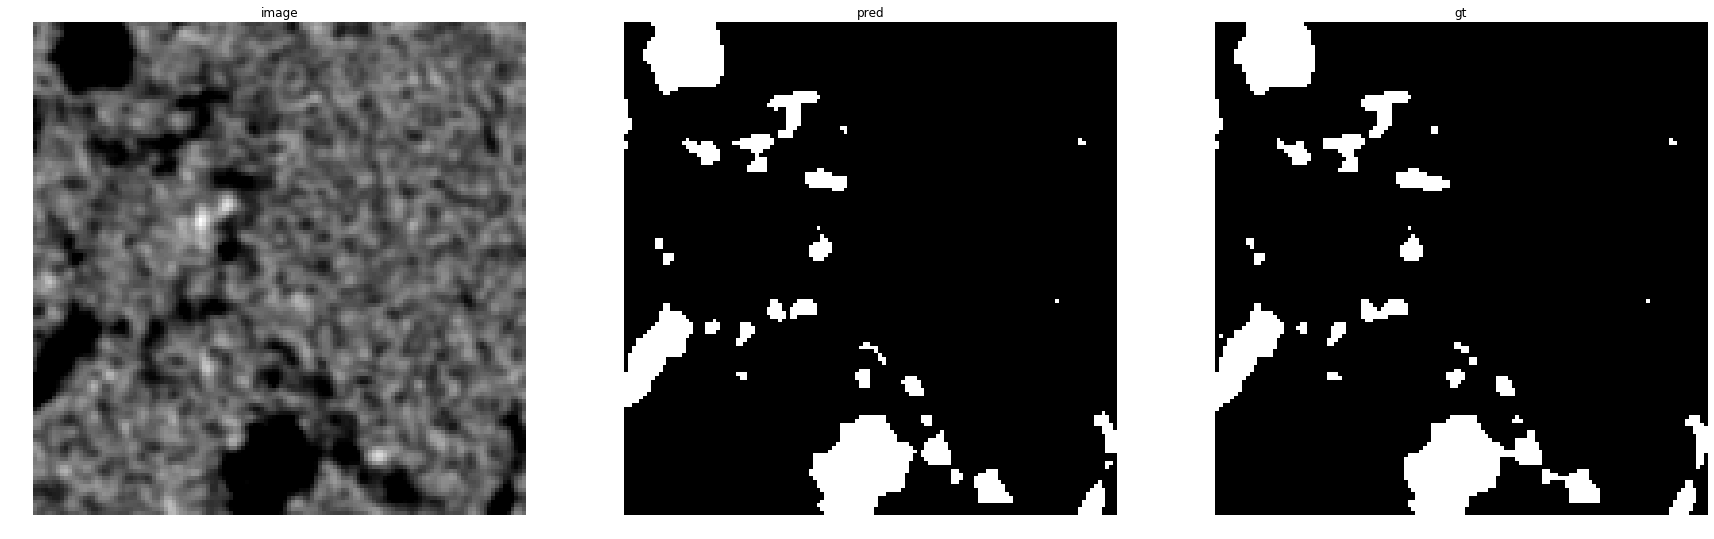

accuracy    : 0.99359130859375
precision   : 0.973170731707317
recall      : 0.9631864815932408
f1          : 0.9681528662420382
pr_auc      : 0.9961012099477734
iou         : 0.9382716049382716


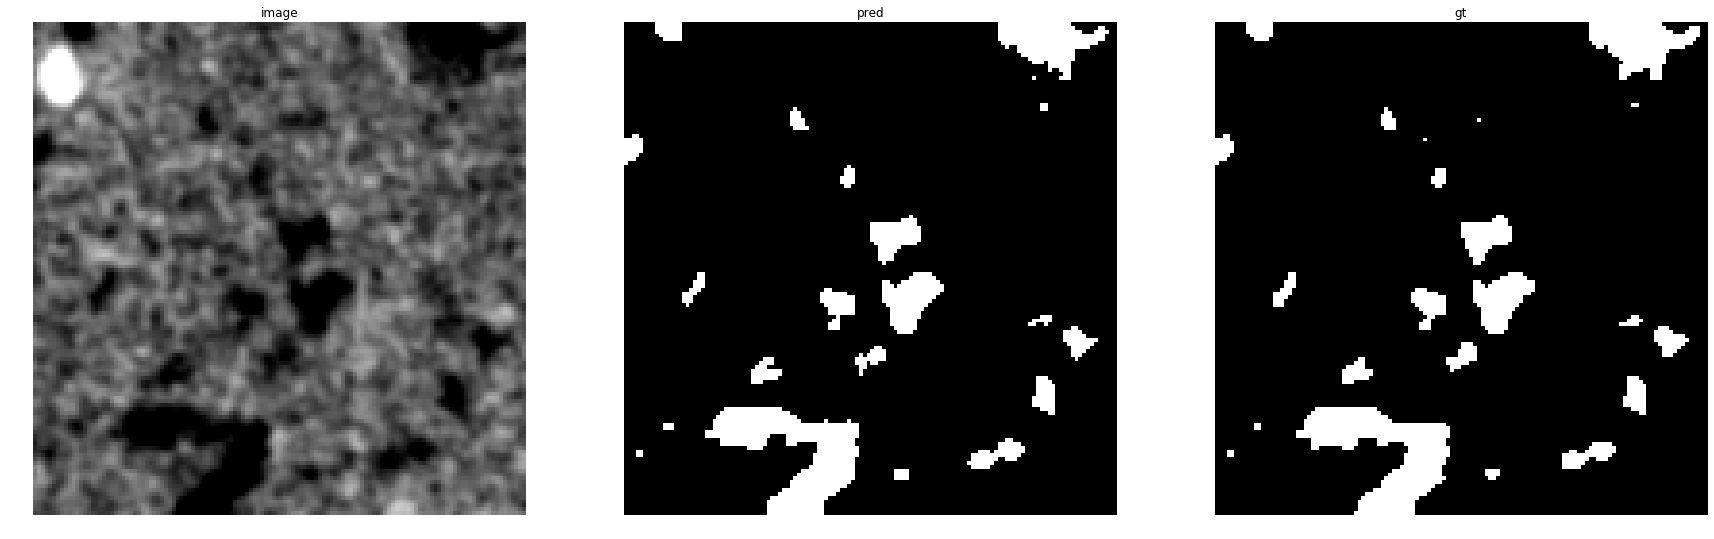

accuracy    : 0.994140625
precision   : 0.9753593429158111
recall      : 0.9595959595959596
f1          : 0.9674134419551934
pr_auc      : 0.9962149364996387
iou         : 0.9368836291913215


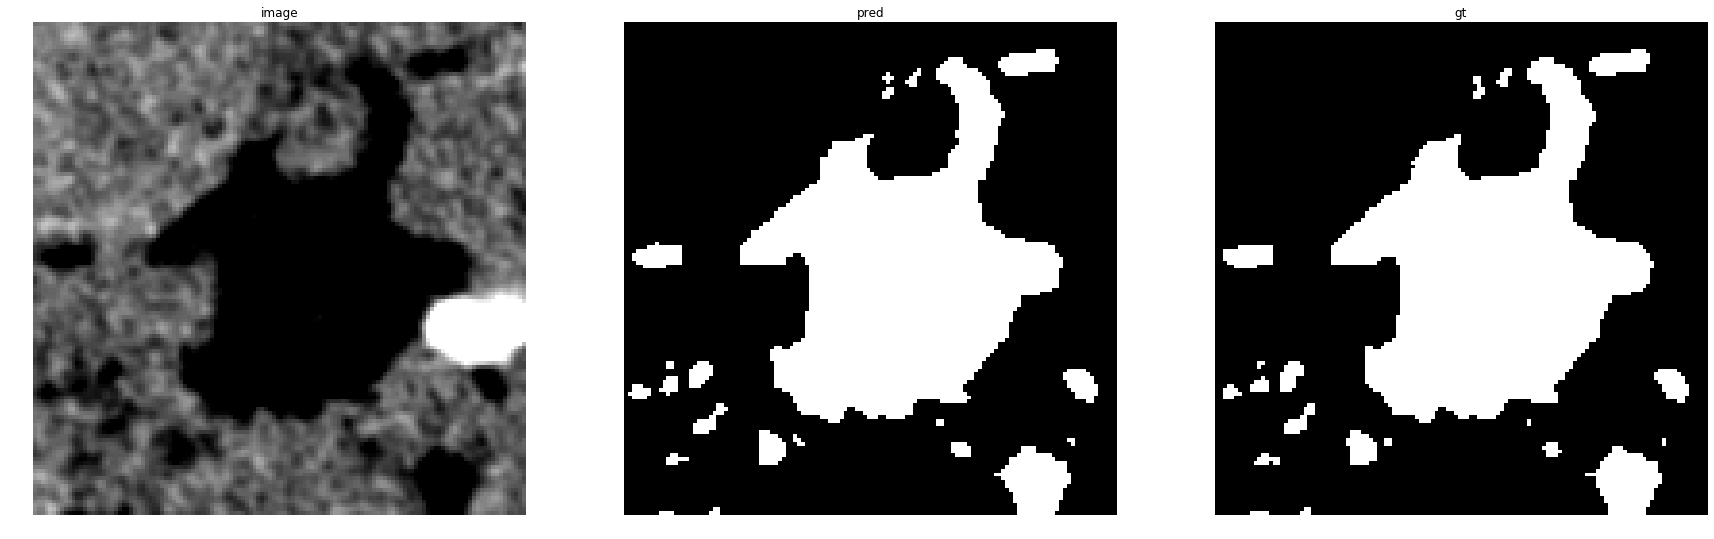

accuracy    : 0.99468994140625
precision   : 0.9883950076636742
recall      : 0.9925241864555848
f1          : 0.9904552934722983
pr_auc      : 0.9997092784980712
iou         : 0.9810910671593132


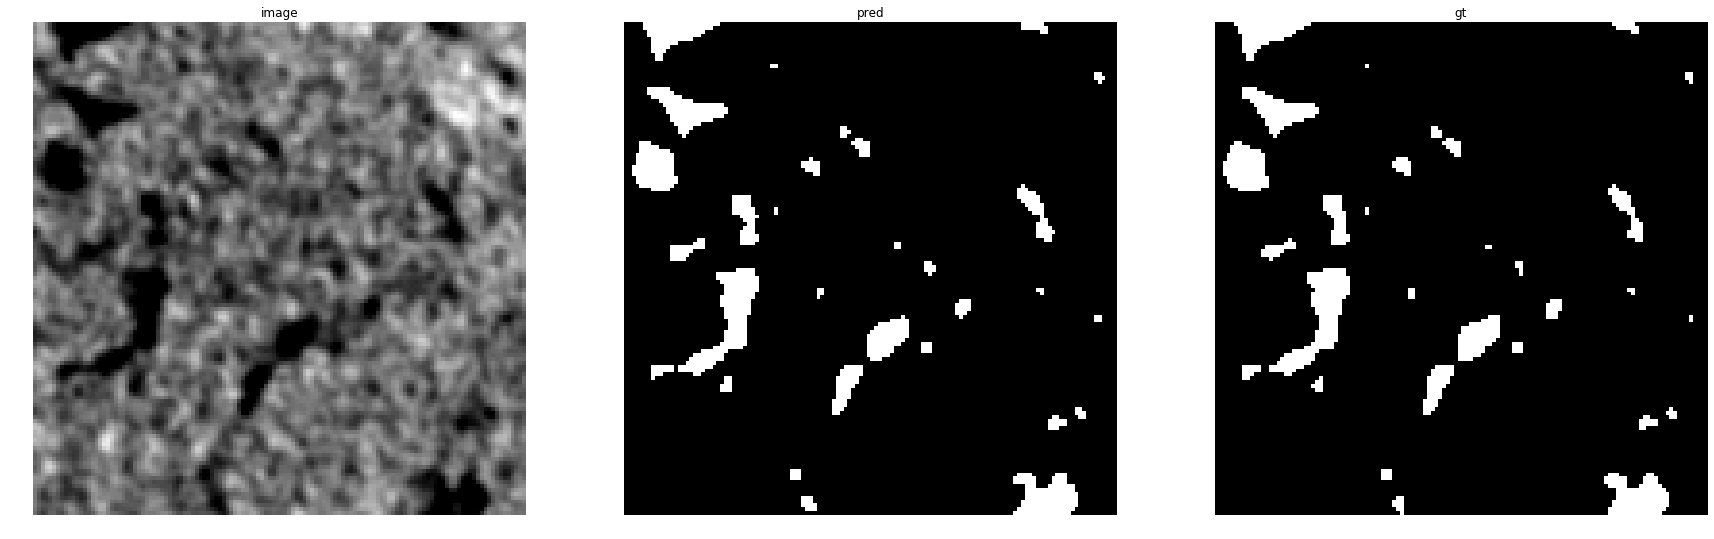

accuracy    : 0.99560546875
precision   : 0.958916083916084
recall      : 0.9777183600713012
f1          : 0.968225948808473
pr_auc      : 0.9968060196775551
iou         : 0.9384088964927289


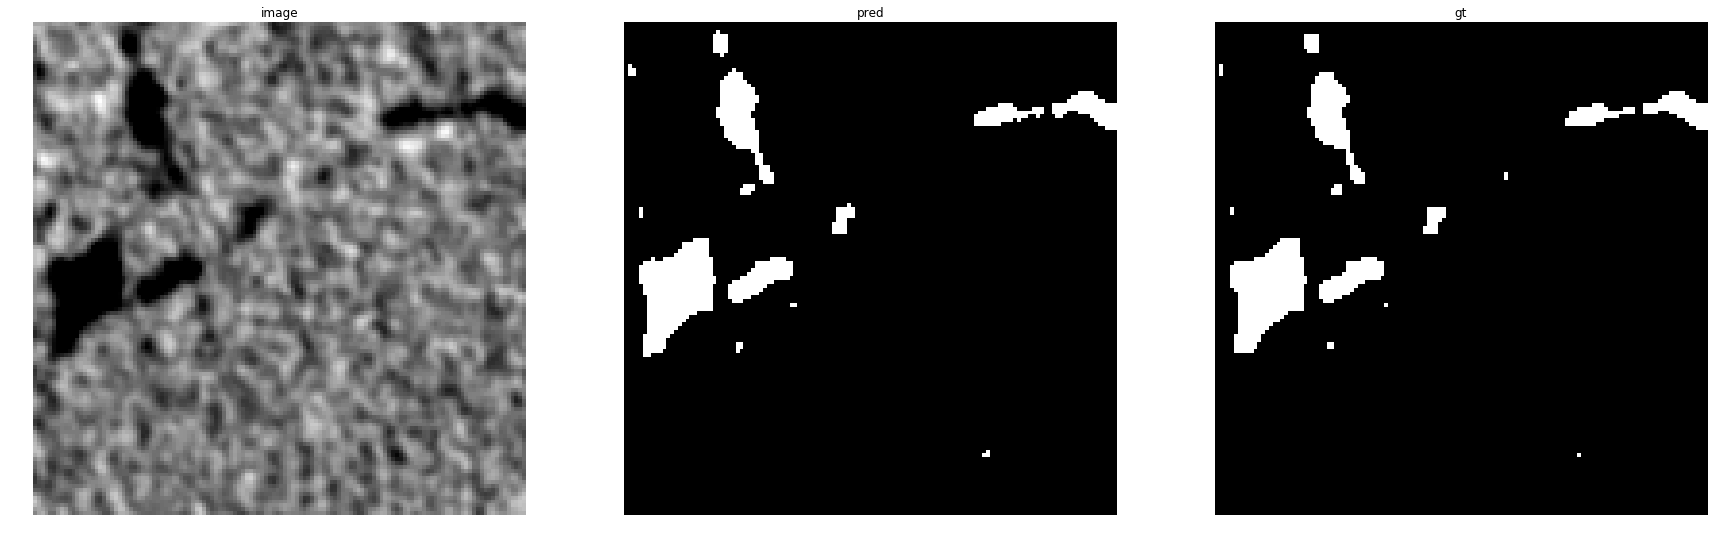

accuracy    : 0.997314453125
precision   : 0.9626783754116356
recall      : 0.9887260428410372
f1          : 0.9755283648498332
pr_auc      : 0.9988668785169915
iou         : 0.9522258414766558


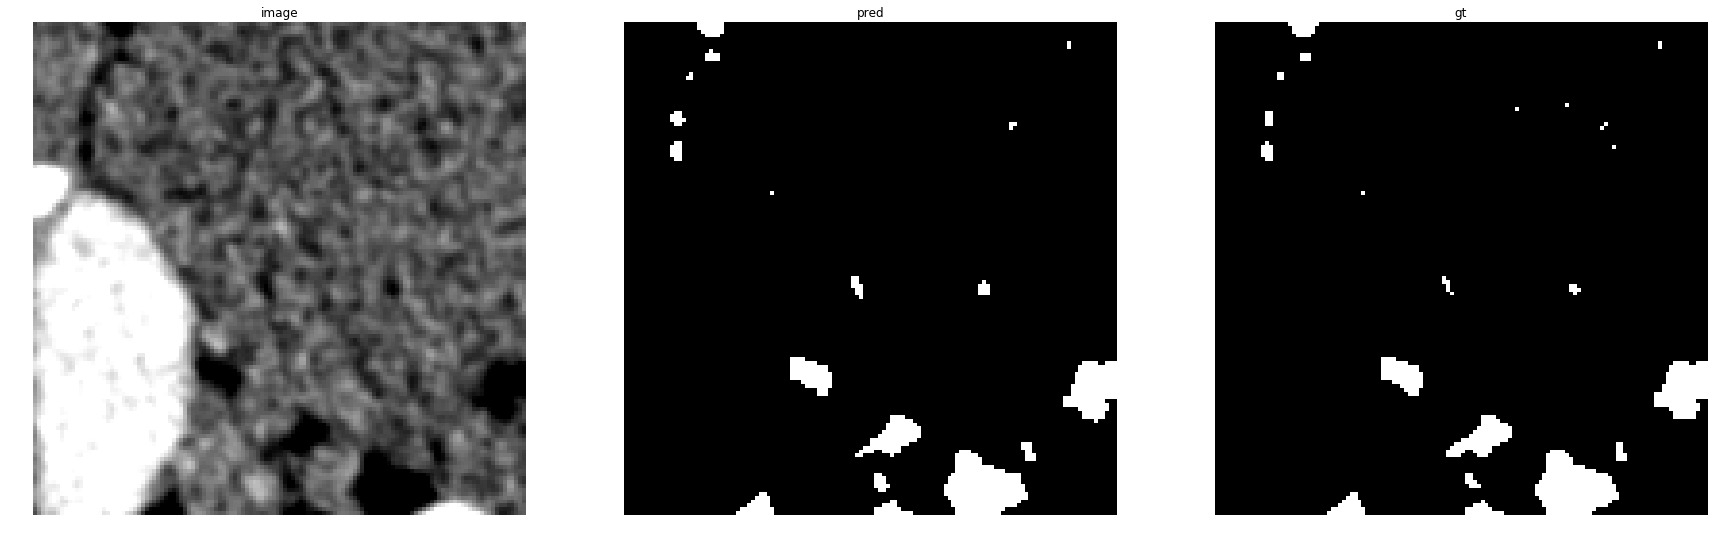

accuracy    : 0.9969482421875
precision   : 0.9555256064690026
recall      : 0.9765840220385675
f1          : 0.9659400544959128
pr_auc      : 0.9964488527868054
iou         : 0.9341238471673254


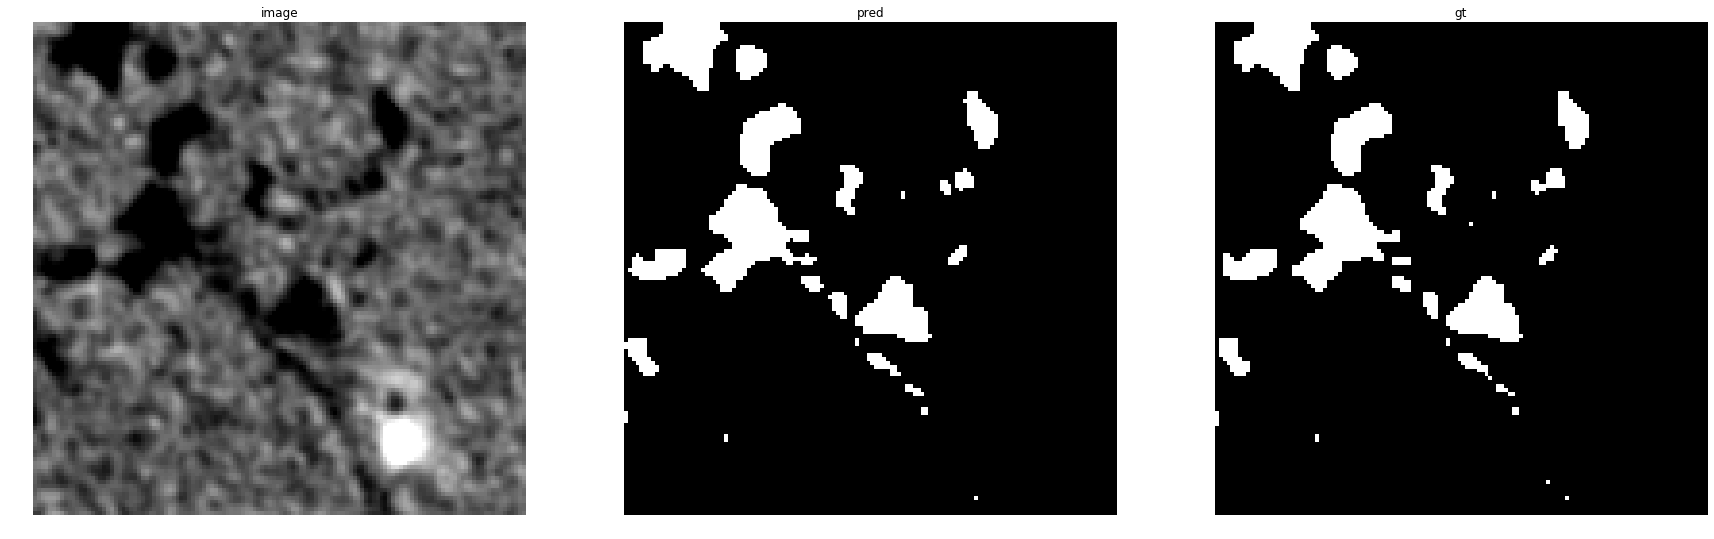

accuracy    : 0.9949951171875
precision   : 0.9650537634408602
recall      : 0.9795361527967258
f1          : 0.9722410291130671
pr_auc      : 0.997762018462311
iou         : 0.9459815546772069


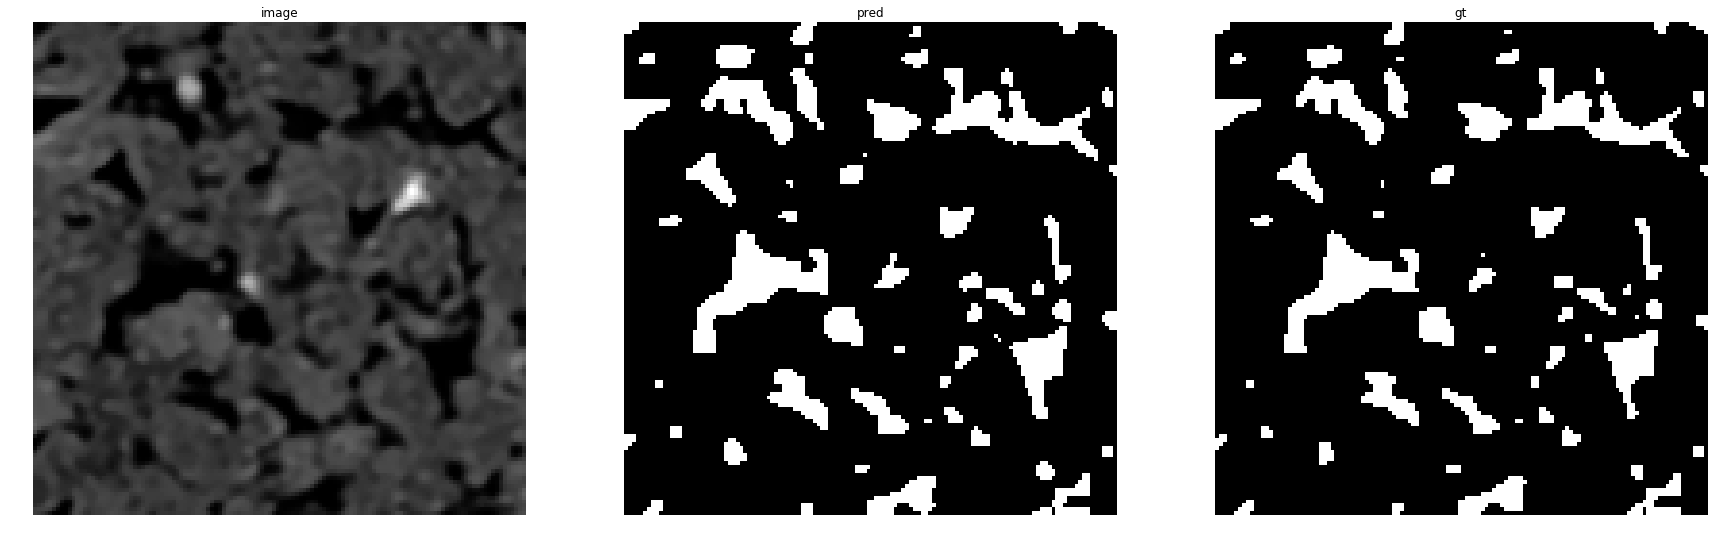

accuracy    : 0.98126220703125
precision   : 0.8803521408563425
recall      : 0.9963768115942029
f1          : 0.9347779902273209
pr_auc      : 0.9968228148326497
iou         : 0.8775428799361787


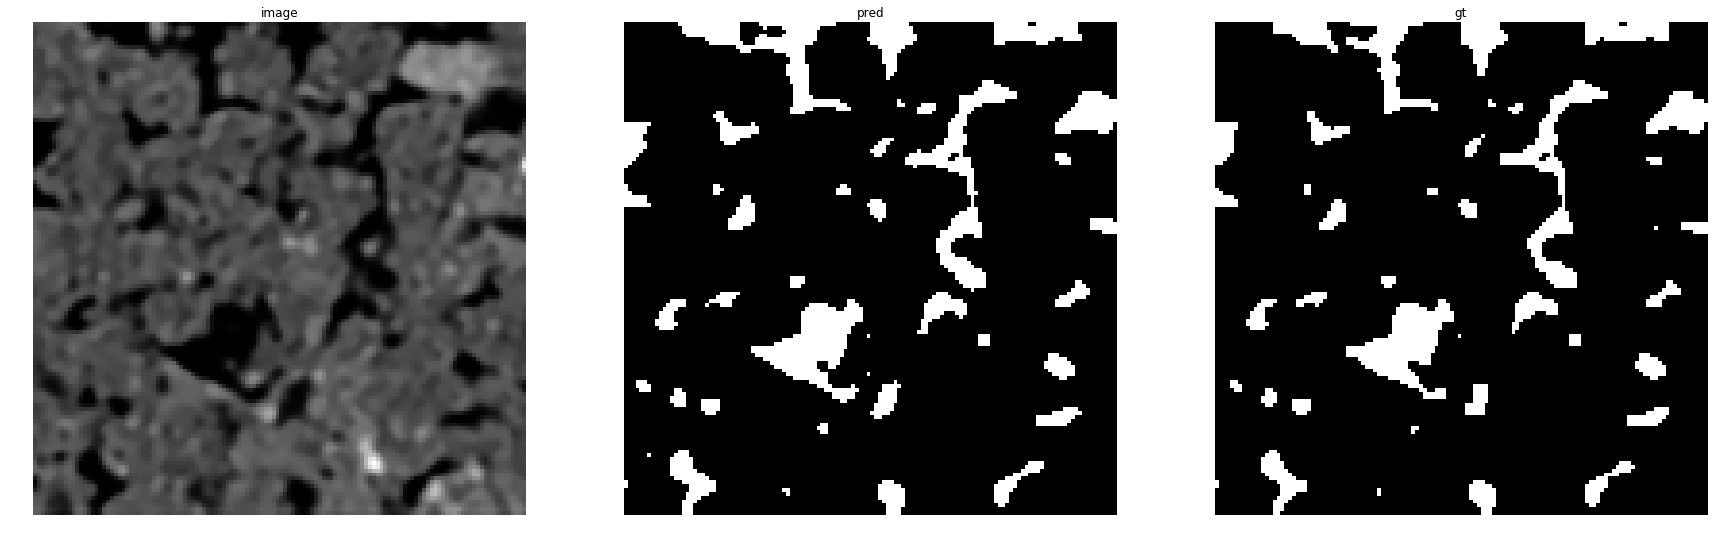

accuracy    : 0.9876708984375
precision   : 0.9077647058823529
recall      : 0.9968992248062015
f1          : 0.9502463054187192
pr_auc      : 0.9970079917079827
iou         : 0.9052088221492257


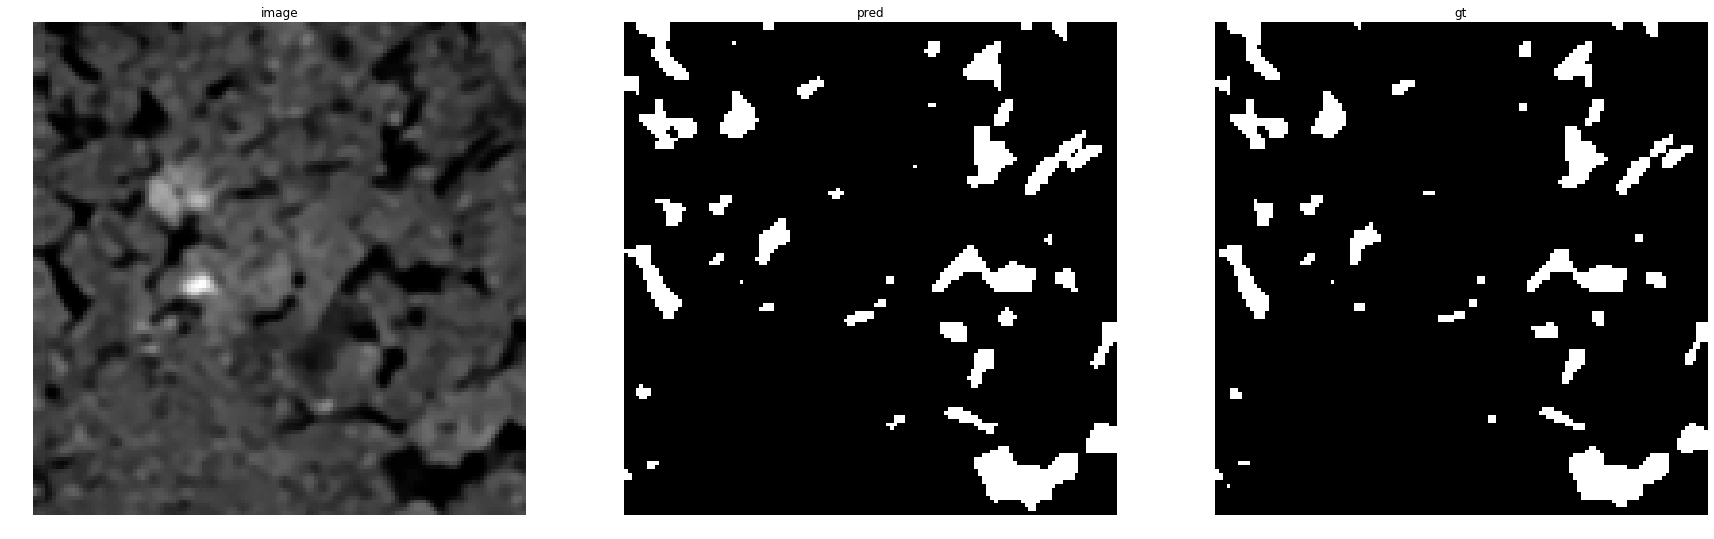

accuracy    : 0.9866943359375
precision   : 0.8672622846202935
recall      : 0.9926953981008035
f1          : 0.9257493188010899
pr_auc      : 0.9945519494723813
iou         : 0.8617628408370324


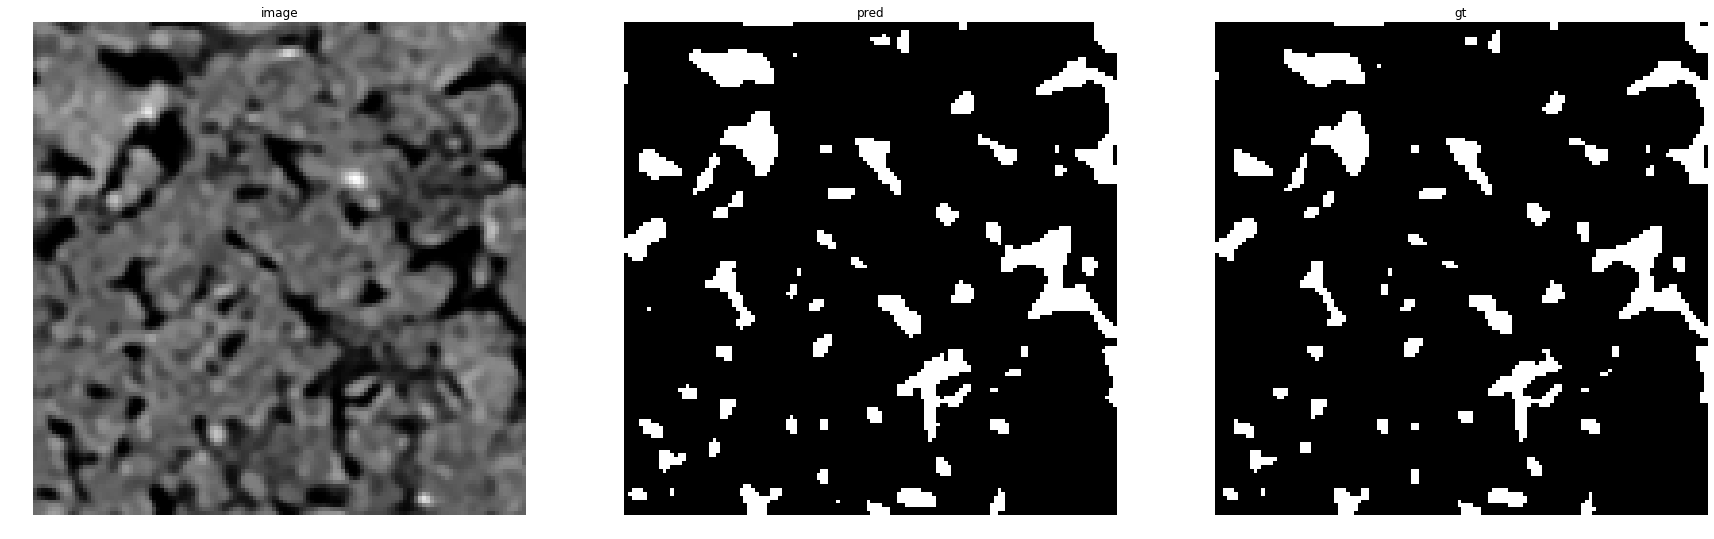

accuracy    : 0.98406982421875
precision   : 0.8756121449559255
recall      : 0.996100278551532
f1          : 0.9319781078967944
pr_auc      : 0.9951988722621824
iou         : 0.8726207906295754


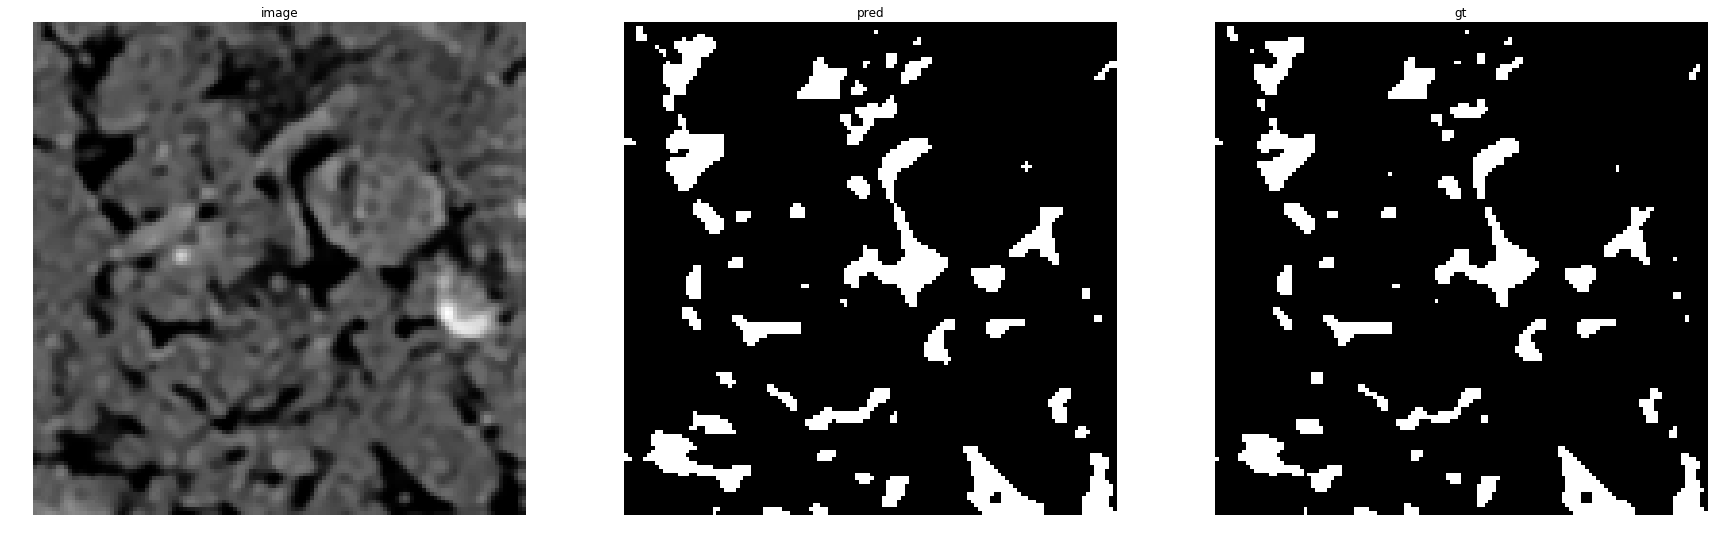

accuracy    : 0.9818115234375
precision   : 0.8572122389509471
recall      : 0.9977388355002826
f1          : 0.9221525600835945
pr_auc      : 0.9953392625735162
iou         : 0.855550169655841


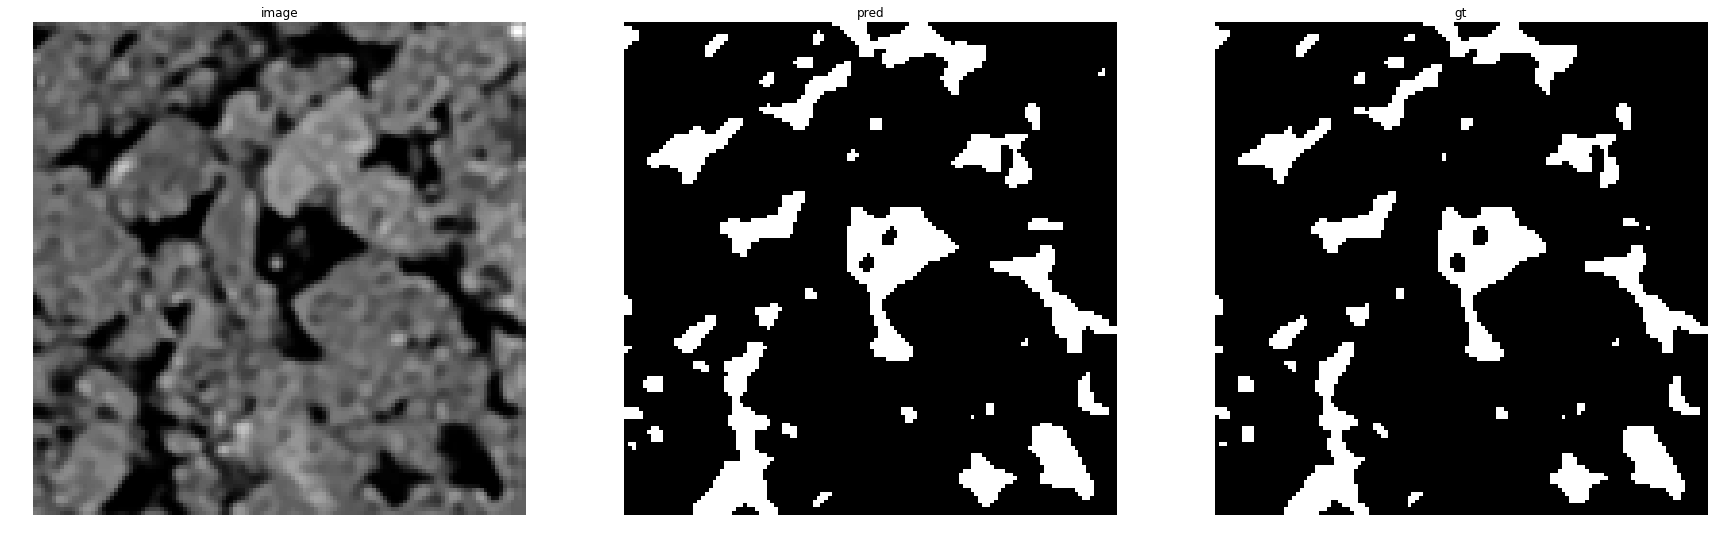

accuracy    : 0.98260498046875
precision   : 0.8957486136783733
recall      : 0.9987633965375103
f1          : 0.9444552718768271
pr_auc      : 0.9979221065528352
iou         : 0.8947562776957164


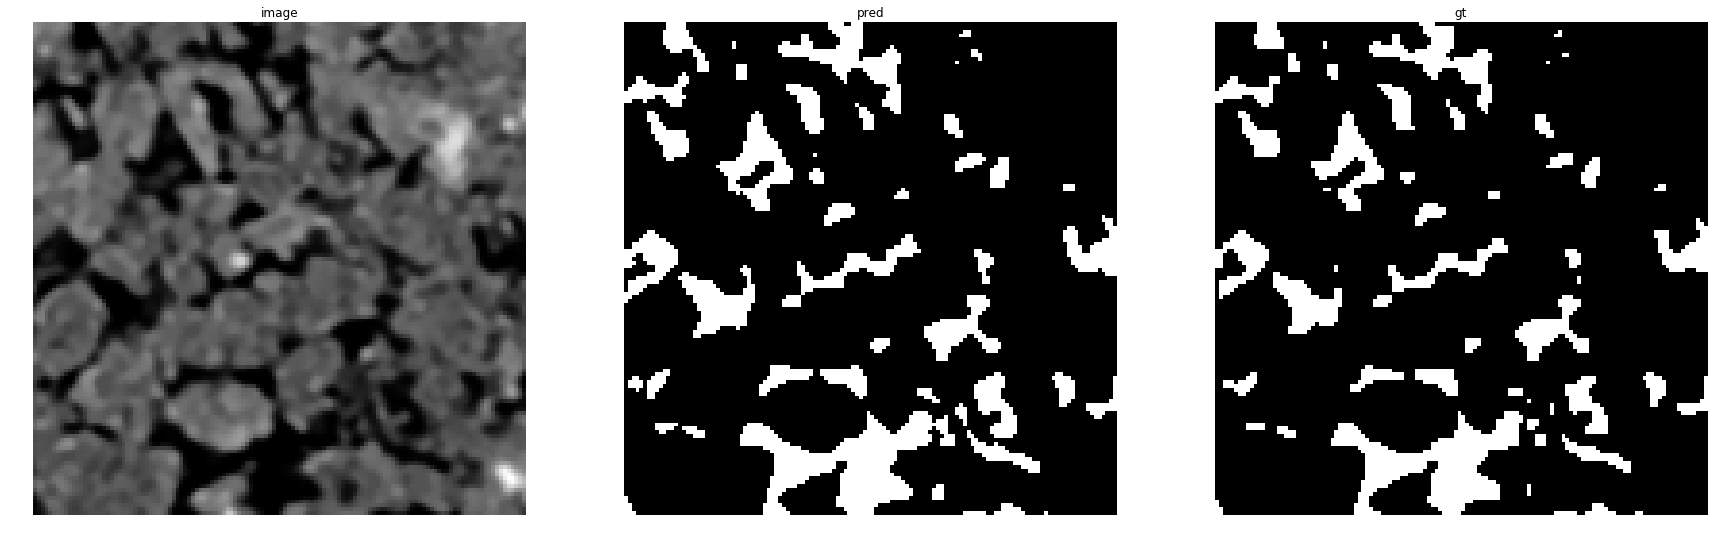

accuracy    : 0.97906494140625
precision   : 0.8805436337625179
recall      : 0.9963577498988264
f1          : 0.9348775393962407
pr_auc      : 0.9964334230251868
iou         : 0.8777183600713012


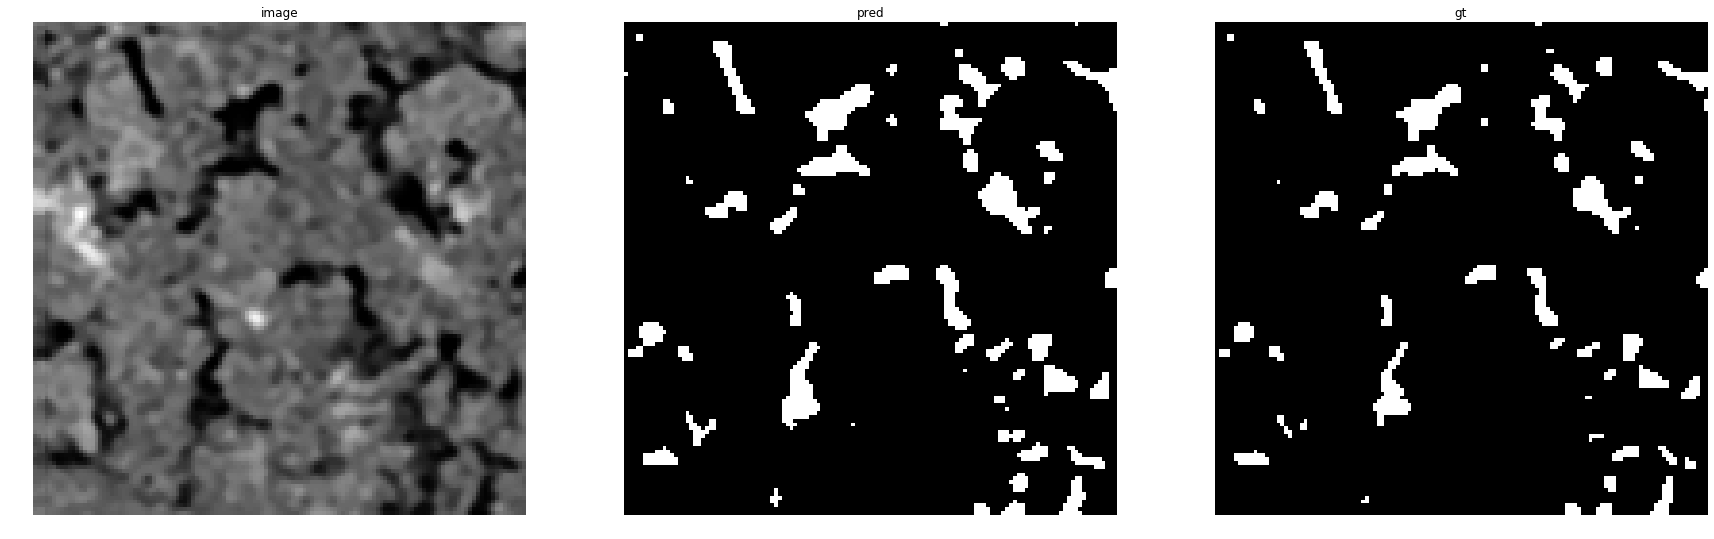

accuracy    : 0.98040771484375
precision   : 0.7796143250688705
recall      : 0.999117387466902
f1          : 0.8758220502901353
pr_auc      : 0.992578693996601
iou         : 0.779077770130764


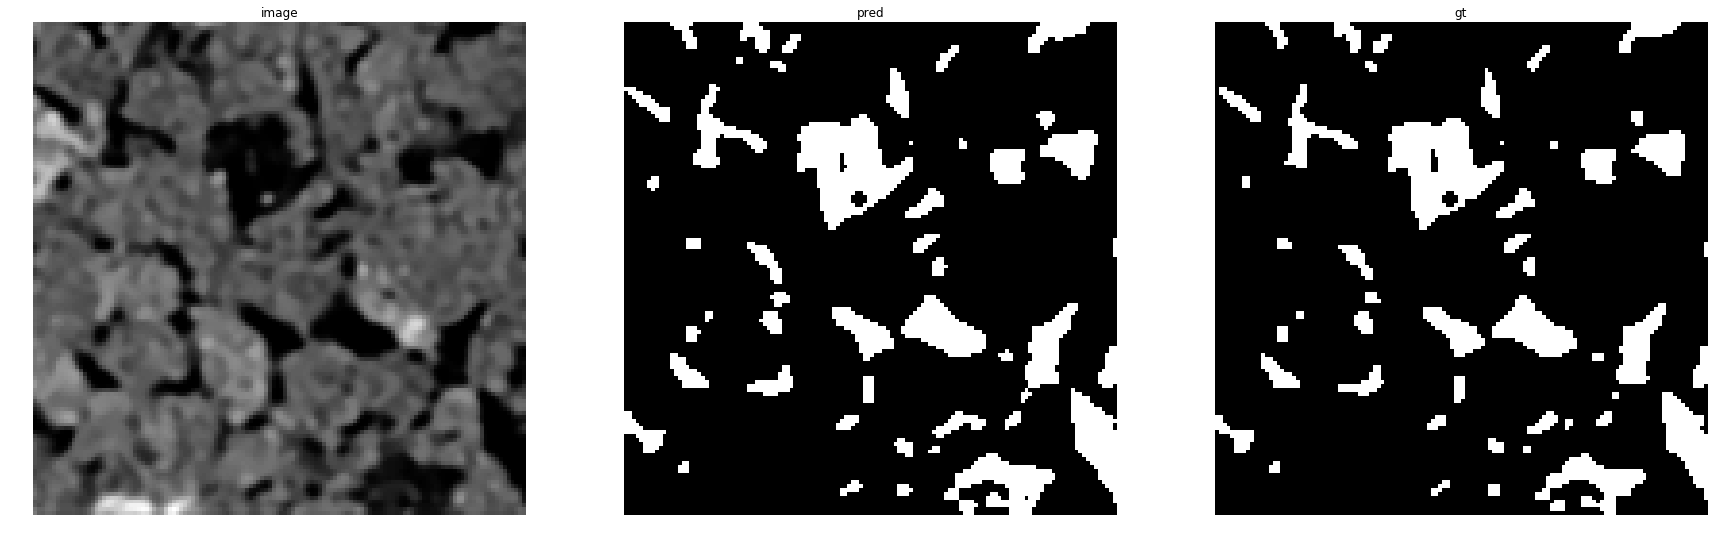

accuracy    : 0.98370361328125
precision   : 0.8962005483744614
recall      : 0.9991266375545852
f1          : 0.9448688829238076
pr_auc      : 0.9977849345831804
iou         : 0.8954990215264188


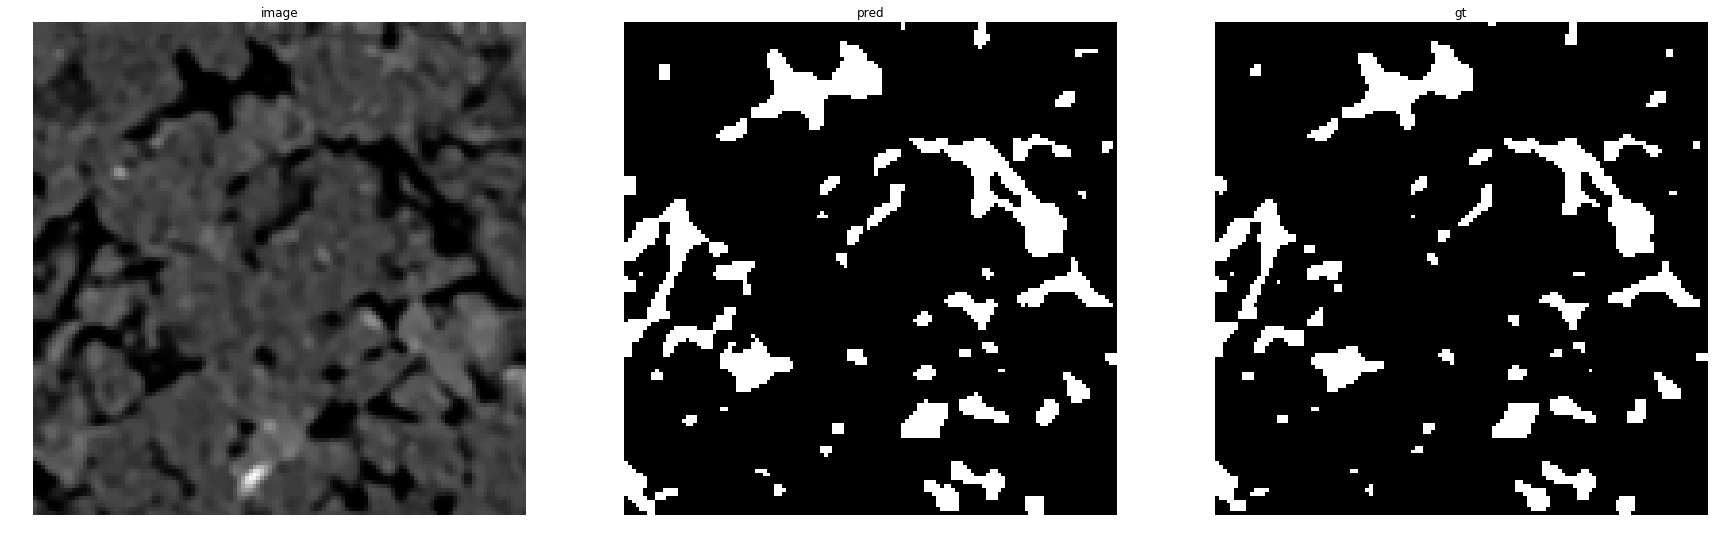

accuracy    : 0.97955322265625
precision   : 0.8542669584245076
recall      : 0.9989764585465711
f1          : 0.9209719273413541
pr_auc      : 0.9975232531276234
iou         : 0.8535198950590293


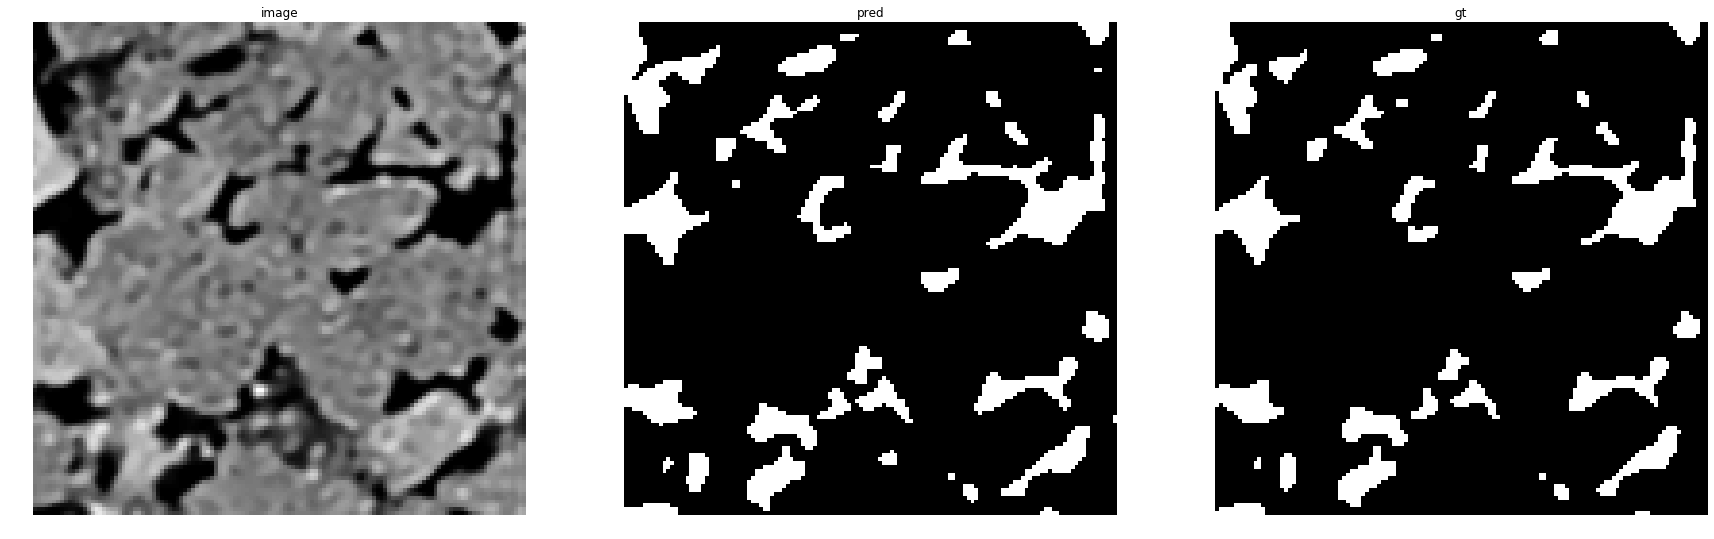

accuracy    : 0.9803466796875
precision   : 0.8681948424068768
recall      : 1.0
f1          : 0.9294478527607363
pr_auc      : 0.9962722984922296
iou         : 0.8681948424068768


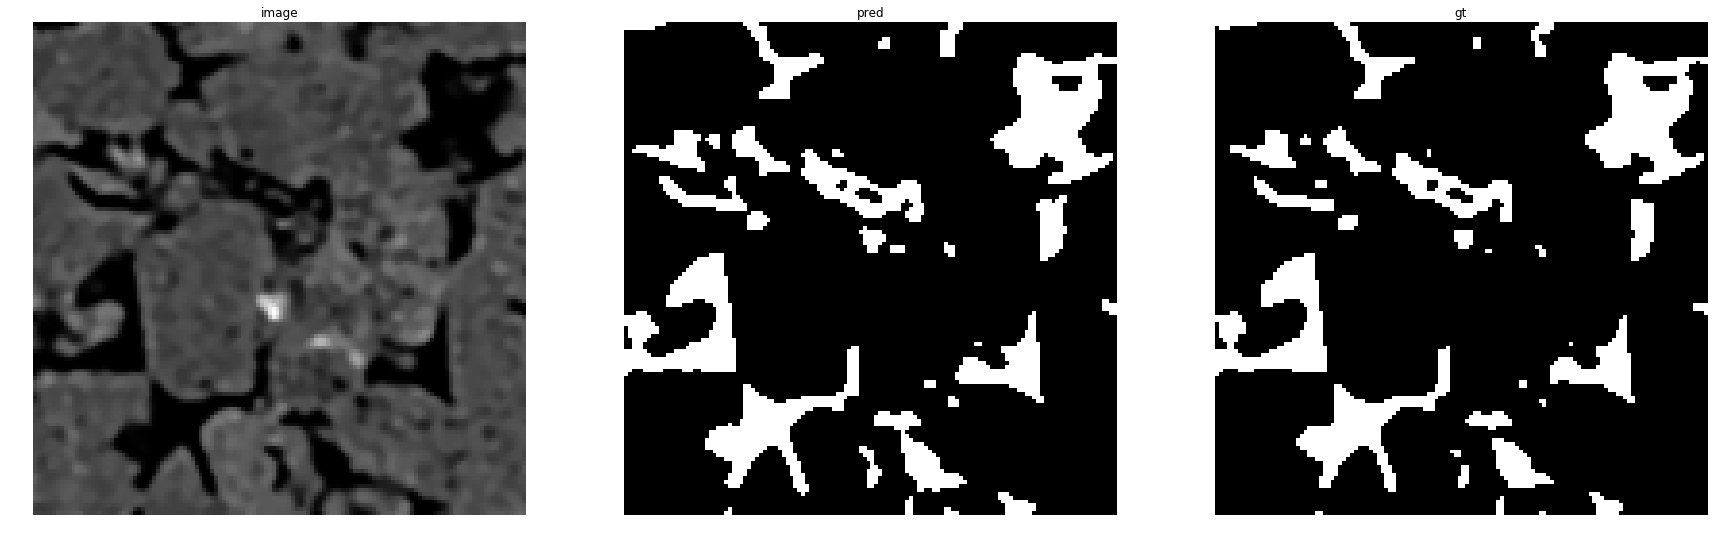

accuracy    : 0.98419189453125
precision   : 0.9107703032415476
recall      : 0.9988532110091743
f1          : 0.9527803099361897
pr_auc      : 0.9981478894405609
iou         : 0.9098189415041783


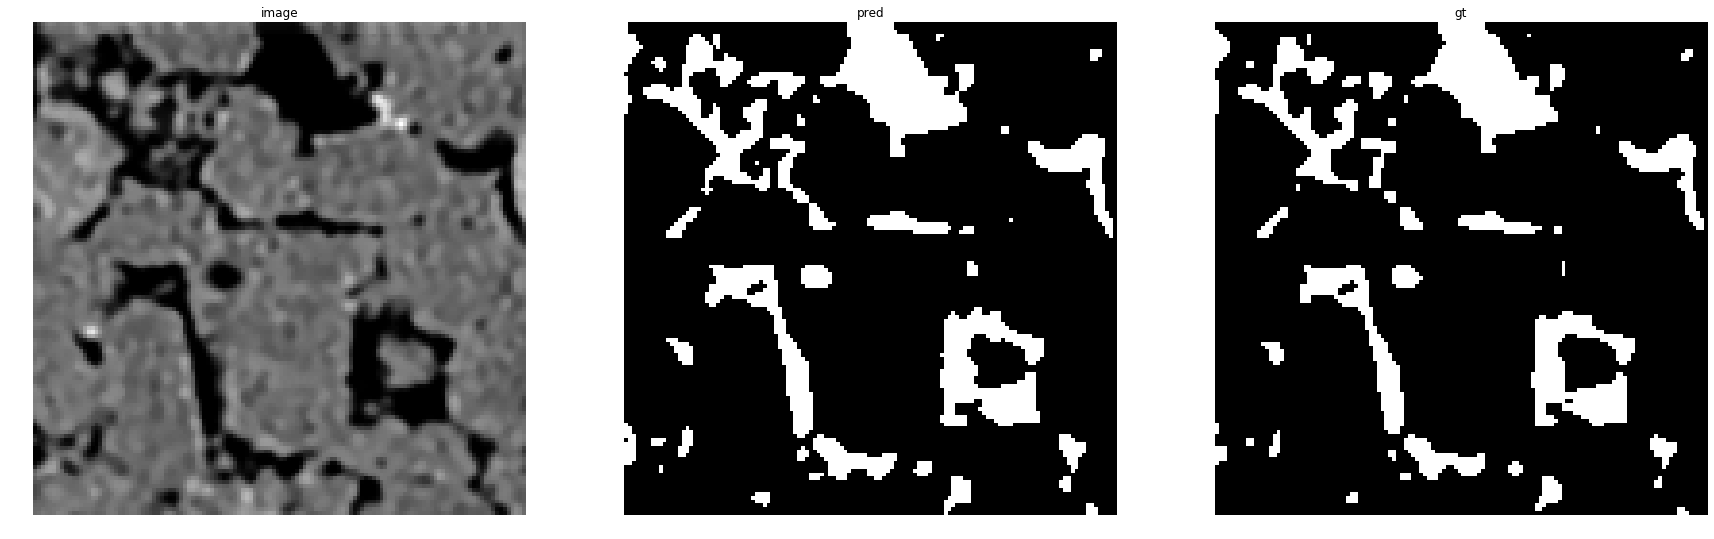

accuracy    : 0.98065185546875
precision   : 0.8889679715302491
recall      : 0.9980023971234518
f1          : 0.940335027291549
pr_auc      : 0.996545199944592
iou         : 0.8873889875666074


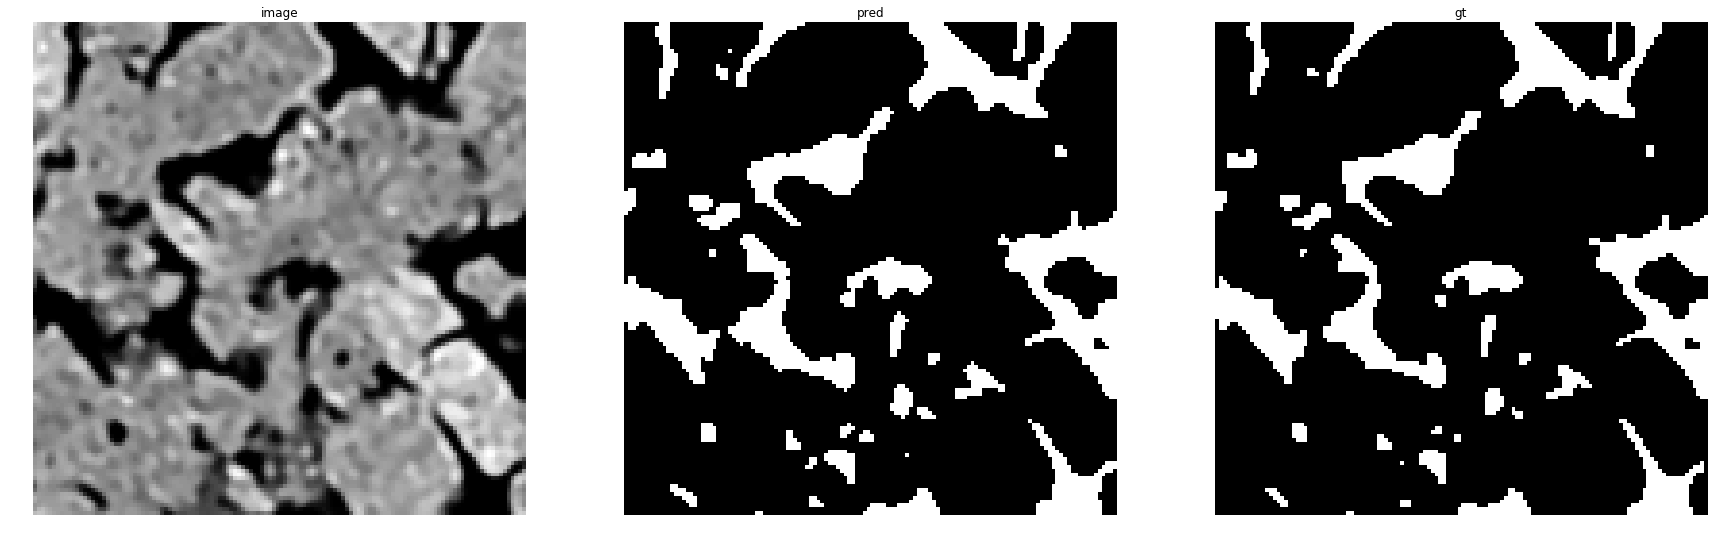

accuracy    : 0.9832763671875
precision   : 0.9132099553286535
recall      : 0.9993016759776536
f1          : 0.9543181060353452
pr_auc      : 0.9982845702235359
iou         : 0.9126275510204082


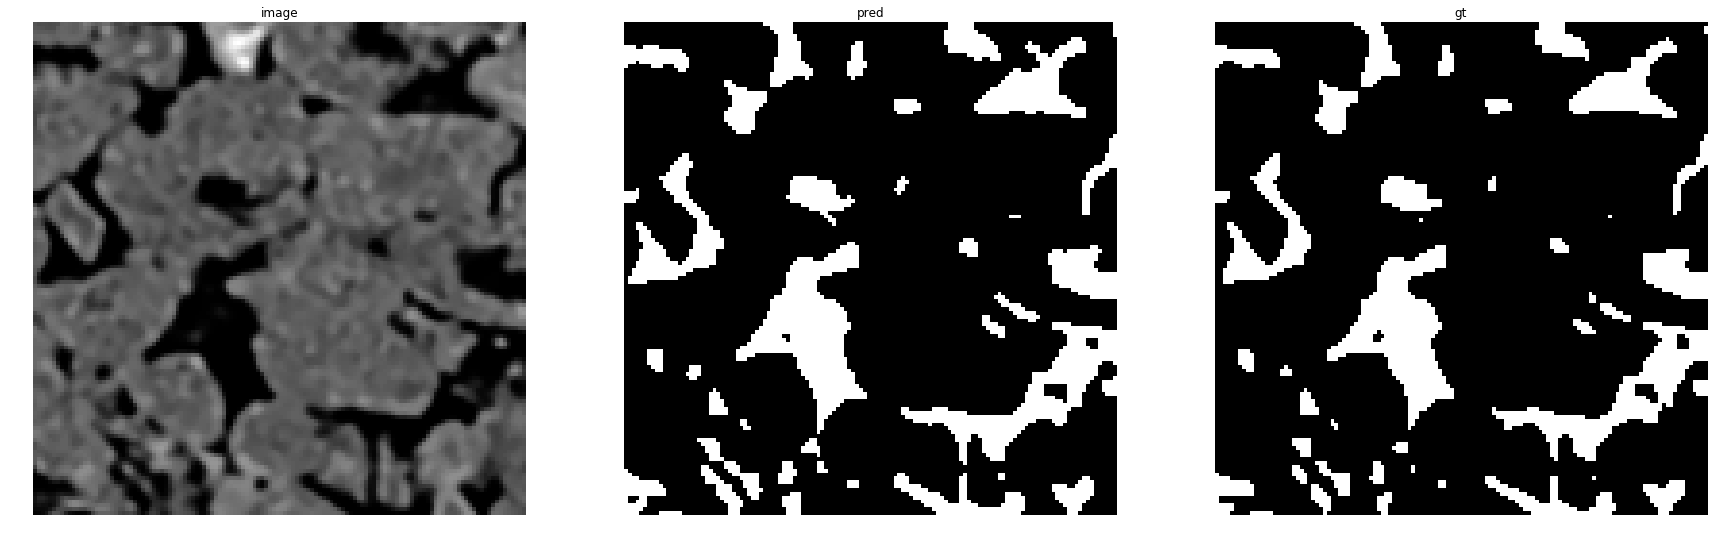

accuracy    : 0.979736328125
precision   : 0.9003105590062112
recall      : 0.9962199312714777
f1          : 0.9458401305057096
pr_auc      : 0.9975122517084047
iou         : 0.8972454348498917


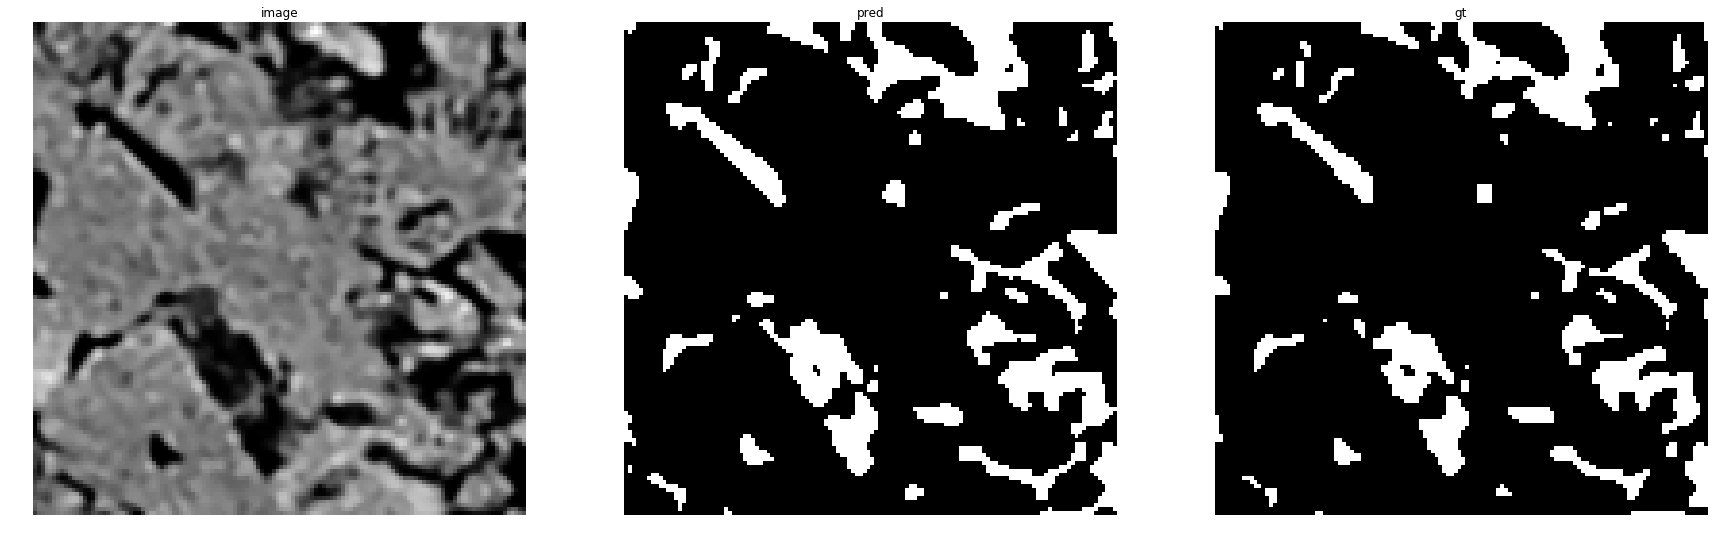

accuracy    : 0.97314453125
precision   : 0.8485793485793486
recall      : 0.9987765089722676
f1          : 0.9175721243911578
pr_auc      : 0.9944083891944993
iou         : 0.8476981654551748


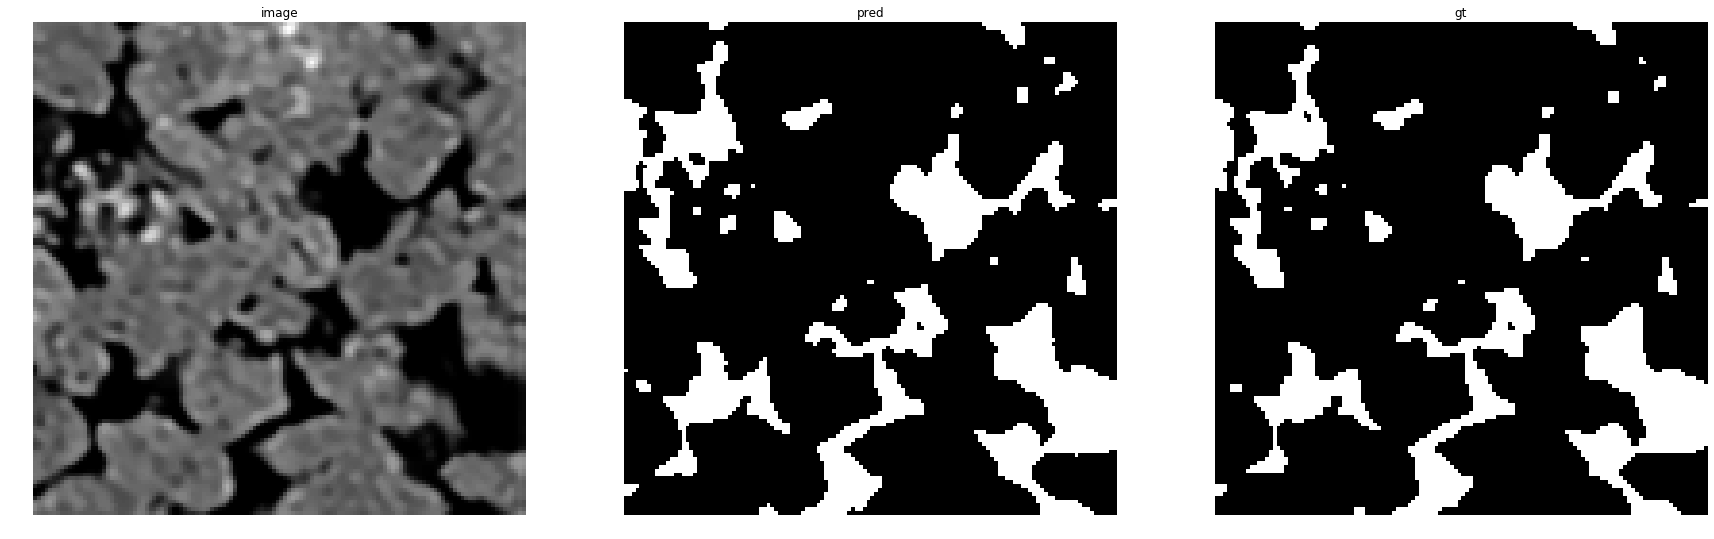

accuracy    : 0.98516845703125
precision   : 0.930945558739255
recall      : 0.9993848046754845
f1          : 0.9639519359145527
pr_auc      : 0.9985447067722335
iou         : 0.9304123711340206


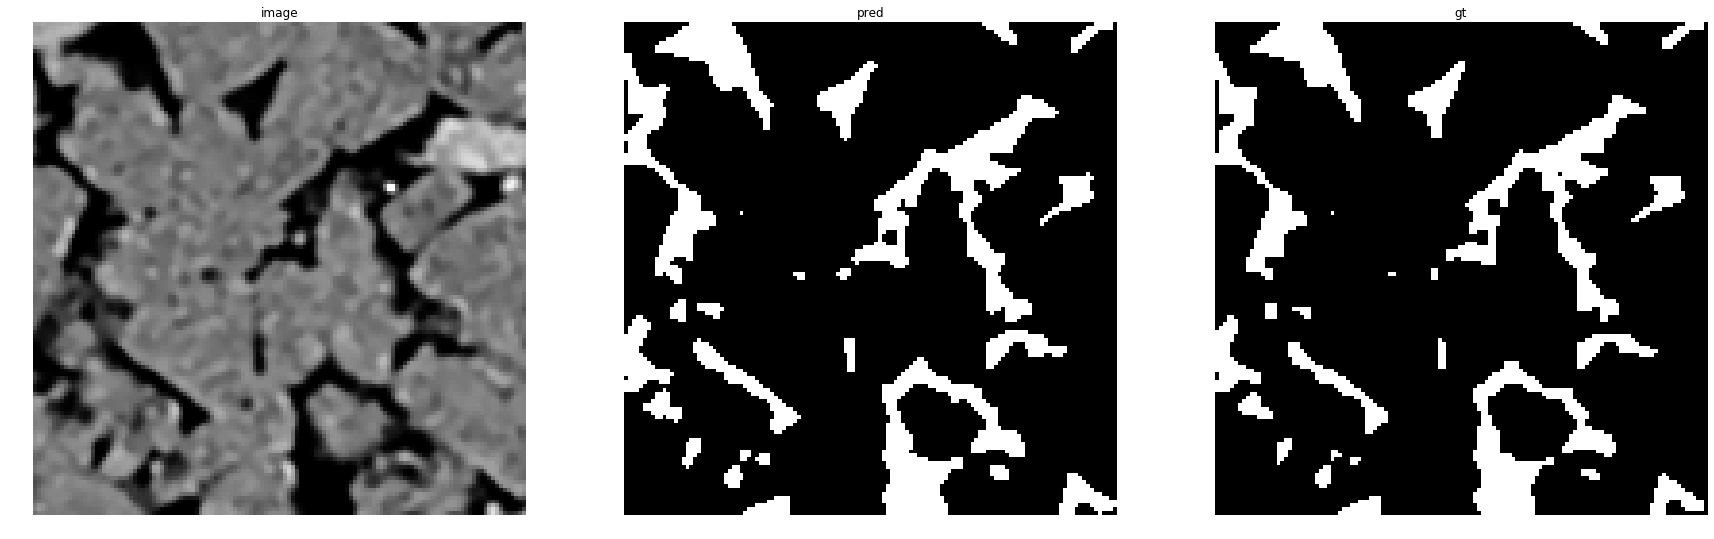

accuracy    : 0.9801025390625
precision   : 0.8898799313893654
recall      : 0.9980761831473643
f1          : 0.9408777656873412
pr_auc      : 0.9969320052378724
iou         : 0.8883561643835617


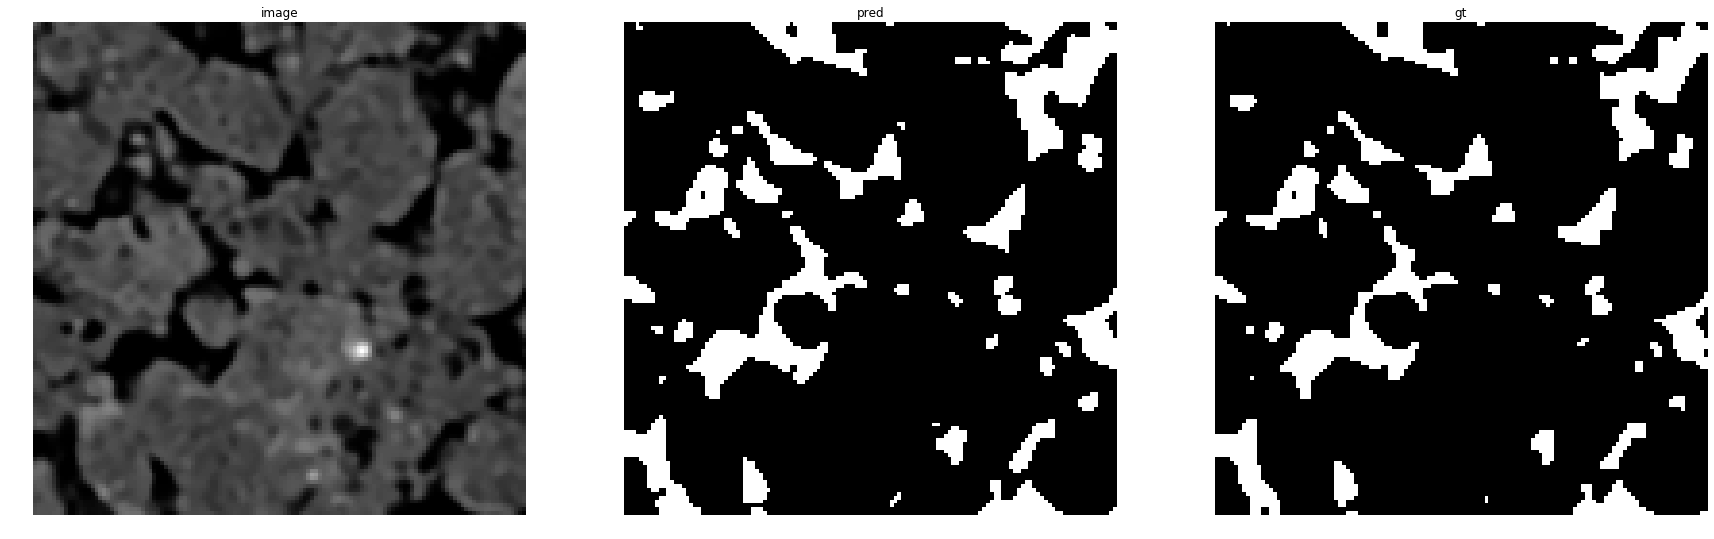

accuracy    : 0.97833251953125
precision   : 0.875
recall      : 0.9967172753385309
f1          : 0.9319010166890466
pr_auc      : 0.9959088820460844
iou         : 0.8724856321839081


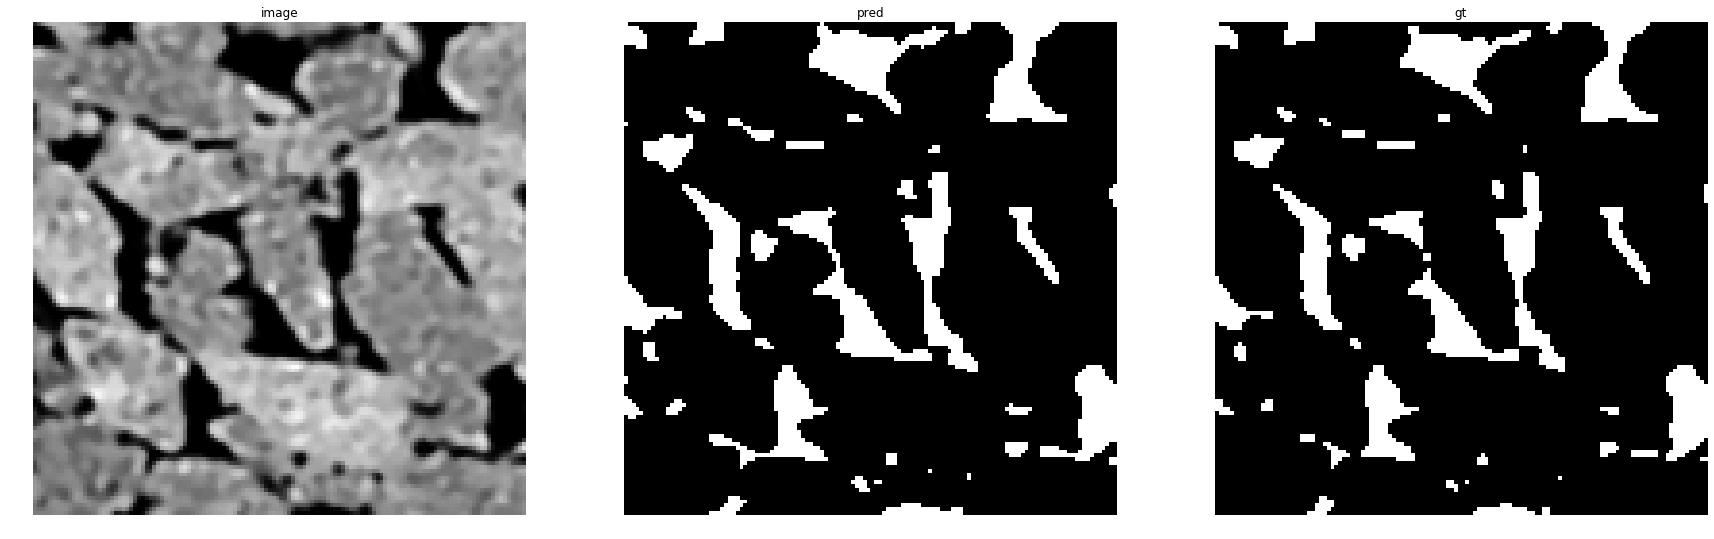

accuracy    : 0.9837646484375
precision   : 0.8987776928953399
recall      : 0.9995751911639762
f1          : 0.9465004022526147
pr_auc      : 0.9972853736461785
iou         : 0.898434516991218


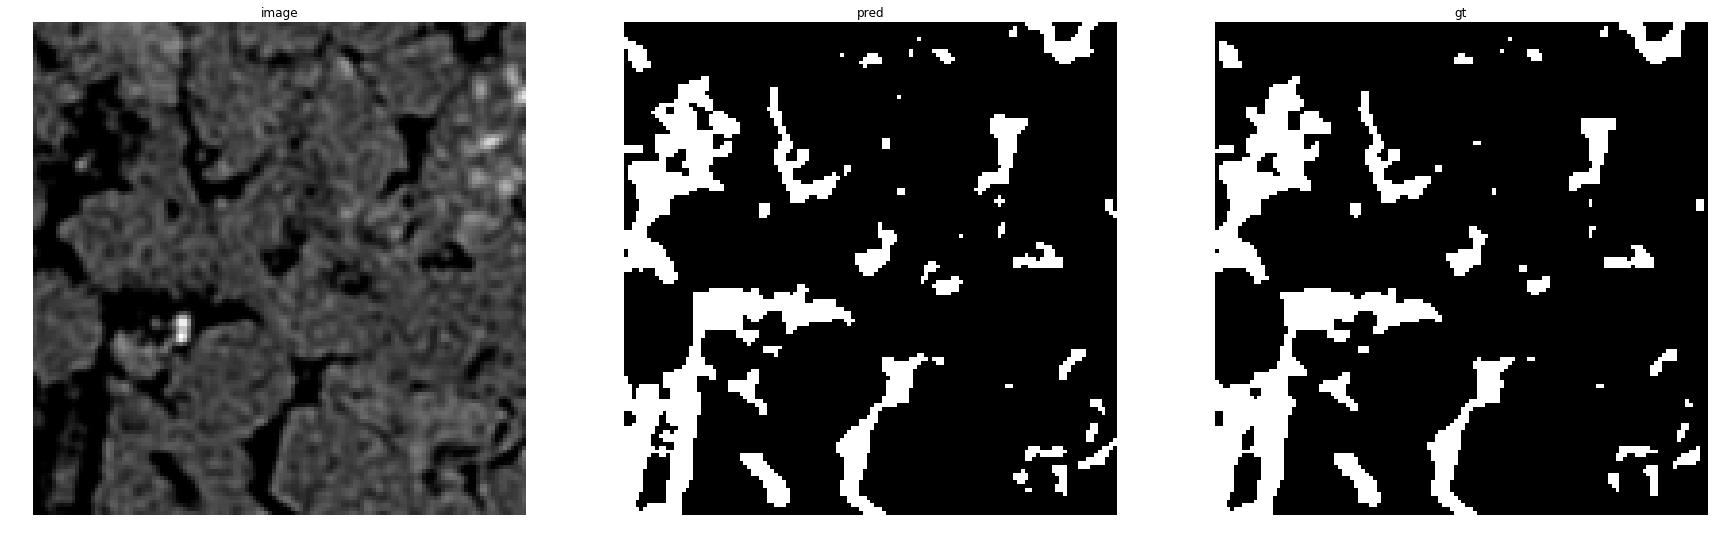

accuracy    : 0.98211669921875
precision   : 0.9254727474972191
recall      : 0.964451313755796
f1          : 0.9445600756859035
pr_auc      : 0.9918367736835589
iou         : 0.8949444245249193


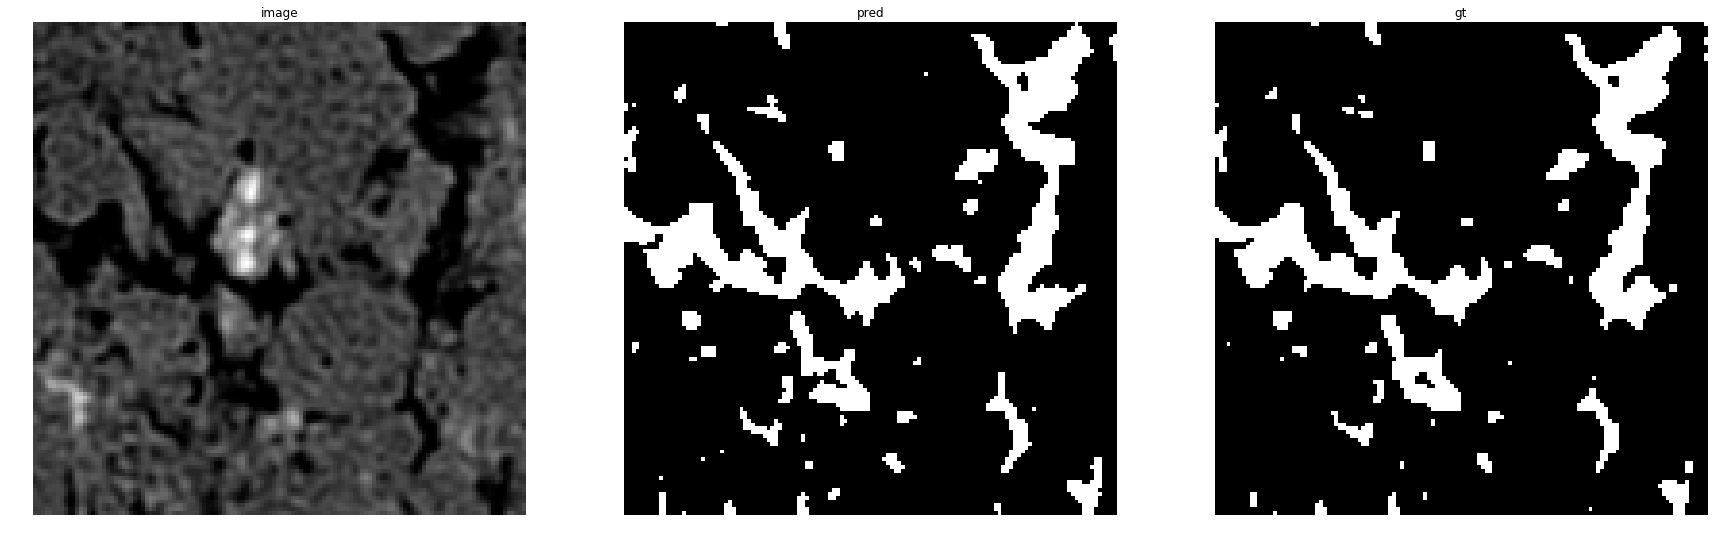

accuracy    : 0.9825439453125
precision   : 0.9152542372881356
recall      : 0.972972972972973
f1          : 0.9432314410480349
pr_auc      : 0.9920955455304251
iou         : 0.8925619834710744


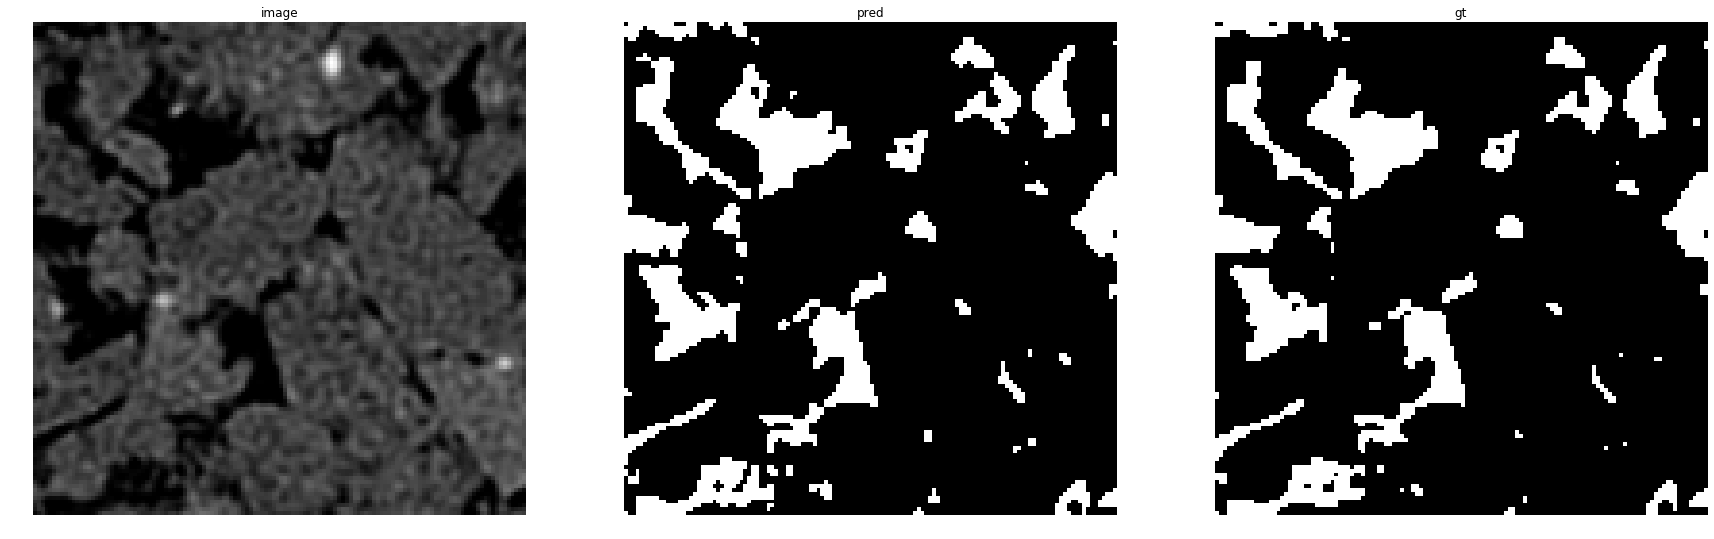

accuracy    : 0.9794921875
precision   : 0.9130893736805067
recall      : 0.9668405365126677
f1          : 0.9391965255157437
pr_auc      : 0.9907967522570194
iou         : 0.8853633572159673


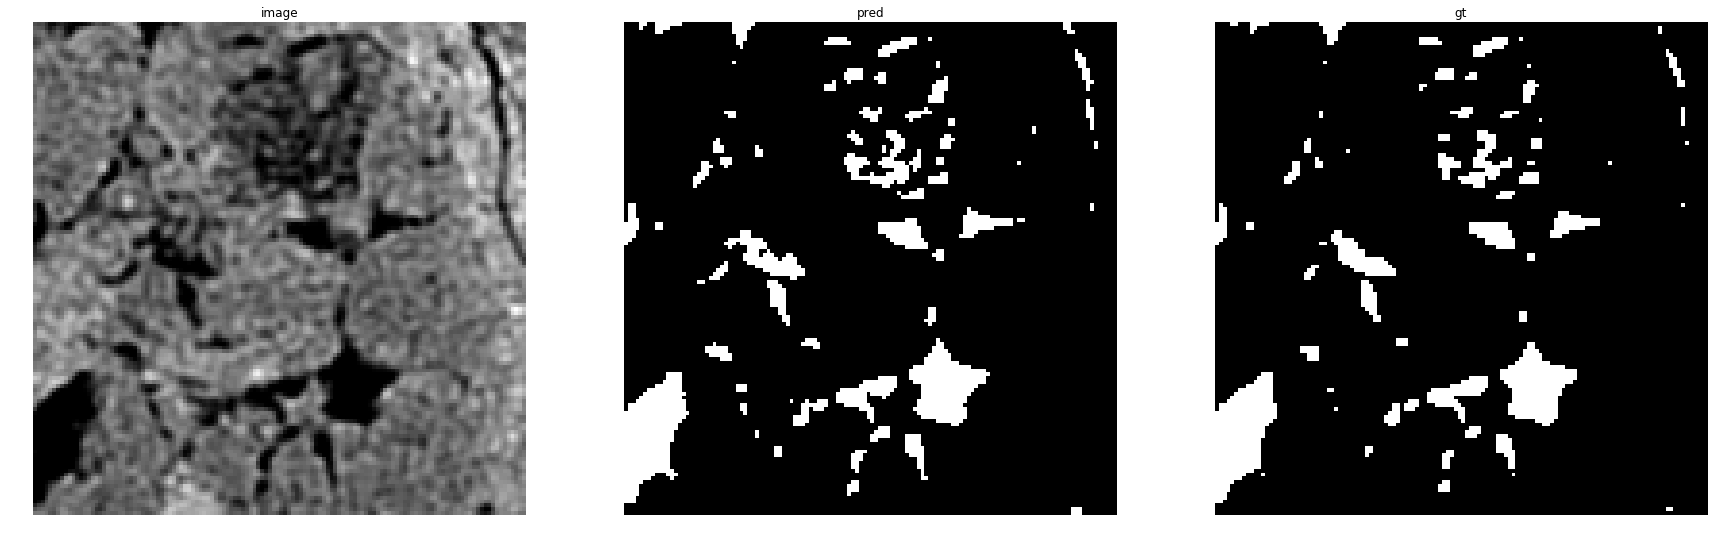

accuracy    : 0.98388671875
precision   : 0.8547979797979798
recall      : 0.9755043227665706
f1          : 0.9111709286675639
pr_auc      : 0.9892376873279467
iou         : 0.8368355995055624


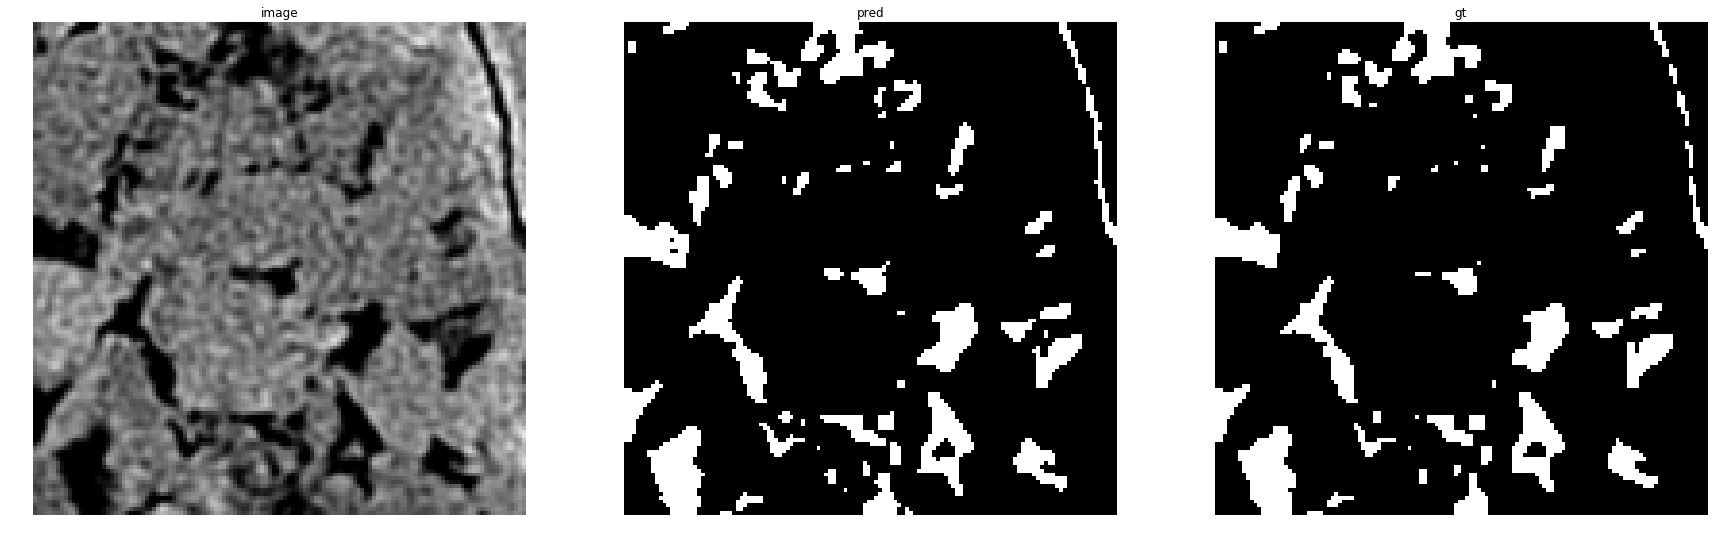

accuracy    : 0.98345947265625
precision   : 0.898975791433892
recall      : 0.9727959697732997
f1          : 0.9344301959835469
pr_auc      : 0.9902012202051056
iou         : 0.876930063578565


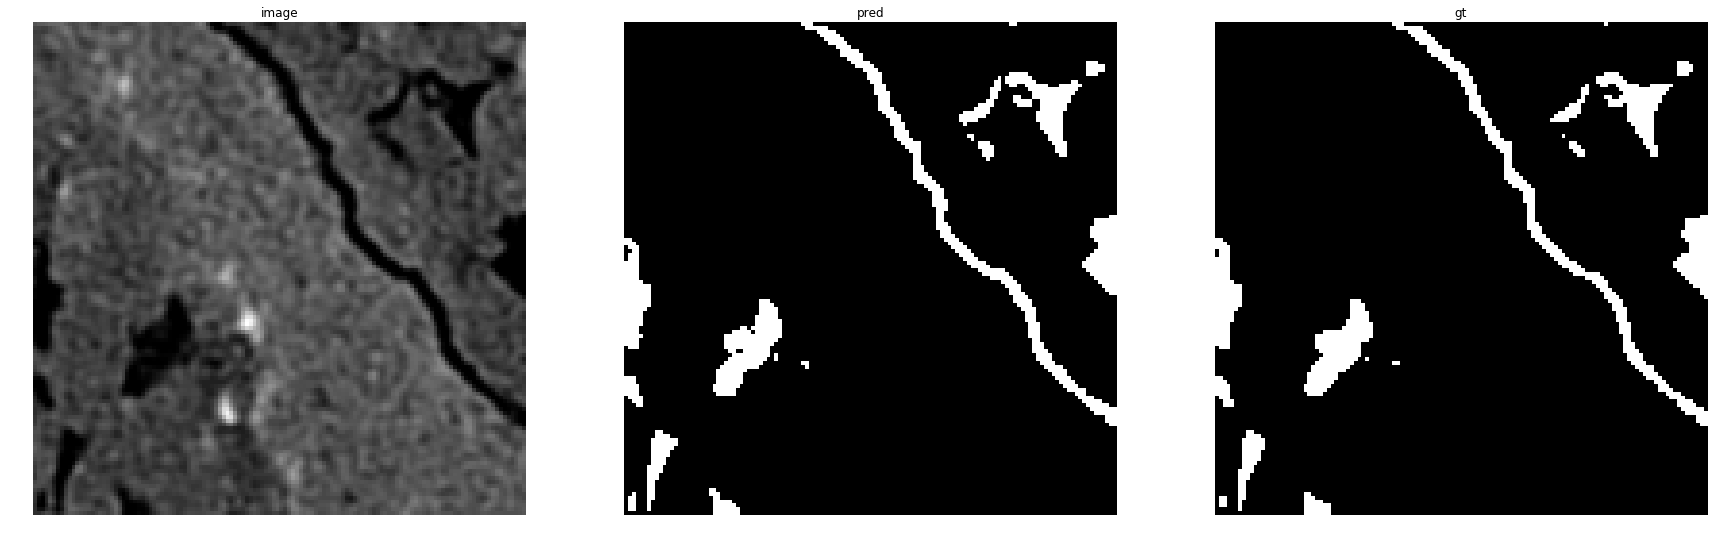

accuracy    : 0.9935302734375
precision   : 0.9364575059571089
recall      : 0.9784232365145228
f1          : 0.9569805194805194
pr_auc      : 0.995137261278918
iou         : 0.9175097276264591


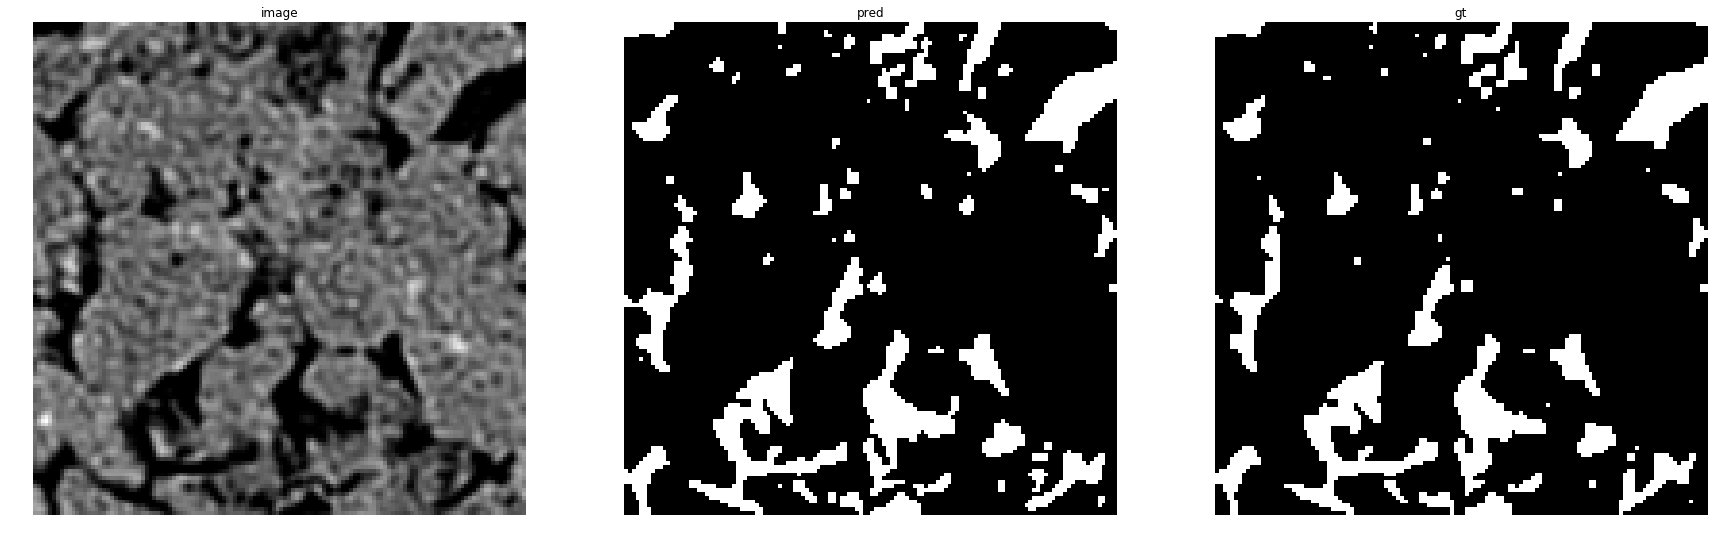

accuracy    : 0.97735595703125
precision   : 0.8959668300037693
recall      : 0.9615695792880259
f1          : 0.927609756097561
pr_auc      : 0.9872663651567153
iou         : 0.8649927219796215


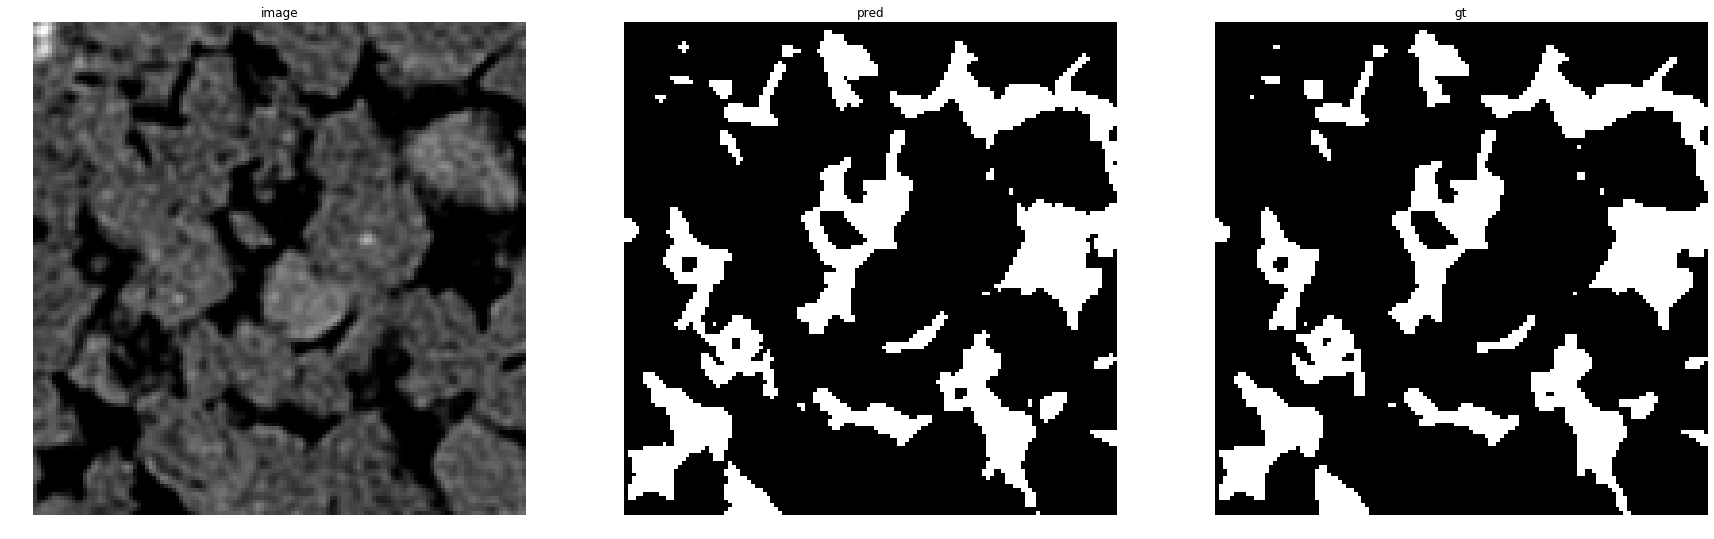

accuracy    : 0.98358154296875
precision   : 0.9539989545216937
recall      : 0.9751536200908363
f1          : 0.964460298586339
pr_auc      : 0.9961890222287625
iou         : 0.9313600408267415


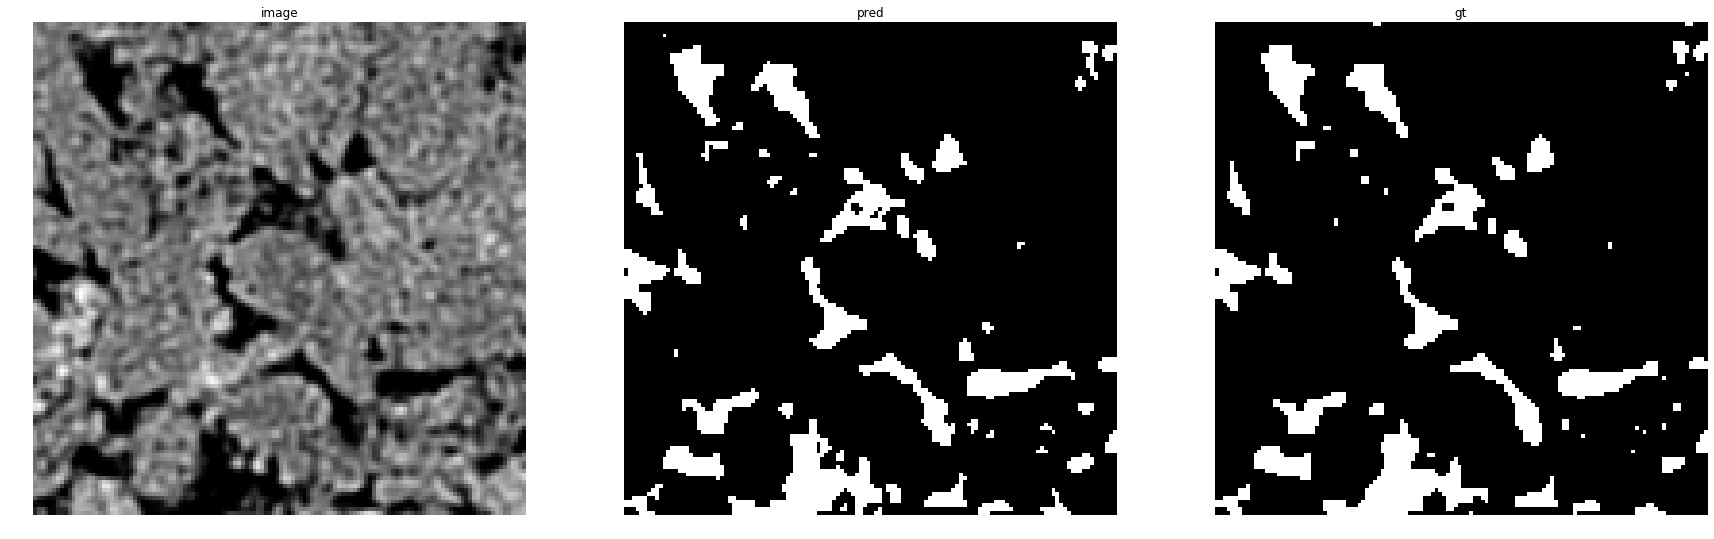

accuracy    : 0.982421875
precision   : 0.900630150266602
recall      : 0.9572385368366821
f1          : 0.9280719280719281
pr_auc      : 0.9883335989252262
iou         : 0.8657968313140727


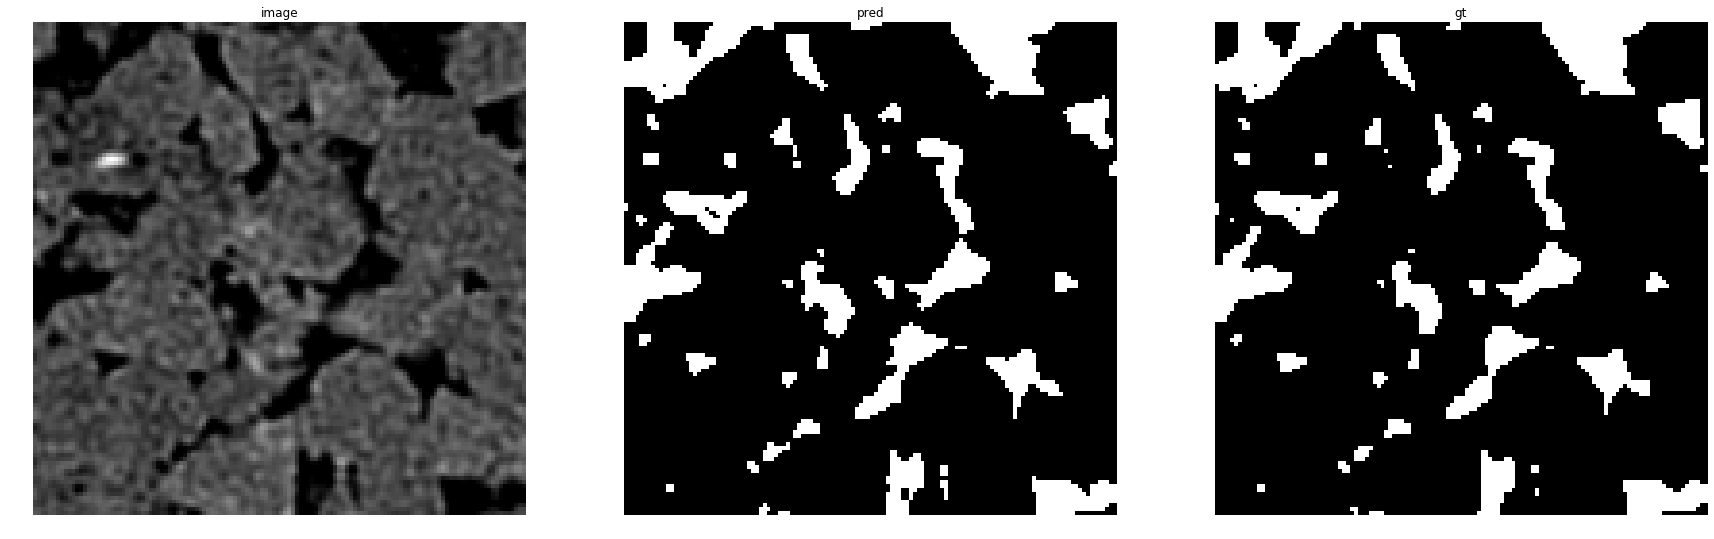

accuracy    : 0.98675537109375
precision   : 0.9358146600835549
recall      : 0.9808917197452229
f1          : 0.9578231292517007
pr_auc      : 0.9955413395835231
iou         : 0.9190600522193212


In [27]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 610.97it/s]
100%|██████████| 700/700 [00:07<00:00, 94.82it/s] 


In [33]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        patch_sizes=ps, 
        bs=32, num_workers=8, device='cuda:0',
        threshold=None)
    predicted_stack.dump('./{}_{}'.format(stack_name, d), features=False, targets=False, preds=True)

25200it [00:00, 218111.63it/s]
25200it [02:12, 190.64it/s]
100%|██████████| 700/700 [00:04<00:00, 164.21it/s]
25200it [00:00, 106624.09it/s]
25200it [02:23, 175.71it/s]
100%|██████████| 700/700 [00:04<00:00, 157.47it/s]
25200it [00:00, 219525.92it/s]
2808it [00:15, 173.99it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
predicted_stack_1 = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 244967.71it/s]
25200it [02:03, 204.21it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3206.54it/s]


In [32]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack_1.preds, 
                                    mode='stack')))

accuracy    : 0.983499
precision   : 0.960773
recall      : 0.891501
f1          : 0.924841
pr_auc      : 0.985720
iou         : 0.860191
